**Data Sci Eng Methods**

---


Assignment 4 – Comprehensive Report

**Combine Data Cleaning, Feature Selection, Modeling, and Interpretability into one report (Every assignment except TMINST) and make it a cohesive readable report. The focus is readability and clarity.**

    What is the question?
    What did you do?
    How well did it work?
    What did you learn?

**Goal :**  



    Checking Data Quality by performing different EDA techniques
    Feature Selection
    Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
    Model Interpretibility
    Reports and Visualizations


##**Abstract:**
---
Dataset link : https://www.kaggle.com/datasets/joshuabetetta/complete-pokedex-v100/data

---

The dataset comprises information about over 1100 Pokémon from 8 generations, offering a detailed insight into their attributes and characteristics.

It includes various stats, such as attack, defense, speed, and special abilities, along with details about their effectiveness against different types of Pokémon. Additionally, it provides information about the Pokémon's body type, abilities, egg groups, gender, category, experience type, and forms.

Overall, the dataset maintains a clean structure, with only a few missing values primarily observed in the Type 2 column. This occurrence is due to not all Pokémon possessing a secondary type.

---
**Framing as an ML Task**: We approach this as a regression task, a staple of machine learning for predicting continuous outcomes. By employing regression techniques, we can not only predict the speed of Pokémon with unseen data but also quantify the influence of each feature on a Pokémon's speed. This insight is invaluable for understanding the underlying dynamics that contribute to a Pokémon's agility and performance in battles.

**Human-Level Performance Contextualized**: Given the complexity and breadth of factors affecting a Pokémon's speed, even seasoned Pokémon enthusiasts may find it challenging to accurately predict speed without analytical tools. Their predictions, grounded in extensive knowledge and experience, serve as a qualitative benchmark for our model's performance.

**Desired Model Performance**:
- **Casual vs. Competitive Use Cases:** The requisite accuracy of our model hinges on its intended application. For casual entertainment or game enhancement, a good but not necessarily perfect model may suffice. However, for applications in competitive gaming or detailed simulation work, where accuracy can greatly influence strategic decisions, a higher level of precision is essential.

**Performance Metrics:** To evaluate our model, we will utilize:
- **Mean Absolute Error (MAE):** Provides an average error magnitude across all predictions, offering a clear picture of overall prediction accuracy.
- **Root Mean Squared Error (RMSE):** Emphasizes larger errors, which is crucial for understanding the worst-case scenarios in predictions.
- **R-squared (R²):** Offers insight into how much of the variance in Pokémon speed our model can explain, compared to a baseline model.


# **Importing Libraries**

In [1]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)


In [2]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install eli5
!pip install yellowbrick
!pip install requests
#!pip install fitter # only install if facing errors

In [3]:
#Loading the required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")


import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool


import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

!pip install shap
import shap
from sklearn.model_selection import train_test_split

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=774a219904f5ddb86e234a9d78d1c3af7dbd0f26cda283329d54c853d697b383
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=f491aae52b22f0d6391082b611118fbe07903d0010148af1c48f4000abad2060
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.1 MB/s eta 0:00:00


# **Data Exploration**

---

In this section, we delve into exploring the dataset through visualizations to gain insights into Pokémon types distribution and top 10 pokemon based on stats.

**Pokémon Types Distribution**

We start by visualizing the distribution of Pokémon types.
There are 18 unique types.
This provides an overview of the prevalence of each type within the dataset. The following bar charts showcase the count of Pokémon by their primary Type 1 and Type 2.

**Best Pokemon Statwise**


---

1. Pokémon Type Distribution by Generation
2. Top 10 Pokémon by Total Stats
3. Pokemon Stat Analysis :*key features : (BMI, Atk, Def, HP, TotalStats)*
4. Distribution of Speed over different generations.
5. Outliers distribution



In [4]:
# Load the dataset directly from the provided URL
dataset_url = 'https://raw.githubusercontent.com/priyam-choksi/INFO6105_DS/main/Complete%20Pokedex%20V1.1.csv'
data = pd.read_csv(dataset_url)
data.head(15)

pokedex_number      pokemon_name type_1  type_2    ability_1    ability_2  \
0                1         Bulbasaur  Grass  Poison     Overgrow  Chlorophyll   
1                2           Ivysaur  Grass  Poison     Overgrow  Chlorophyll   
2                3     Mega Venusaur  Grass  Poison    Thick Fat          NaN   
3                3          Venusaur  Grass  Poison     Overgrow  Chlorophyll   
4                3     Venusaur Gmax  Grass  Poison     Overgrow  Chlorophyll   
5                4        Charmander   Fire     NaN        Blaze  Solar Power   
6                5        Charmeleon   Fire     NaN        Blaze  Solar Power   
7                6         Charizard   Fire  Flying        Blaze  Solar Power   
8                6    Charizard Gmax   Fire  Flying        Blaze  Solar Power   
9                6  Mega Charizard X   Fire  Dragon  Tough Claws          NaN   
10               6  Mega Charizard Y   Fire  Flying      Drought          NaN   
11               7          Squirtle  Water     NaN      Torrent    Rain Dish   
12               8         Wartortle  Water     NaN      Torrent    Rain Dish   
13               9         Blastoise  Water     NaN      Torrent    Rain Dish   
14               9    Blastoise Gmax  Water     NaN      Torrent    Rain Dish   

   ability_3  number_pokemon_with_typing primary_color      shape  ...  \
0        NaN                          15         Green  Quadruped  ...   
1        NaN                          15         Green  Quadruped  ...   
2        NaN                          15         Green  Quadruped  ...   
3        NaN                          15         Green  Quadruped  ...   
4        NaN                          15         Green  Quadruped  ...   
5        NaN                          34           Red    Upright  ...   
6        NaN                          34           Red    Upright  ...   
7        NaN                           7           Red    Upright  ...   
8        NaN                           7           Red    Upright  ...   
9        NaN                           3           Red    Upright  ...   
10       NaN                           7           Red    Upright  ...   
11       NaN                          72          Blue    Upright  ...   
12       NaN                          72          Blue    Upright  ...   
13       NaN                          72          Blue    Upright  ...   
14       NaN                          72          Blue    Upright  ...   

    against_ground  against_flying  against_psychic  against_bug  \
0              1.0             2.0              2.0         1.00   
1              1.0             2.0              2.0         1.00   
2              1.0             2.0              2.0         1.00   
3              1.0             2.0              2.0         1.00   
4              1.0             2.0              2.0         1.00   
5              2.0             1.0              1.0         0.50   
6              2.0             1.0              1.0         0.50   
7              0.0             1.0              1.0         0.25   
8              0.0             1.0              1.0         0.25   
9              2.0             1.0              1.0         0.50   
10             0.0             1.0              1.0         0.25   
11             1.0             1.0              1.0         1.00   
12             1.0             1.0              1.0         1.00   
13             1.0             1.0              1.0         1.00   
14             1.0             1.0              1.0         1.00   

    against_rock  against_ghost  against_dragon  against_dark  against_steel  \
0            1.0            1.0             1.0           1.0            1.0   
1            1.0            1.0             1.0           1.0            1.0   
2            1.0            1.0             1.0           1.0            1.0   
3            1.0            1.0             1.0           1.0            1.0   
4            1.0            1.0  

In [5]:
print(data.head(10))
print(data.info())
print(data.describe())

   pokedex_number      pokemon_name type_1  type_2    ability_1    ability_2  \
0               1         Bulbasaur  Grass  Poison     Overgrow  Chlorophyll   
1               2           Ivysaur  Grass  Poison     Overgrow  Chlorophyll   
2               3     Mega Venusaur  Grass  Poison    Thick Fat          NaN   
3               3          Venusaur  Grass  Poison     Overgrow  Chlorophyll   
4               3     Venusaur Gmax  Grass  Poison     Overgrow  Chlorophyll   
5               4        Charmander   Fire     NaN        Blaze  Solar Power   
6               5        Charmeleon   Fire     NaN        Blaze  Solar Power   
7               6         Charizard   Fire  Flying        Blaze  Solar Power   
8               6    Charizard Gmax   Fire  Flying        Blaze  Solar Power   
9               6  Mega Charizard X   Fire  Dragon  Tough Claws          NaN   

  ability_3  number_pokemon_with_typing primary_color      shape  ...  \
0       NaN                          15       

## **Type 1 Distribution:**

The bar chart depicts the distribution of Pokémon based on their primary Type 1 classification.

- **High-Frequency Types:**
  Types such as Water, Normal, and Grass emerge with the highest frequencies, collectively representing a significant portion of the dataset.

- **Water-type Dominance:**
  Water-type Pokémon stand out as the most prevalent, numbering **141**, closely followed by Normal and Grass types.

- **Scarcity of Flying-types:**
  Flying-type Pokémon are relatively scarce, with only **9** occurrences noted in the dataset.

- **Less Prevalent Types:**
  In contrast, types like Steel, Ice, and Fairy exhibit lower prevalence, each comprising **40** or fewer Pokémon in the dataset.

This visualization provides a comprehensive insight into the primary types that populate the Pokémon dataset.

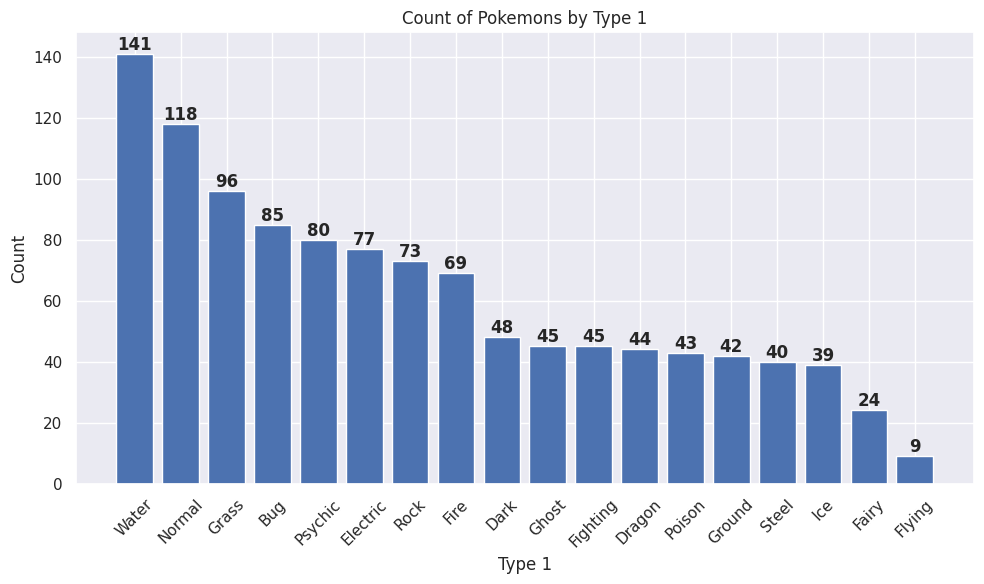

In [6]:
# Pokemon's types distribution
count_by_type = data.type_1.value_counts()

plt.figure(figsize=(10,6))
bar_chart = plt.bar(count_by_type.index, count_by_type.values)
plt.title("Count of Pokemons by Type 1")
plt.xlabel("Type 1")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bar_chart:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontweight='bold')

plt.show()

## **Type 2 Distribution:**

This visualization offers a comprehensive overview of the secondary types found in the Pokémon dataset, enriching our comprehension of Pokémon typings and their prevalence.

- **Single Type Pokémon (521):**
  The majority of Pokémon, totaling 521, possess only one type, denoted by the "None" category.

- **Dual-Type Pokémon:**
  Among dual-typed Pokémon, Flying-types dominate with 126 instances, followed by Fairy and Psychic types.

- **Rare Dual Types:**
  Bug-type Pokémon are scarce among dual-typed Pokémon, comprising only 11 occurrences. Additionally, types like Steel, Ice, and Fairy exhibit less prevalence, each containing 40 or fewer Pokémon in the dataset.

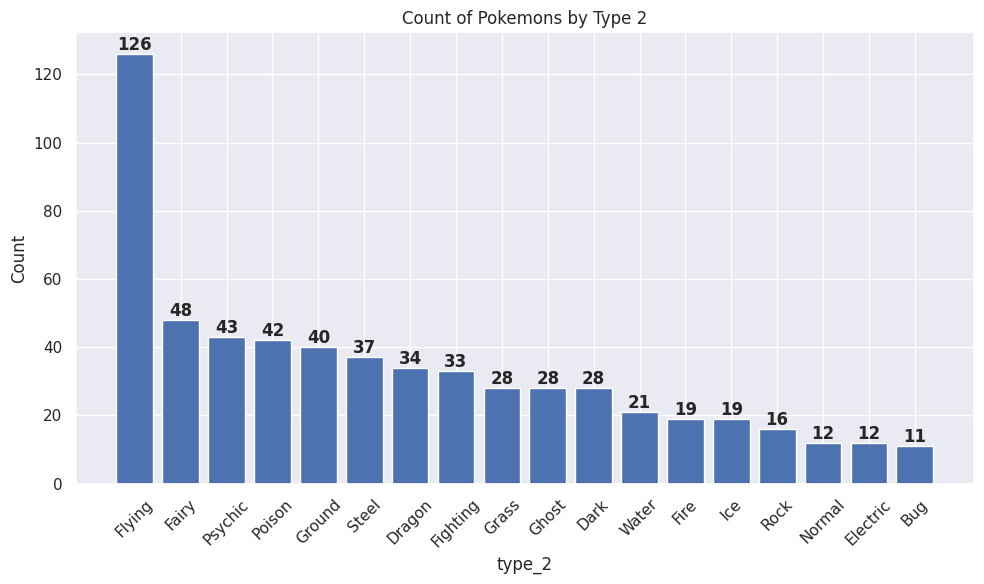

In [7]:
# Pokemon's types distribution
count_by_type = data.type_2.value_counts()

plt.figure(figsize=(10,6))
bar_chart = plt.bar(count_by_type.index, count_by_type.values)
plt.title("Count of Pokemons by Type 2")
plt.xlabel("type_2")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bar_chart:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontweight='bold')

plt.show()

## **Best Pokemon Statwise**


---


**Pokémon Type Distribution by Generation:**

The heatmap provides insights into how Pokémon types are distributed across different generations. It helps identify trends and patterns in the prevalence of certain types over time.

**Top 10 Pokémon by Total Stats:**

Analyzing the top 10 Pokémon by total stats for each generation allows us to understand which Pokémon were considered most powerful within their respective generations. It can highlight fan favorites, iconic Pokémon, or those with exceptional battling capabilities.

**Comparative Analysis:**

By comparing the type distribution across generations with the top Pokémon for each generation, you can observe any correlations between popular Pokémon types and their strength within each generation.

**Evolution of Pokémon Strength:**

Analyzing top Pokémon across generations can also reflect how game dynamics, battle strategies, and the introduction of new Pokémon affect the competitive landscape and players' choices.

**Number of Pokemon by Gen**

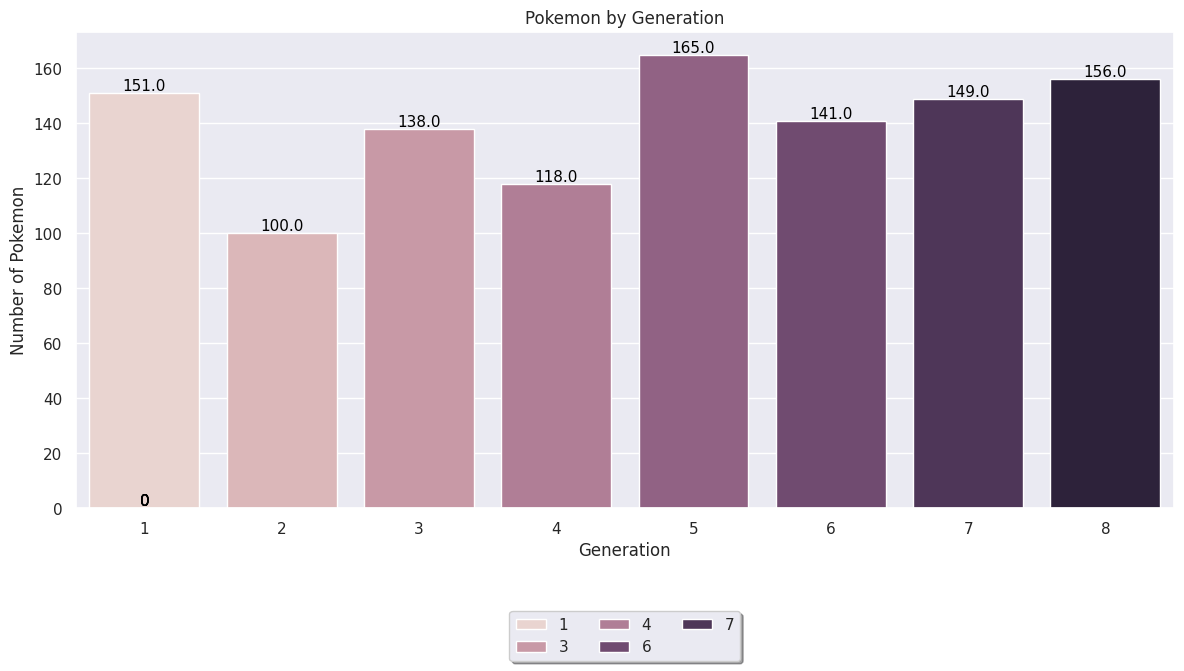

In [8]:
plt.figure(figsize=(12, 7))  # Adjust the figure size as needed
ax = sns.countplot(x='generation', hue='generation', data=data)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Generation')
plt.ylabel('Number of Pokemon')
plt.title('Pokemon by Generation')

# Move legend below the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)

plt.tight_layout()  # Adjust the layout
plt.show()


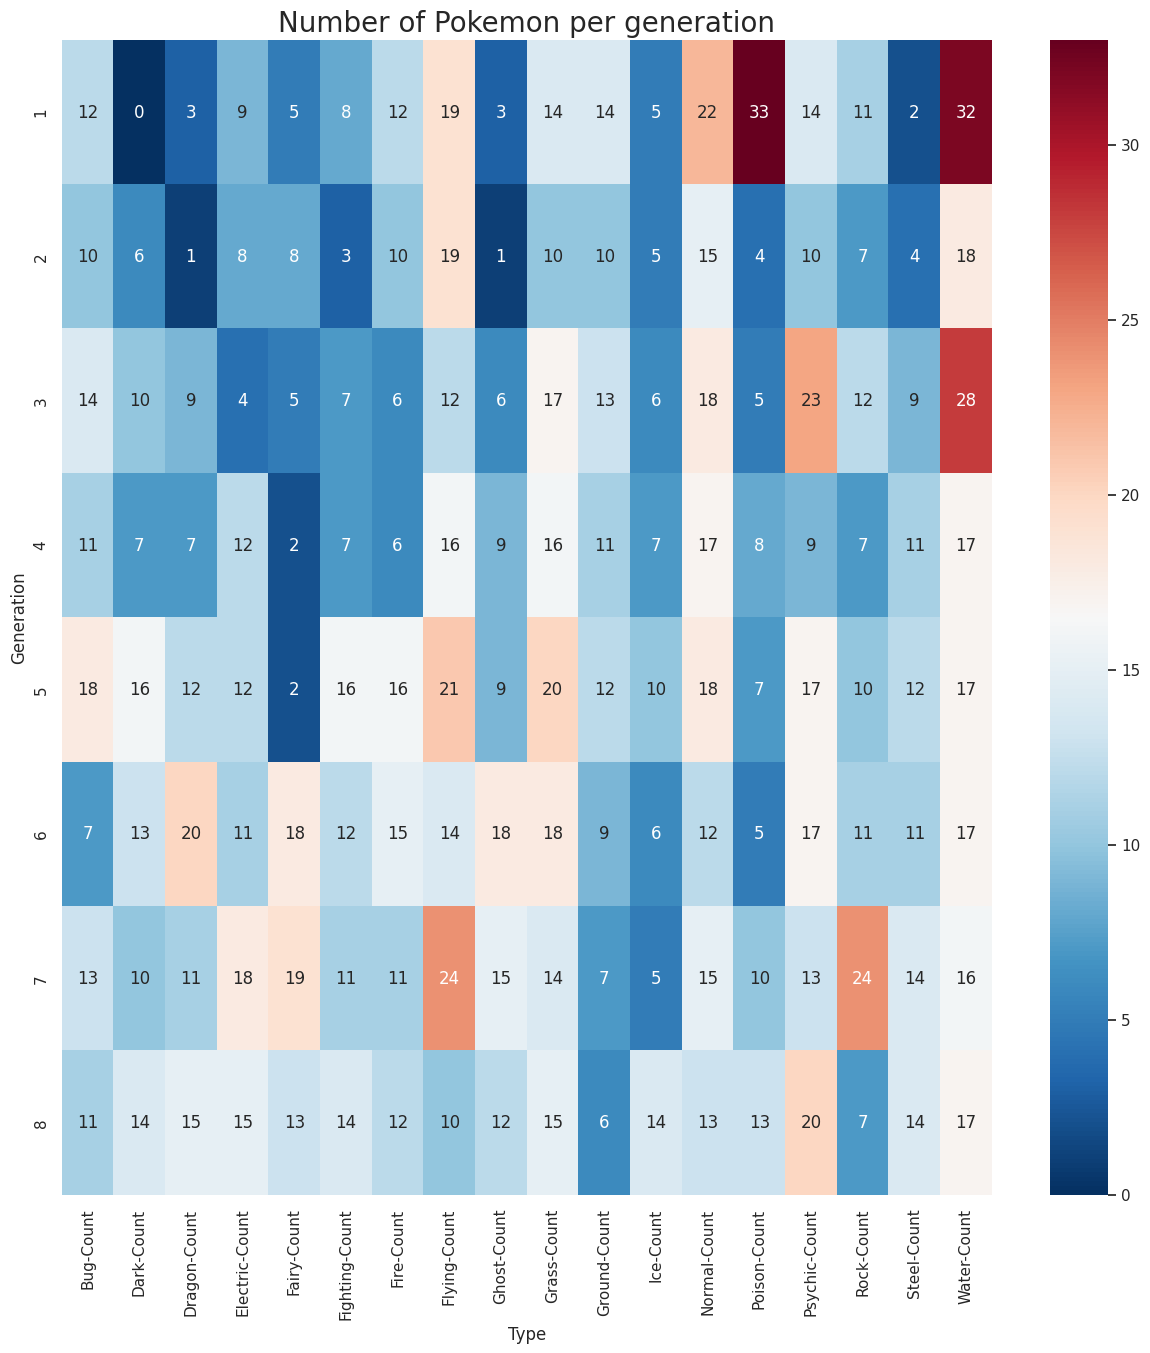

In [9]:
# Group by Generation and Type 1
df1 = pd.DataFrame(data.groupby('generation')['type_1'].value_counts())
df1.columns = ['Count']
df1 = df1.reset_index()
df1.columns = ['Generation', 'Type', 'Count']

# Group by Generation and Type 2
df2 = pd.DataFrame(data.groupby('generation')['type_2'].value_counts())
df2.columns = ['Count']
df2 = df2.reset_index()
df2.columns = ['Generation', 'Type', 'Count']

# Unstack the data to create a DataFrame with Generation as index and Type as columns
df2 = df2.set_index(['Generation', 'Type']).unstack().swaplevel(0, 1, 1).sort_index(1)
df1 = df1.set_index(['Generation', 'Type']).unstack().swaplevel(0, 1, 1).sort_index(1)

# Combine Type 1 and Type 2 counts
df_type_by_gen = pd.DataFrame(df2.add(df1, fill_value=0))

# Fill NaN values with 0
df_type_by_gen.fillna(value=0, inplace=True)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_type_by_gen, annot=True, cmap='RdBu_r')
ax.set_xlabel('Type')
ax.set_title('Number of Pokemon per generation', fontsize=20)
plt.show()
plt.close()


##**GEN 1  Top 10**

pokedex_number pokemon_name    type_1  type_2     ability_1    ability_2  \
220             150       Mewtwo   Psychic     NaN      Pressure      Unnerve   
217             149    Dragonite    Dragon  Flying   Inner Focus   Multiscale   
221             151          Mew   Psychic     NaN   Synchronize          NaN   
209             144     Articuno       Ice  Flying      Pressure   Snow Cloak   
212             145       Zapdos  Electric  Flying      Pressure       Static   
214             146      Moltres      Fire  Flying      Pressure   Flame Body   
96               59     Arcanine      Fire     NaN    Intimidate   Flash Fire   
190             130     Gyarados     Water  Flying    Intimidate        Moxie   
207             143      Snorlax    Normal     NaN      Immunity    Thick Fat   
192             131       Lapras     Water     Ice  Water Absorb  Shell Armor   

     ability_3  number_pokemon_with_typing primary_color      shape  ...  \
220        NaN                          45        Purple    Upright  ...   
217        NaN                           8         Brown    Upright  ...   
221        NaN                          45          Pink    Upright  ...   
209        NaN                           2          Blue      Wings  ...   
212        NaN                           6        Yellow      Wings  ...   
214        NaN                           7        Yellow      Wings  ...   
96   Justified                          34         Brown  Quadruped  ...   
190        NaN                           8          Blue   Squiggle  ...   
207   Gluttony                          71         Black   Humanoid  ...   
192  Hydration                           7          Blue       Fish  ...   

     against_ground  against_flying  against_psychic  against_bug  \
220             1.0             1.0              0.5         2.00   
217             0.0             1.0              1.0         0.50   
221             1.0             1.0              0.5         2.00   
209             0.0             1.0              1.0         0.50   
212             0.0             0.5              1.0         0.50   
214             0.0             1.0              1.0         0.25   
96              2.0             1.0              1.0         0.50   
190             0.0             1.0              1.0         0.50   
207             1.0             1.0              1.0         1.00   
192             1.0             1.0              1.0         1.00   

     against_rock  against_ghost  against_dragon  against_dark  against_steel  \
220           1.0            2.0             1.0           2.0            1.0   
217           2.0            1.0             2.0           1.0            1.0   
221           1.0            2.0             1.0           2.0            1.0   
209           4.0            1.0             1.0           1.0            2.0   
212           2.0            1.0             1.0           1.0            0.5   
214           4.0            1.0             1.0           1.0            0.5   
96            2.0            1.0             1.0           1.0            0.5   
190           2.0            1.0             1.0           1.0            0.5   
207           1.0            0.0             1.0           1.0            1.0   
192           2.0            1.0             1.0           1.0            1.0   

     against_fairy  
220            1.0  
217            2.0  
221            1.0  
209            1.0  
212            1.0  
214            0.5  
96             0.5  
190            1.0  
207            1.0  
192            1.0  

[10 rows x 63 columns]

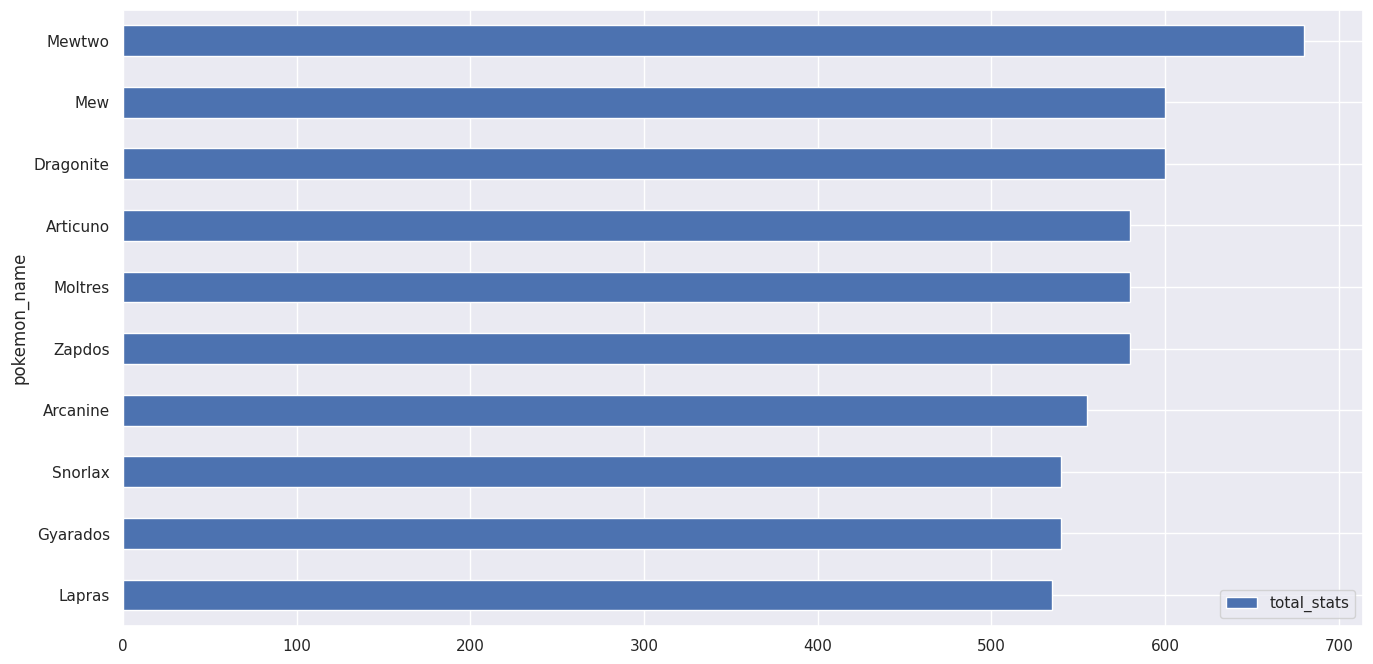

In [10]:
gen1 = data[data.generation == 1]
gen1_top10 = gen1.nlargest(10, ['total_stats'])
gen1_top10.sort_values("total_stats", ascending=True).plot(x='pokemon_name', y='total_stats', kind='barh')
gen1_top10

##**TOP 10 across all GEN**

pokedex_number              pokemon_name    type_1    type_2  \
1104             890       Eternatus Eternamax    Poison    Dragon   
218              150             Mega Mewtwo X   Psychic  Fighting   
219              150             Mega Mewtwo Y   Psychic       NaN   
488              384             Mega Rayquaza    Dragon    Flying   
485              382             Primal Kyogre     Water       NaN   
487              383            Primal Groudon    Ground      Fire   
988              800            Necrozma Ultra   Psychic    Dragon   
615              493                    Arceus    Normal       NaN   
1099             888      Zacian Crowned Sword     Fairy     Steel   
1101             889  Zamazenta Crowned Shield  Fighting     Steel   

             ability_1 ability_2 ability_3  number_pokemon_with_typing  \
1104          Pressure       NaN       NaN                           4   
218          Steadfast       NaN       NaN                           6   
219           Insomnia       NaN       NaN                          45   
488       Delta Stream       NaN       NaN                           8   
485     Primordial Sea       NaN       NaN                          72   
487      Desolate Land       NaN       NaN                           4   
988         Neuroforce       NaN       NaN                           5   
615          Multitype       NaN       NaN                          71   
1099    Intrepid Sword       NaN       NaN                           5   
1101  Dauntless Shield       NaN       NaN                           4   

     primary_color      shape  ...  against_ground  against_flying  \
1104        Purple      Wings  ...             2.0             1.0   
218         Purple    Upright  ...             1.0             2.0   
219         Purple    Upright  ...             1.0             1.0   
488          Green   Squiggle  ...             0.0             1.0   
485           Blue       Fish  ...             1.0             1.0   
487            Red    Upright  ...             2.0             1.0   
988          Black       Arms  ...             1.0             1.0   
615          White  Quadruped  ...             1.0             1.0   
1099          Blue  Quadruped  ...             2.0             0.5   
1101           Red  Quadruped  ...             2.0             1.0   

      against_psychic  against_bug  against_rock  against_ghost  \
1104              2.0         0.50          1.00            1.0   
218               1.0         1.00          0.50            2.0   
219               0.5         2.00          1.00            2.0   
488               1.0         0.50          2.00            1.0   
485               1.0         1.00          1.00            1.0   
487               1.0         0.50          1.00            1.0   
988               0.5         2.00          1.00            2.0   
615               1.0         1.00          1.00            0.0   
1099              0.5         0.25          0.50            1.0   
1101              1.0         0.25          0.25            1.0   

      against_dragon  against_dark  against_steel  against_fairy  
1104             2.0           1.0            1.0            1.0  
218              1.0           1.0            1.0            2.0  
219              1.0           2.0            1.0            1.0  
488              2.0           1.0            1.0            2.0  
485              1.0           1.0            0.5            1.0  
487              1.0           1.0            0.5            0.5  
988              2.0           2.0            1.0            2.0  
615              1.0           1.0            1.0            1.0  
1099             0.0           0.5            1.0            0.5  
1101             0.5           0.5            0.5            1.0  

[10 rows x 63 columns]

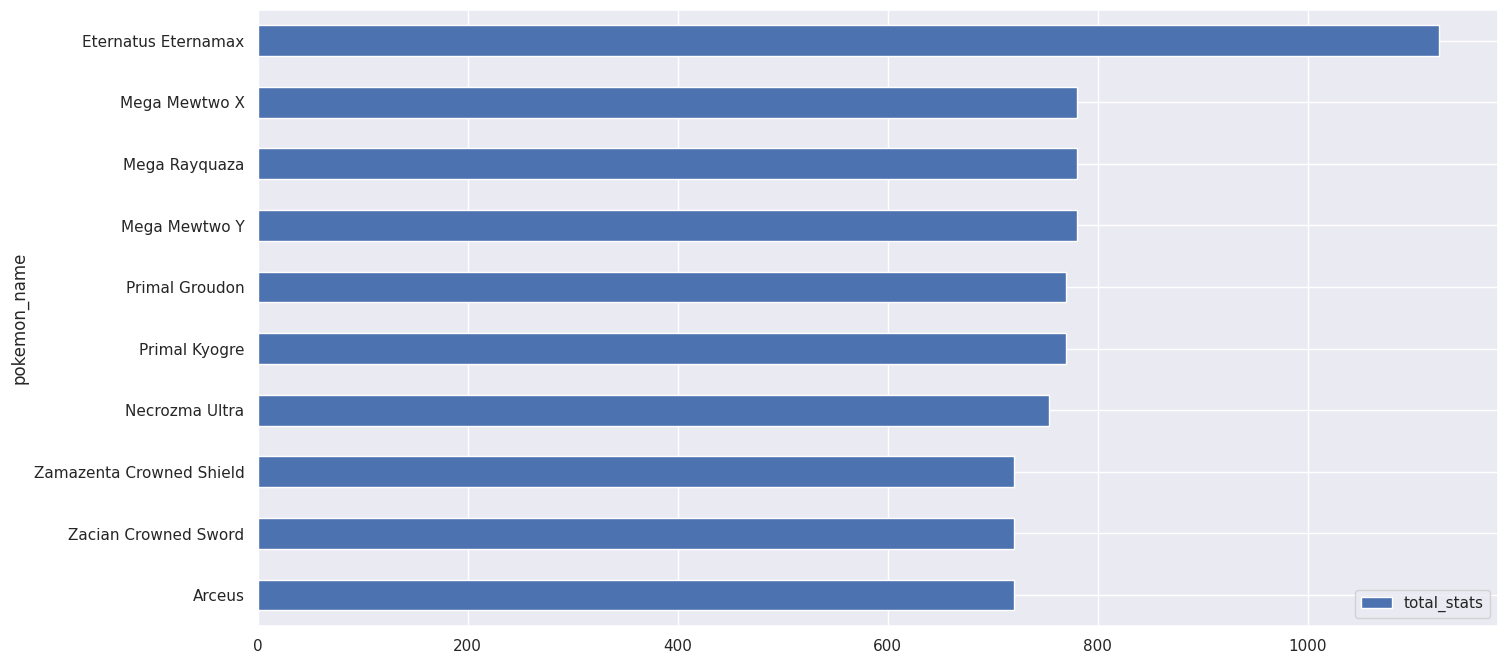

In [11]:
gen_all = data.nlargest(10, ['total_stats'])
gen_all.sort_values("total_stats", ascending=True).plot(x='pokemon_name', y='total_stats', kind='barh')
gen_all

##**Pokemon Analysis by Stats**


---


This analysis delves into Pokémon statistics, aiming to uncover correlations, trends, and insights within the dataset. Through visualization and statistical analysis, it provides valuable information on Pokémon attributes and their evolutionary patterns across generations.

**Correlation Heatmap:**
Reveals strong correlations between attributes like Attack, Special Attack, HP, and Total Stats, indicating overall strength.
Notable lack of correlation between Defense and Speed suggests independence between these attributes.

**Scatter Plot Analysis:**
Demonstrates a positive correlation between Attack and Base Stat Total, indicating higher Attack values correspond to greater overall Base Stat Totals.

**BMI Trends:**
Identifies stable average BMI trends across most generations, with Generation 7 showing a significant outlier.

**Generational Evolution of Attributes:**
Highlights trends in attributes like Height, Weight, BMI, Attack, Defense, Speed, Special Attack, and Special Defense across generations.

**Jointplot Analysis:**
Confirms a positive relationship between Attack and Defense attributes, indicating balanced combat profiles among Pokémon.

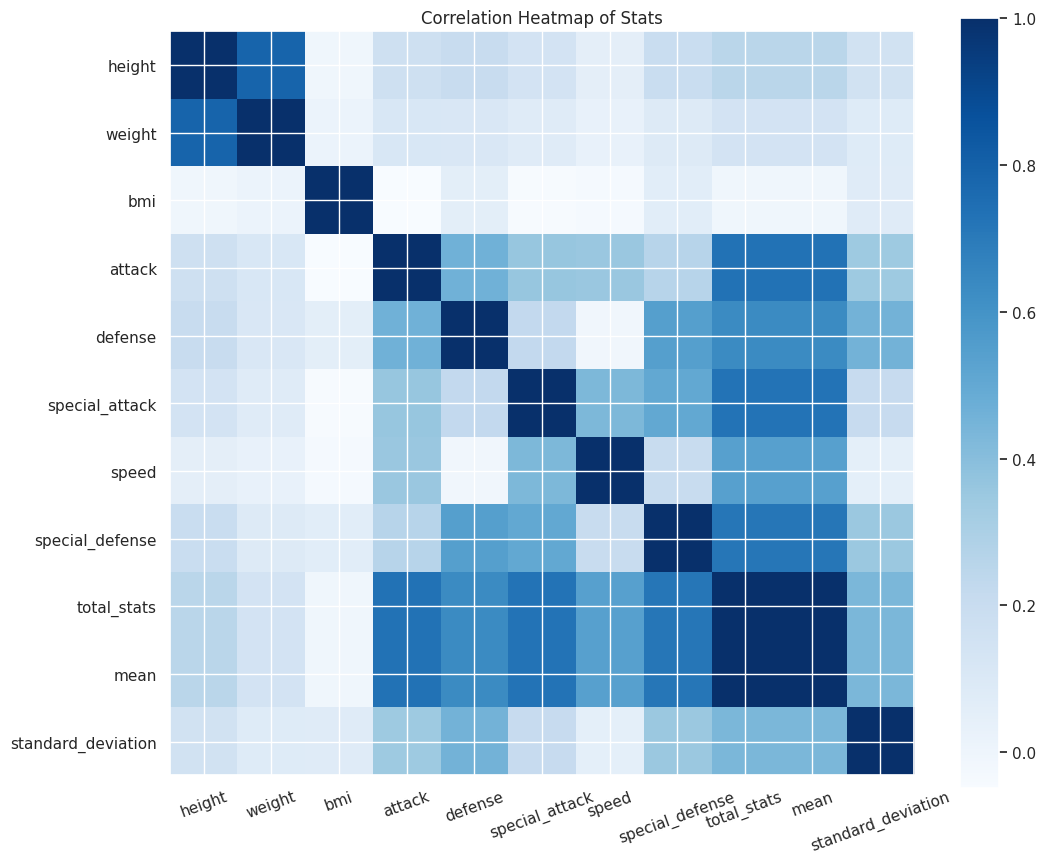

In [12]:
stats = ['height','weight','bmi','attack','defense','special_attack','speed','special_defense','total_stats', 'mean', 'standard_deviation']
corr_matrix = data[stats].corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix,  cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns, rotation=20)
plt.yticks(np.arange(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Heatmap of Stats")
plt.show()

##Generational Evolution of Pokémon Attributes

These line plots track the evolution of various Pokémon attributes across different generations. The plots showcase average values for attributes such as HP, Attack, Defense, Speed, Special Attack, and Special Defense. Each subplot represents the average attribute value over successive generations.

On the x-axis, you'll find the generations labeled accordingly, while the y-axis denotes the average attribute values. This visualization offers insights into how Pokémon attributes have evolved over time, enabling us to discern trends and patterns in attribute changes as Pokémon progress through generations.








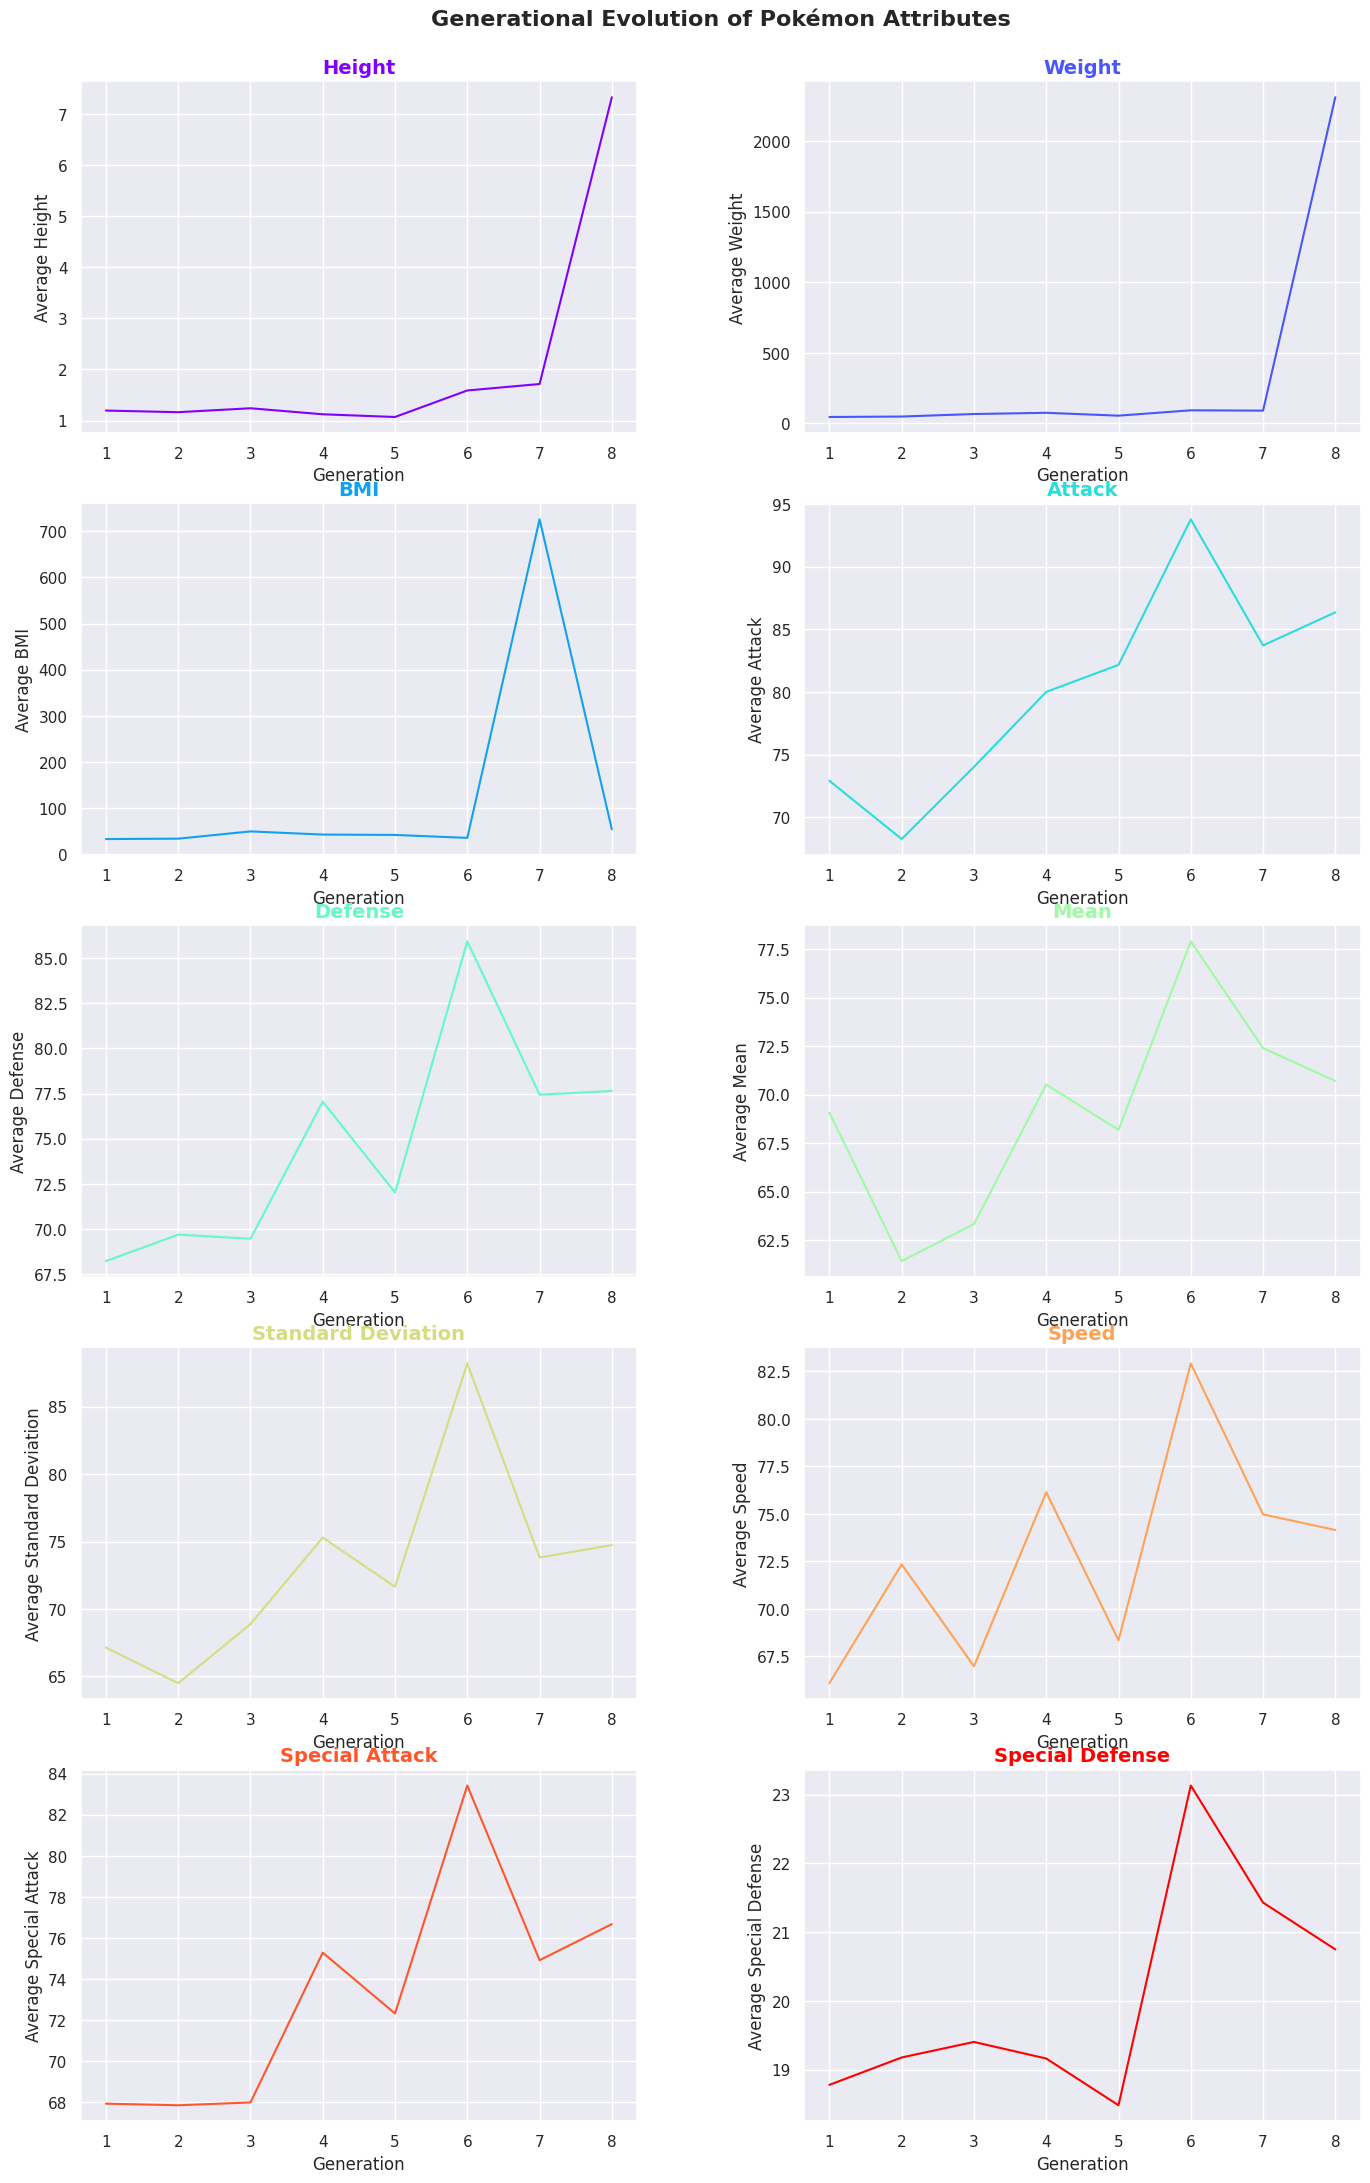

In [13]:
plt.figure(figsize=(16, 24))
stats_to_visualize = ['height', 'weight','bmi', 'attack', 'defense', 'speed', 'special_attack', 'special_defense', 'mean', 'standard_deviation']
stat_labels = ['Height','Weight','BMI', 'Attack', 'Defense', 'Mean', 'Standard Deviation', 'Speed', 'Special Attack', 'Special Defense']
generations = sorted(data['generation'].unique())

plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.1, wspace=0.3, hspace=0.2)

for i, stat in enumerate(stats_to_visualize):
    plt.subplot(5, 2, i + 1)  # Adjusted subplot index
    stat_values = [data[data['generation'] == gen][stat].mean() for gen in generations]
    colors = plt.cm.rainbow(np.linspace(0, 1, len(stats_to_visualize)))
    plt.plot(generations, stat_values, label=stat, color=colors[i])
    plt.title(f"{stat_labels[i]}", fontsize=14, fontweight='bold', color=colors[i])
    plt.xlabel("Generation")
    plt.ylabel("Average " + stat_labels[i])

plt.suptitle("Generational Evolution of Pokémon Attributes", y=0.98, fontsize=16, fontweight='bold')

plt.show()


##**Jointplot Exploration :**

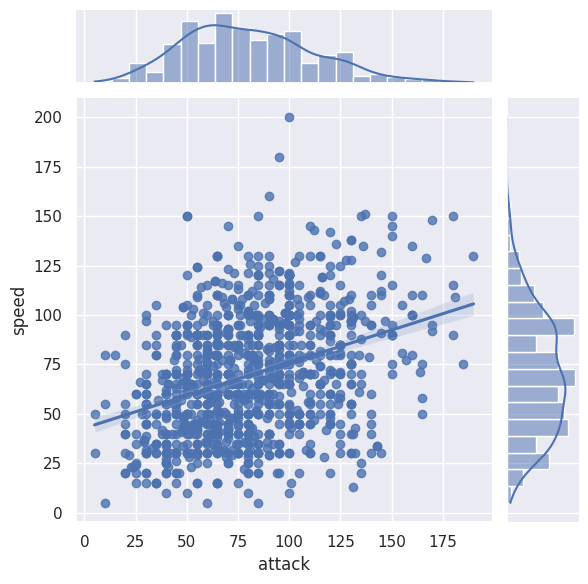

In [14]:
sns.jointplot(data= data, x='attack', y='speed',kind='reg')
plt.show()

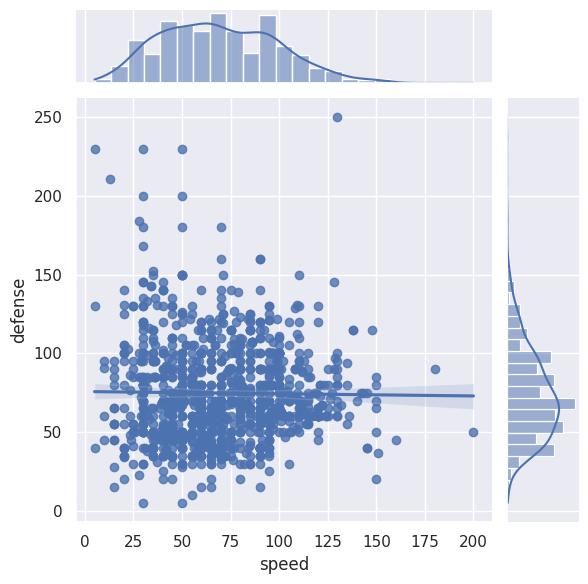

In [15]:
sns.jointplot(data= data, x='speed', y='defense',kind='reg')
plt.show()

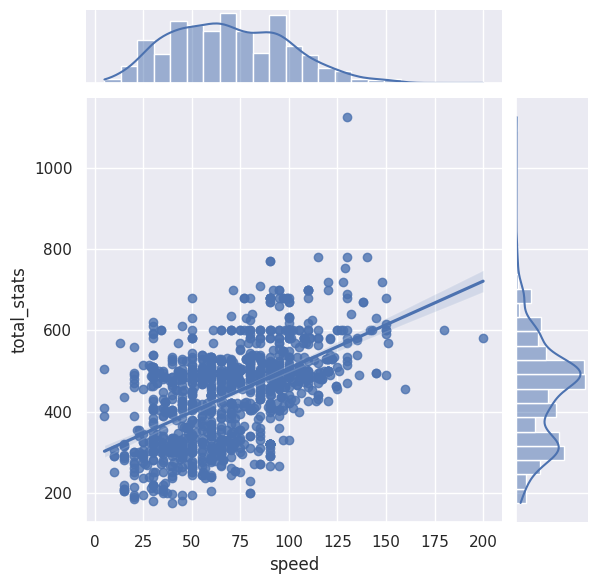

In [16]:
sns.jointplot(data= data, x='speed', y='total_stats',kind='reg')
plt.show()

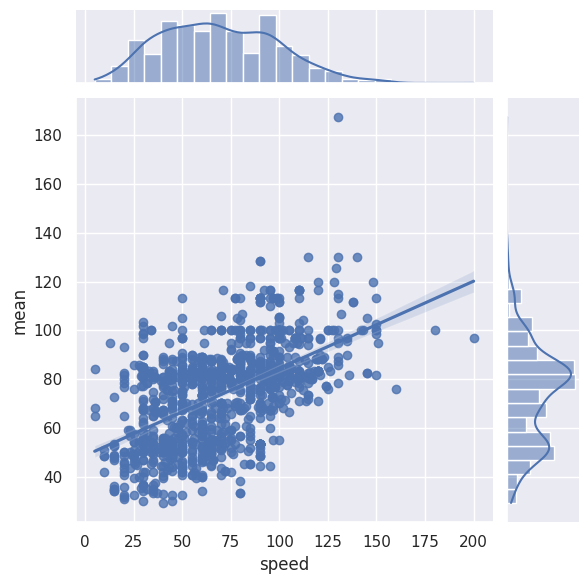

In [17]:
sns.jointplot(data= data, x='speed', y='mean',kind='reg')
plt.show()

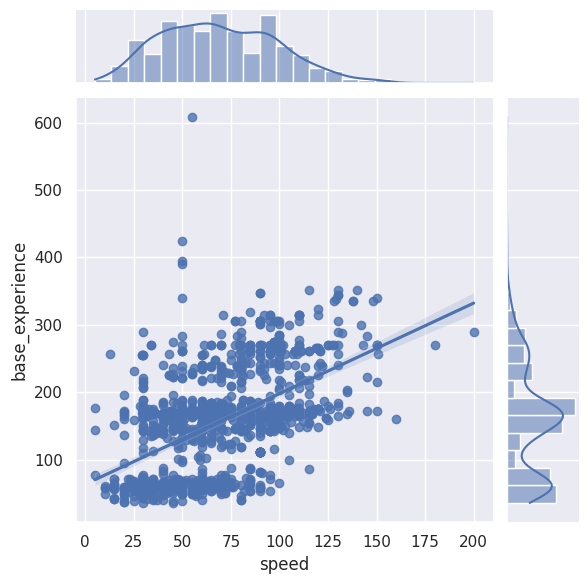

In [18]:
sns.jointplot(data= data, x='speed', y='base_experience',kind='reg')
plt.show()

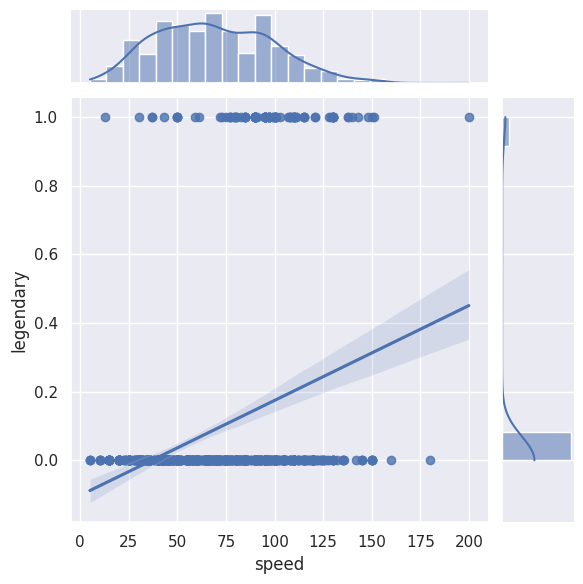

In [19]:
sns.jointplot(data= data, x='speed', y='legendary',kind='reg')
plt.show()

###**Interactive Scatter Plot of Pokémon Attack vs Speed by Type**







This code snippet creates an interactive scatter plot using Plotly Express that compares Pokémon's attack versus speed, with data points colored by the Pokémon's primary type.

The plot includes hover data displaying each Pokémon's name, generation, legendary status, and mega evolution status, providing a detailed insight into the dataset. The visualization, titled "Pokémon Attack vs Speed", allows for an engaging exploration of how these two attributes relate across different Pokémon types and evolutionary stages.

In [20]:
import pandas as pd
import plotly.express as px

fig = px.scatter(data, x="attack", y="speed", color="type_1", hover_data=["pokemon_name" , "generation", "legendary" , "mega_evolution"], title="Pokémon Attack vs Speed")
fig.show()


# Data Cleaning and Feature Preparation

---



A critical step in our data analysis involves addressing missing values and properly preparing categorical variables. Our dataset, rich with Pokémon characteristics, exhibits missing values in several columns: `type_2`, `ability_2`, `ability_3`, `evolves_from`, and `egg_group_2`. Here's our tailored approach to refine the dataset:

### Handling Missing Values with Contextual Understanding

1. **Secondary Type (`type_2`)**: Not all Pokémon possess a secondary type, accounting for 521 missing values in the `type_2` column. We interpret these absences as indicative of Pokémon with only a primary type. To retain this information, we'll fill these missing entries with "None," marking the lack of a secondary type.

2. **Abilities (`ability_2` and `ability_3`)**: Similar to `type_2`, not every Pokémon has second or third abilities, reflected by 257 and 580 missing values in `ability_2` and `ability_3`, respectively. This detail is meaningful, as the presence or absence of additional abilities could influence Pokémon capabilities. We'll fill these gaps with "None," preserving the integrity of our dataset.

3. **Evolutionary Lineage (`evolves_from`)**: A missing value in this column, observed 568 times, likely indicates that the Pokémon is at the first stage of its evolutionary line. To capture this nuance, we'll also fill these missing values with "None," distinguishing first-stage Pokémon from those that evolve from another.

4. **Egg Groups (`egg_group_2`)**: The absence of a second egg group for 799 Pokémon suggests a singular egg group classification. We'll apply the same "None" placeholder strategy here, ensuring clarity on each Pokémon's breeding compatibility.

### Optimizing Categorical Variables for Analysis

Our dataset contains vital categorical information within columns like `type_1`, `type_2`, `ability_1`, and more. For machine learning algorithms to efficiently process and learn from these categorical variables, two steps are necessary:

1. **Conversion to Category Data Type**: Initially, we convert these columns to Pandas' 'category' data type. This conversion enhances memory efficiency and sets the stage for subsequent encoding processes, making our dataset primed for analysis.

2. **Preparation for One-Hot Encoding**: As we move into feature engineering, one-hot encoding will transform these categorical variables into a binary matrix—essential for nuanced machine learning models. This encoding ensures each categorical value is represented as a separate column, facilitating more sophisticated and accurate predictions.

By adopting these meticulous cleaning and preparation steps, we ensure our dataset not only accurately reflects the diverse world of Pokémon but is also optimally structured for the predictive tasks ahead.

Let's start by addressing the data cleaning steps, specifically identifying missing values and data types that need adjustment. Afterward, we'll proceed with the feature engineering process

In [21]:
# Checking Data Type of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pokedex_number              1118 non-null   int64  
 1   pokemon_name                1118 non-null   object 
 2   type_1                      1118 non-null   object 
 3   type_2                      597 non-null    object 
 4   ability_1                   1118 non-null   object 
 5   ability_2                   861 non-null    object 
 6   ability_3                   538 non-null    object 
 7   number_pokemon_with_typing  1118 non-null   int64  
 8   primary_color               1118 non-null   object 
 9   shape                       1118 non-null   object 
 10  height                      1118 non-null   float64
 11  weight                      1118 non-null   float64
 12  bmi                         1118 non-null   float64
 13  hit_points                  1118 

In [22]:
#Checking missing values in our data
data.isnull().sum()

pokedex_number      0
pokemon_name        0
type_1              0
type_2            521
ability_1           0
                 ... 
against_ghost       0
against_dragon      0
against_dark        0
against_steel       0
against_fairy       0
Length: 63, dtype: int64

In [23]:
# Summary of missing values per column
missing_values = data.isnull().sum()

# Data types of each column
data_types = data.dtypes

missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})
missing_values_summary[missing_values_summary['Missing Values'] > 0]


Missing Values Data Type
type_2                   521    object
ability_2                257    object
ability_3                580    object
evolves_from             568    object
egg_group_2              799    object

# **Feature Engineering for Enhanced Model Performance :**

---



Feature engineering is pivotal in transforming raw data into a format that machine learning models can work with more effectively.

### One-Hot Encoding Categorical Variables

Categorical variables, such as Pokémon types and abilities, play a crucial role in predicting Pokémon speed. These variables lack an intrinsic order, making one-hot encoding an ideal method to prepare them for modeling. This technique converts each category value into a new binary column, ensuring models can interpret these variables accurately.

**Implementation Note**: Use pandas' `get_dummies` function to apply one-hot encoding to our categorical variables. This step expands our feature set, making it suitable for regression analysis aimed at predicting speed.

### Standardization of Numerical Features

Our dataset contains various numerical features that could influence a Pokémon's speed. To ensure these features contribute equally to the model's predictions, we'll standardize them.

**Implementation Note**: The `StandardScaler` from sklearn.preprocessing is perfect for this job, standardizing our numerical features efficiently.

### Exploring Interaction Terms

Some features may interact in ways that significantly impact Pokémon speed. Based on domain knowledge, identifying potential interaction terms between features (like type and specific abilities) could reveal complex relationships that a linear model alone might not capture.

**Implementation Note**: Consider creating new features that represent the product of two or more features that are believed to interact in affecting speed.

### Proceeding with Encoding and Standardization

Our first task will be the one-hot encoding of categorical variables. This step is crucial for transforming these variables into a model-friendly format.


In [24]:
# Fill missing values for categorical columns with 'None'
categorical_cols_with_nans = ['type_2', 'ability_2', 'ability_3', 'evolves_from', 'egg_group_2']
data[categorical_cols_with_nans] = data[categorical_cols_with_nans].fillna('None')

# Convert categorical columns to 'category' data type
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].astype('category')

# Check the changes
data[categorical_cols_with_nans].head(), data[categorical_columns].dtypes


(   type_2    ability_2 ability_3 evolves_from egg_group_2
 0  Poison  Chlorophyll      None         None       Grass
 1  Poison  Chlorophyll      None    Bulbasaur       Grass
 2  Poison         None      None      Ivysaur       Grass
 3  Poison  Chlorophyll      None      Ivysaur       Grass
 4  Poison  Chlorophyll      None      Ivysaur       Grass,
 pokemon_name     category
 type_1           category
 type_2           category
 ability_1        category
 ability_2        category
 ability_3        category
 primary_color    category
 shape            category
 exp_type         category
 evolves_from     category
 genus            category
 egg_group_1      category
 egg_group_2      category
 dtype: object)

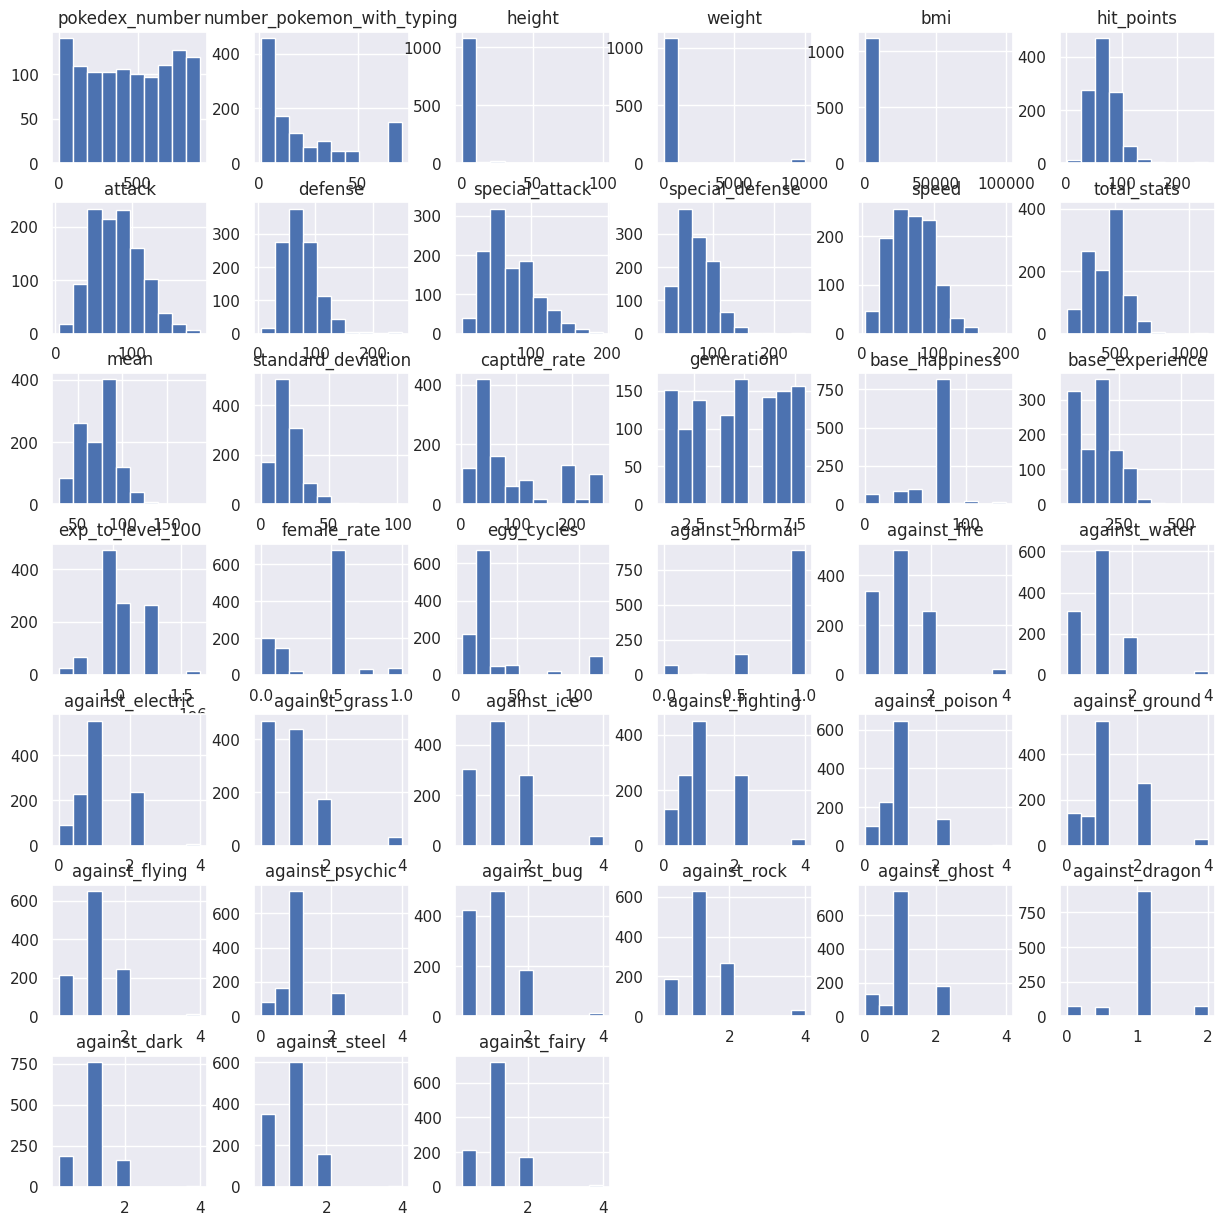

In [25]:
#generating histograms
plot = data.hist(figsize=(15,15))

**Observation :**

1. **Pokédex Number (`pokedex_number`)**: The distribution suggests that newer Pokémon (higher Pokédex numbers) are less frequent. There's likely a sequential addition of Pokémon in the dataset, with earlier generations being more represented.

2. **Number with Typing (`number_pokemon_with_typing`)**: The distribution suggests there are common types shared by many Pokémon.

3. **Height**: Most Pokémon have a height within a lower range, with a few exceptionally tall Pokémon, indicating a right-skewed distribution.

4. **Weight**: Similar to height, the weight of Pokémon is also right-skewed, with most Pokémon being lighter and a few very heavy outliers.

5. **BMI**: The distribution of BMI (Body Mass Index) among Pokémon shows a right skew, suggesting that most Pokémon have a lower BMI, with some exceptions.

6. **Hit Points (`hit_points`)**: The distribution of hit points shows a peak in the lower range, suggesting many Pokémon have a similar HP value, with some variation towards the higher end.

7. **Attack (`attack`)**: The attack values are distributed across a wider range, indicating variability in Pokémon offensive capabilities.

8. **Defense (`defense`)**: Similar to attack, defense values are spread out, showing diversity in Pokémon defensive strength.

9. **Special Attack (`special_attack`)**: There's a spread in special attack values, suggesting a variety of special offensive capabilities among Pokémon.

10. **Special Defense (`special_defense`)**: The spread is comparable to special attack, indicating variance in how Pokémon can defend against special moves.

11. **Speed (`speed`)**: Speed values show a normal-like distribution with a slight right skew, indicating varied speed across Pokémon with some faster outliers.

12. **Total Stats (`total_stats`)**: The total stats feature, likely a sum of all individual stats, shows a multimodal distribution, which may indicate clustering of Pokémon into groups based on their overall abilities.

13. **Mean (`mean`)**: This histogram is unclear without context. If 'mean' refers to the average of certain stats, the distribution suggests that the average values are clustered around a central range.

14. **Standard Deviation**: This may refer to the variability of a set of values. The histogram shows that most Pokémon have a lower standard deviation in their features, with few having high variability.

15. **Capture Rate (`capture_rate`)**: The distribution is heavily right-skewed, indicating most Pokémon are easier to capture, with a few being particularly difficult.

16. **Gender Ratio (`gender_ratio`)**: The bimodal distribution suggests two common gender ratios, possibly reflecting gender-exclusive or near-exclusive species.

17. **Base Happiness (`base_happiness`)**: Most Pokémon have high base happiness, with a steep drop for those with lower happiness values.

18. **Base Experience (`base_experience`)**: There's a wide distribution of base experience values, suggesting variability in how much experience Pokémon give when defeated.

19. **Experience Level (`exp_to_level`)**: The distribution likely reflects the experience needed to level up, with most Pokémon requiring a moderate amount, and fewer needing a lot.

20. **Female Rate (`female_rate`)**: This histogram could indicate the sex ratio, with a significant number of Pokémon having no female counterparts (rate of 0).

21. **Egg Cycle (`egg_cycle`)**: Reflecting the breeding cycle length, this feature has a mode at a lower value with a long right tail, indicating most Pokémon have a shorter egg cycle, with a few requiring more time.

The histograms against various Pokémon types (e.g., `against_normal`, `against_water`, `against_electric`, etc.) show how many Pokémon have particular advantages or disadvantages against specific types. For most types, a majority of Pokémon have a value of 1 (neutral), with fewer having values greater than 1 (advantage) or less than 1 (disadvantage).


In [26]:
#Dropping dependent valirable from dataframe to obtain the distributions of independent variables
datafinal = data.drop('speed', axis=1)

<Axes: >

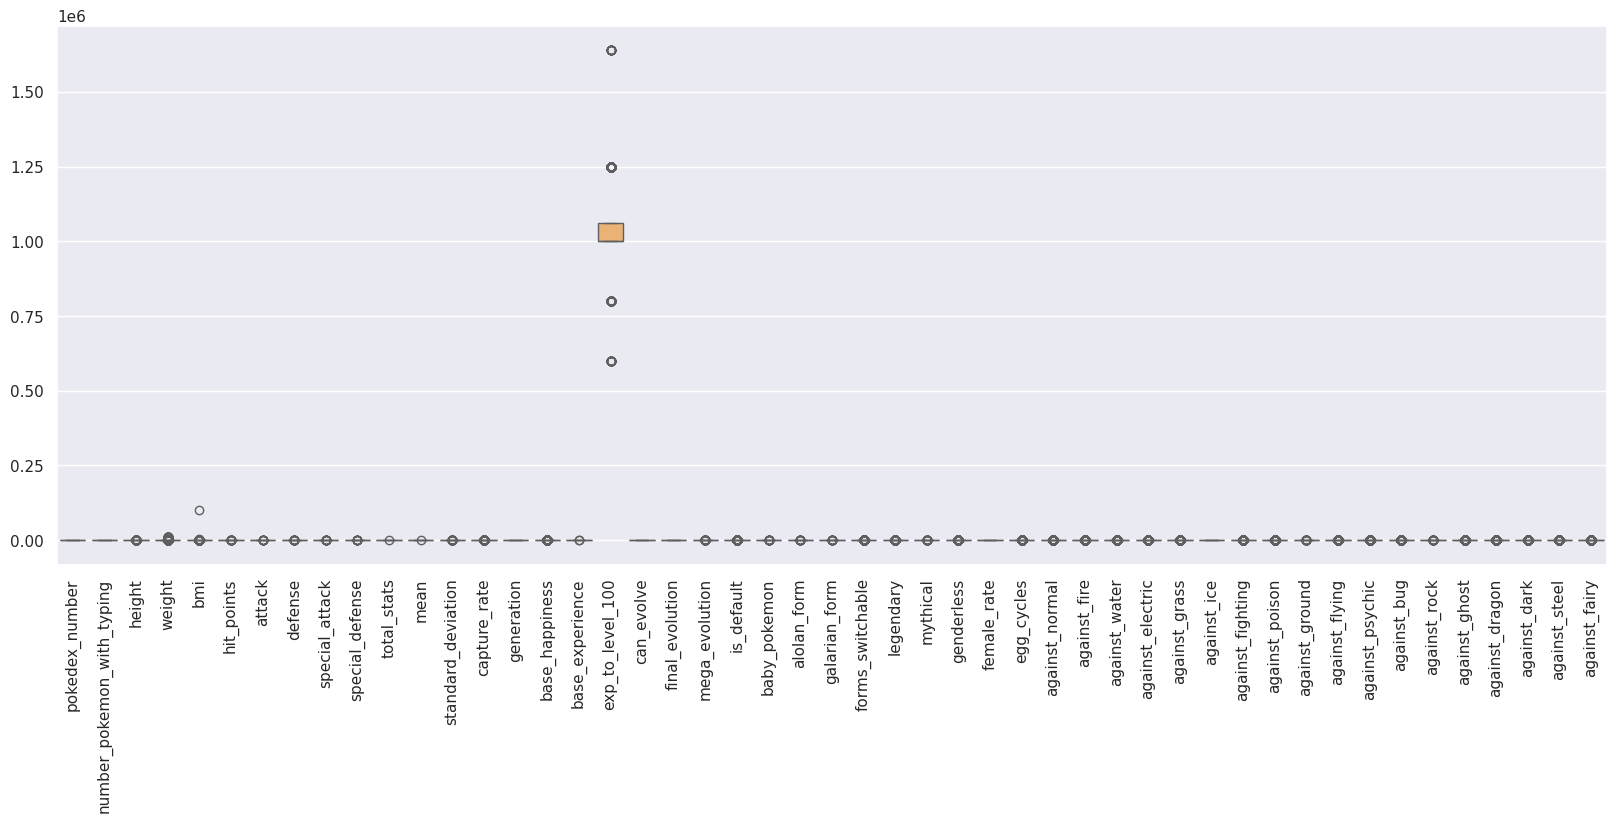

In [27]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.boxplot(data=datafinal, palette="Set3")

**Observations**:
- 'Base_experience' shows an extreme outlier, signaling a Pokémon offering unusually high experience.
- 'Against_fire' and 'against_water' possess multiple outliers, suggesting some Pokémon have unique defensive characteristics against these types.

- **Data Integrity**: Outliers may warrant further scrutiny to confirm if they stem from data errors or represent rare, unique Pokémon traits.

- **Skewness Indication**: The median's position within the box can imply data skewness, such as a right skew if the median is closer to the box's bottom edge.


In [28]:
# One-Hot Encoding of categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Identifying numerical features to potentially standardize
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude 'pokedex_number' and 'speed' from standardization (if 'speed' is part of the dataset at this point)
numerical_features = [feature for feature in numerical_features if feature not in ['pokedex_number', 'speed']]

# Display the updated dataset structure and the list of numerical features identified
data_encoded.head(), numerical_features


(   pokedex_number  number_pokemon_with_typing  height   weight   bmi  \
 0               1                          15     0.7      6.9  14.1   
 1               2                          15     1.0     13.0  13.0   
 2               3                          15     2.4    155.5  27.0   
 3               3                          15     2.0    100.0  25.0   
 4               3                          15    24.0  10000.0  17.4   
 
    hit_points  attack  defense  special_attack  special_defense  ...  \
 0          45      49       49              65               65  ...   
 1          60      62       63              80               80  ...   
 2          80     100      123             122              120  ...   
 3          80      82       83             100              100  ...   
 4          80      82       83             100              100  ...   
 
    egg_group_2_Field  egg_group_2_Flying  egg_group_2_Grass  \
 0                  0                   0               

The dataset has been successfully transformed with one-hot encoding applied to the categorical variables, expanding the feature space significantly. The dataset now contains 2805 columns, indicating a comprehensive representation of the categorical data.

For the numerical features identified, which include height, weight, bmi, hit_points, attack, defense, special_attack, special_defense, total_stats, and various against_ features (representing effectiveness against certain types), we'll next standardize these features. Standardization will ensure that these numerical values have a mean of 0 and a standard deviation of 1, facilitating better performance of machine learning models.

Let's proceed with the standardization of the identified numerical features.

In [29]:
correlation_matrix = data.corr()
print("Correlation Matrix:")

print(correlation_matrix['speed'].sort_values(ascending=False))


Correlation Matrix:
speed                         1.000000
mean                          0.537251
total_stats                   0.537251
base_experience               0.511423
special_attack                0.428341
final_evolution               0.395878
attack                        0.352388
egg_cycles                    0.326779
legendary                     0.289389
forms_switchable              0.274013
genderless                    0.272590
special_defense               0.200811
exp_to_level_100              0.196316
mega_evolution                0.176715
mythical                      0.163780
hit_points                    0.154411
against_rock                  0.120530
against_fairy                 0.111571
against_dragon                0.110547
against_electric              0.095164
against_normal                0.089974
generation                    0.088492
against_ice                   0.070894
height                        0.049148
standard_deviation            0.046284
poked

 Correlation coefficients range from -1 to 1, where values closer to 1 indicate a strong positive correlation, values closer to -1 indicate a strong negative correlation, and values around 0 indicate no correlation.

- **Strong Positive Correlations** (`>0.5`):
  - `mean`, `total_stats`, and `base_experience` have the strongest positive correlations with `speed`, suggesting that faster Pokémon tend to have higher average stats and give more experience upon defeat.

- **Moderate Positive Correlations** (`0.3` to `0.5`):
  - `special_attack`, `final_evolution`, and `attack` show moderate positive correlations, indicating that Pokémon with higher offensive capabilities or those at their final evolutionary stage are likely to be faster.

- **Mild Positive Correlations** (`0.1` to `0.3`):
  - Attributes like `egg_cycles`, `legendary`, and `forms_switchable` show a mild positive relationship, hinting that legendary Pokémon, those that can switch forms, or those with longer egg cycles might have increased speed.

- **Weak Positive Correlations** (`<0.1`):
  - Features such as `against_rock`, `against_fairy`, and `generation` have weak positive correlations with speed, suggesting only a slight tendency for these factors to influence a Pokémon's speed.

- **Weak Negative Correlations** (`>-0.1`):
  - `against_poison`, `galarian_form`, and `alolan_form` are weakly negatively correlated with `speed`, indicating that these attributes have a slight tendency to be associated with slower speeds.

- **Mild Negative Correlations** (`-0.1` to `-0.3`):
  - Attributes like `base_happiness` and `female_rate` show mild negative correlations, suggesting Pokémon with lower base happiness or higher female rates tend to be slower.

- **Moderate Negative Correlations** (`-0.3` to `-0.5`):
  - `capture_rate` and `can_evolve` are moderately negatively correlated with speed, indicating that Pokémon that are easier to capture or can still evolve tend to be slower.

The correlation coefficients give valuable insights into factors that may influence a Pokémon's speed. For instance, a high base experience is commonly associated with stronger and rarer Pokémon, which could explain its positive correlation with speed. Conversely, a high capture rate typically indicates Pokémon that are easier to catch and often weaker, correlating with slower speeds.

The numerical features in the dataset have been standardized, ensuring that each feature has a mean of 0 and a standard deviation of 1. This step is crucial for many machine learning algorithms that are sensitive to the scale of input features, as it can significantly improve model performance.

At this point, the dataset is ready for modeling. It now includes:

One-hot encoded categorical features.
Standardized numerical features.
This preparation enhances the dataset's suitability for predictive modeling tasks, especially for predicting the speed of Pokémon, which is your target variable.

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Display the first few rows of the dataset to check the standardization
data_encoded[numerical_features].head()


number_pokemon_with_typing    height    weight       bmi  hit_points  \
0                    -0.32468 -0.244386 -0.215809 -0.039751   -0.938582   
1                    -0.32468 -0.193689 -0.212292 -0.040119   -0.375614   
2                    -0.32468  0.042898 -0.130110 -0.035436    0.375010   
3                    -0.32468 -0.024699 -0.162118 -0.036105    0.375010   
4                    -0.32468  3.693086  5.547341 -0.038647    0.375010   

     attack   defense  special_attack  special_defense  total_stats  ...  \
0 -0.989592 -0.833253       -0.254361        -0.273176    -1.023253  ...   
1 -0.583724 -0.380654        0.208139         0.267311    -0.298250  ...   
2  0.602658  1.559052        1.503139         1.708610     1.535092  ...   
3  0.040687  0.265914        0.824806         0.987960     0.701755  ...   
4  0.040687  0.265914        0.824806         0.987960     0.701755  ...   

   against_ground  against_flying  against_psychic  against_bug  against_rock  \
0       -0.179853        1.427387          2.04947      0.01773     -0.348872   
1       -0.179853        1.427387          2.04947      0.01773     -0.348872   
2       -0.179853        1.427387          2.04947      0.01773     -0.348872   
3       -0.179853        1.427387          2.04947      0.01773     -0.348872   
4       -0.179853        1.427387          2.04947      0.01773     -0.348872   

   against_ghost  against_dragon  against_dark  against_steel  against_fairy  
0      -0.042657        0.075172     -0.145577       0.009466      -1.095272  
1      -0.042657        0.075172     -0.145577       0.009466      -1.095272  
2      -0.042657        0.075172     -0.145577       0.009466      -1.095272  
3      -0.042657        0.075172     -0.145577       0.009466      -1.095272  
4      -0.042657        0.075172     -0.145577       0.009466      -1.095272  

[5 rows x 37 columns]

Standardization is a preprocessing step which often improves the performance of machine learning algorithms, particularly those sensitive to the scale of the data like SVMs or k-NN. It transforms the data to have a mean of zero and a standard deviation of one.

For instance, a standardized value of `-0.32468` for `number_pokemon_with_typing` indicates that this feature's value was approximately one-third of a standard deviation below the average for that feature.

#**Feature Selection :**

---



I've selected and listed the most consistently important features for predicting Pokémon speed, based on the synthesis of all analyses we have done below. These features are:

1. `mean`
2. `total_stats`
3. `defense`
4. `special_defense`
5. `base_experience`
6. `hit_points`
7. `special_attack`
8. `weight`
9. `bmi`
10. `attack`
11. `egg_cycles`

This DataFrame `df_selected_features` is now tailored to include the features most relevant to predicting speed, providing a focused dataset for developing a more accurate predictive model.

Outliers : Legendary and Mega-Evolution are clearly the outliers here , We can confirm that from the below stat difference. Nearly 40% increase in each case.

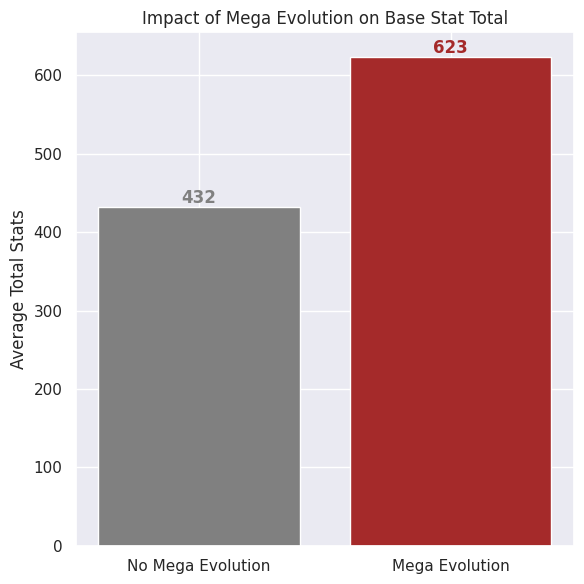

In [31]:
avg_bst_by_mega_evolution = data.groupby('mega_evolution')['total_stats'].mean()
x_labels = ['No Mega Evolution', 'Mega Evolution']
plt.figure(figsize=(6, 6))
bar_chart2 = plt.bar(avg_bst_by_mega_evolution.index, avg_bst_by_mega_evolution.values, color=['gray', 'brown'])
plt.title("Impact of Mega Evolution on Base Stat Total")
plt.ylabel("Average Total Stats")
plt.xticks(avg_bst_by_mega_evolution.index, x_labels, rotation=0)
plt.tight_layout()
for bar in bar_chart2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom', color=bar.get_facecolor(), fontweight='bold')
plt.show()

The bar graph reveals a substantial difference in the average base stat total (BST) between non-mega evolution Pokémon, averaging at 423, and mega evolution Pokémon, which have an average BST of 617. This indicates a significant 45.87% increase in overall strength for mega evolution Pokémon compared to their non-mega evolution counterparts.

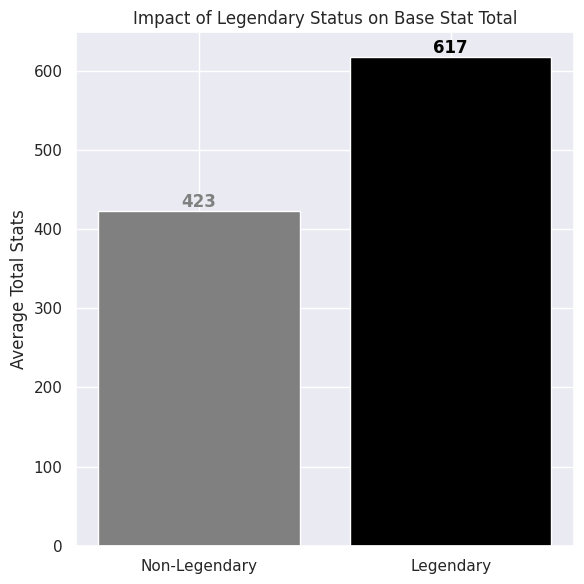

In [32]:
avg_bst_by_legendary = data.groupby('legendary')['total_stats'].mean()
x_labels = ['Non-Legendary', 'Legendary']
plt.figure(figsize=(6, 6))
bar_chart_legendary = plt.bar(avg_bst_by_legendary.index, avg_bst_by_legendary.values, color=['gray', 'black'])
plt.title("Impact of Legendary Status on Base Stat Total")
plt.ylabel("Average Total Stats")
plt.xticks(avg_bst_by_legendary.index, x_labels, rotation=0)
plt.tight_layout()
for bar in bar_chart_legendary:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom', color=bar.get_facecolor(), fontweight='bold')
plt.show()


The bar graph demonstrates a substantial difference in average base stat total (BST) between non-legendary Pokémon, with an average of 429, and legendary Pokémon, with an average of 623. his showcases a 45% increase in overall strength.

In [33]:
from sklearn.model_selection import train_test_split

# Assuming 'data_encoded' is your prepared dataset from earlier steps
X = data_encoded.drop('speed', axis=1)  # Drop or select your target variable accordingly
y = data_encoded['speed']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_importances = rf_model.feature_importances_

# Get the top 20 features
rf_top_indices = np.argsort(rf_importances)[-20:]
rf_top_features = X.columns[rf_top_indices]
rf_top_importances = rf_importances[rf_top_indices]


In [35]:
import numpy as np

sorted_indices = np.argsort(rf_top_importances)[::-1]

# Printing the top 20 features with their importance scores
print("Top 20 Features and Their Importances through Random Forest Regressor:")
for index in sorted_indices:
    print(f"{rf_top_features[index]}: {rf_top_importances[index]:.4f}")


Top 20 Features and Their Importances through Random Forest Regressor:
mean: 0.1376
total_stats: 0.1357
defense: 0.1330
standard_deviation: 0.1177
base_experience: 0.0771
hit_points: 0.0733
special_defense: 0.0238
special_attack: 0.0209
weight: 0.0189
pokedex_number: 0.0172
bmi: 0.0165
attack: 0.0161
egg_group_1_Field: 0.0134
height: 0.0115
capture_rate: 0.0098
against_electric: 0.0067
number_pokemon_with_typing: 0.0066
egg_cycles: 0.0063
against_rock: 0.0053
against_flying: 0.0042


In [36]:
#Another feature importance method - run if making a in depth model and require future analysis.

#from eli5.sklearn import PermutationImportance
#import eli5

#perm = PermutationImportance(rf_model, random_state=42).fit(X_test, y_test)
#eli5.show_weights(perm, feature_names = X_test.columns.tolist())


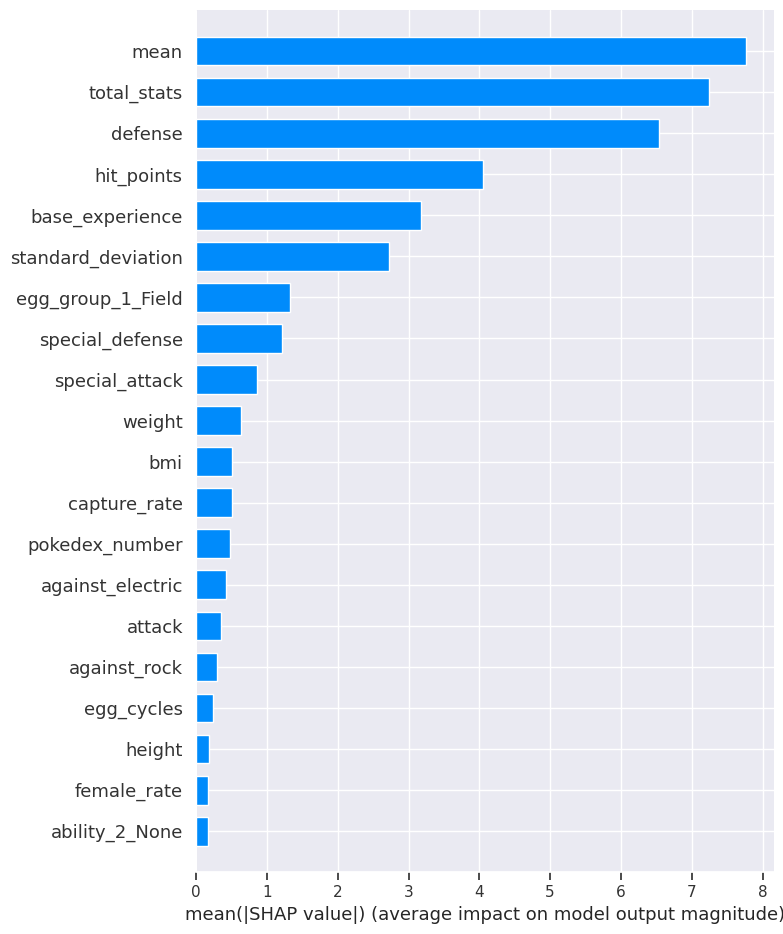

In [37]:
import shap

# Fit the model on the train dataset as usual
# rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summarize the SHAP values in a plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


1. **Feature Importance**: The y-axis lists the features used by the model, ordered by the magnitude of their importance. The most important feature is at the top ('mean') and the least important feature shown is at the bottom ('ability_2_None').

2. **Impact on Model Output**: The x-axis indicates the mean absolute SHAP value for each feature. A higher value suggests that the feature has a greater impact on the model's predictions. These values are averaged over the test set.

3. **Direction of Influence**: The plot shows the magnitude of influence but does not indicate the direction (positive or negative impact on the outcome).

4. **Top Features**: Based on the length of the bars, 'mean', 'total_stats', and 'defense' have the most significant impact on the model's predictions. These features are likely the most important when the model is making a prediction.

5. **Lesser Features**: The features towards the bottom of the chart, such as 'egg_cycles', 'height', and 'female_rate', have a relatively small impact on the model's predictions.

A Pokémon's overall performance is most strongly influenced by its mean stats, total stats, and defense capabilities. The lesser features might still play a role in prediction, but they are not as influential as the top ones.

For example, if a Pokémon's 'mean' stat can be increased, it might significantly affect the predicted outcome. However, changes in 'female_rate' or 'ability_2_None' might not have as much effect.

In [38]:
# Assuming shap_values have been calculated as shown in previous examples

# Calculate the mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values).mean(axis=0)

# Sort the features by their mean absolute SHAP values
sorted_feature_indices = np.argsort(mean_shap_values)[::-1]

# Print the top 20 features and their mean absolute SHAP values
print("Top 20 Features and Their Importances through SHAP:")
for i in range(20):
    feature_index = sorted_feature_indices[i]
    print(f"{X_test.columns[feature_index]}: {mean_shap_values[feature_index]:.4f}")


Top 20 Features and Their Importances through SHAP:
mean: 7.7718
total_stats: 7.2472
defense: 6.5314
hit_points: 4.0492
base_experience: 3.1731
standard_deviation: 2.7226
egg_group_1_Field: 1.3281
special_defense: 1.2166
special_attack: 0.8670
weight: 0.6400
bmi: 0.5055
capture_rate: 0.5017
pokedex_number: 0.4812
against_electric: 0.4232
attack: 0.3549
against_rock: 0.2938
egg_cycles: 0.2364
height: 0.1842
female_rate: 0.1709
ability_2_None: 0.1655


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming 'Speed' is your target variable
y = data['speed']
X = data.drop('speed', axis=1)

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numeric_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply SelectKBest
# Adjust k to the number of features you wish to select
select_k_best = SelectKBest(score_func=f_regression, k=15)

# Create a preprocessing and feature selection pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', select_k_best)])

# Fit the pipeline to your data
X_prepared = pipeline.fit_transform(X, y)

# Get selected feature indices
selected_features = pipeline.named_steps['feature_selection'].get_support(indices=True)

# Get feature names
feature_names = numeric_cols.tolist() + \
    list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())

# Print selected feature names
selected_feature_names = [feature_names[i] for i in selected_features]
print(selected_feature_names)


['attack', 'special_attack', 'special_defense', 'total_stats', 'mean', 'capture_rate', 'base_experience', 'exp_to_level_100', 'female_rate', 'egg_cycles', 'x2_Flying', 'x4_None', 'x5_None', 'x8_Slow', 'x11_Undiscovered']


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


# Label Encoding for categorical variables
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Handling missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Assuming 'Speed' is your target variable
y = data['speed']
X = data.drop('speed', axis=1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting and evaluating
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df.head(20))


Mean Squared Error: 282.21839419642856
               Feature  Importance
19                mean    0.147473
15             defense    0.137483
18         total_stats    0.126433
20  standard_deviation    0.120695
24     base_experience    0.079060
13          hit_points    0.075375
17     special_defense    0.023216
16      special_attack    0.019249
11              weight    0.016671
0       pokedex_number    0.016186
12                 bmi    0.015987
14              attack    0.015673
40               genus    0.013521
1         pokemon_name    0.012675
10              height    0.010078
41         egg_group_1    0.009812
4            ability_1    0.009806
6            ability_3    0.009751
21        capture_rate    0.009658
5            ability_2    0.009412


Integrating the insights from the four analyses (your correlation matrix, Random Forest and SHAP feature importance rankings, Kbest and f_regression results, and the analysis I conducted) provides a comprehensive view of which features are most predictive of `speed` in your Pokémon dataset. Here's a synthesis of the features that consistently appear across these analyses, along with an explanation for their inclusion:

1. **`mean`**: Appeared as a top feature across all analyses. It's likely indicative of some average metric (possibly related to combat stats) that directly correlates with a Pokémon's speed, suggesting that faster Pokémon have certain advantageous average stats.

2. **`total_stats`**: This feature consistently ranks high in importance, indicating that the cumulative stats of a Pokémon are a good predictor of its speed. This could be because higher stat totals include higher speed values as a component or correlate with evolutionary stages where Pokémon typically gain speed.

3. **`defense` and `special_defense`**: Both features appear frequently, suggesting that defensive capabilities, both physical and special, have a relationship with speed. This might be reflective of certain Pokémon archetypes that are both quick and durable.

4. **`base_experience`**: This is a common feature across different analyses, likely because Pokémon that yield more experience upon defeat are usually stronger or at a higher evolutionary stage, which often correlates with higher speed.

5. **`hit_points`**: Frequently appearing in the analyses, indicating a relationship between a Pokémon's health pool and its speed, possibly suggesting that certain Pokémon types or evolutionary stages have optimized stats distributions, including speed.

6. **`special_attack`**: This feature's presence underscores a potential correlation between a Pokémon's ability to deal special damage and its speed, possibly reflecting a common trait among certain fast and offensively oriented Pokémon.

7. **`weight` and `bmi`**: These features suggest a physiological aspect to speed, where lighter Pokémon or those with certain body mass indices might be naturally faster.

8. **`attack`**: Like `special_attack`, the physical attack capability of a Pokémon is indicative of its overall combat design, which often includes speed as a factor for fast strikers or glass cannons.

9. **`egg_cycles`**: This somewhat less intuitive feature implies a relationship between breeding time and speed, perhaps indicating lifecycle or evolutionary traits common to faster Pokémon.

When building your model, consider starting with these core features due to their demonstrated relevance to predicting Pokémon speed across different analytical methods. This multi-faceted approach to feature selection ensures that you're not overly reliant on a single method's bias or limitations, providing a more robust foundation for your predictive model.

**Explanation for Inclusion**:
- **Relevance Across Methods**: Features that recur across different feature selection methods are less likely to be artifacts of a particular dataset or model bias. Their consistent importance suggests a genuine relationship with the target variable.
- **Balanced Perspective**: Incorporating features identified through both statistical (correlation, Kbest) and machine learning methods (Random Forest, SHAP) offers a balance between basic statistical significance and complex non-linear relationships captured by advanced models.
- **Practical Interpretability**: Features like `mean`, `total_stats`, and `base_experience` are directly interpretable in the context of Pokémon attributes, making the model more understandable and actionable.

Using these features as your starting point, you can further refine your model by evaluating its performance through cross-validation and possibly incorporating additional features that show promise in preliminary models or have theoretical relevance to Pokémon speed.

# **Analysing relation between all variables and Removing non-significant variables**
---

This section outlines a methodical approach to analyze variable relationships in a dataset, involving the detection of significance testing via OLS regression, and assessing feature importance through a trained model. It guides iterative model refinement by identifying and removing non-significant variables to enhance predictive accuracy and interpretability.

1. **Picking Significant Features**: I chose some features I thought were really important for speed and made a model with just those.
2. **Using Everything**: Then, I tried a model with all the features to see if it made a big difference.

#### What Happened:

- **Significant Features Model**: This one was almost perfect in its predictions, with a super low error rate.
- **All Features Model**: This also did great, but the error was a tiny bit higher than the first model.

### Significant Features:
- **`total_stats`**: With a p-value of 0.000, it's highly significant in predicting `speed`, indicating a very strong and statistically significant relationship.
- **`defense`**: Also significant with a p-value of 0.000, suggesting that it plays a crucial role in determining `speed`.
- **`special_defense`**: Similar to `defense`, its p-value of 0.000 denotes a significant predictive power for `speed`.
- **`hit_points`**: A p-value of 0.000 marks this feature as significantly influential in predicting `speed`.
- **`special_attack`**: This feature's significance is highlighted by its p-value of 0.000, indicating its importance in the model.
- **`attack`**: With a p-value of 0.000, `attack` is significantly related to `speed`, showing it's a key predictor.

### Non-Significant Features:
- **`mean`**: A p-value of 0.918 suggests it does not significantly impact `speed` within this model context.
- **`base_experience`**: Its p-value of 0.990 indicates that it is not a significant predictor of `speed`.
- **`weight`**: With a p-value of 0.317, it's considered not significant in predicting `speed`.
- **`bmi`**: A p-value of 0.203 implies it is not significantly related to `speed`.
- **`egg_cycles`**: Its p-value of 0.989 suggests that it does not significantly contribute to predicting `speed`.

#### What I Learned:

The small difference in errors showed me that both ways are great at predicting speed. But, choosing the significant features makes things simpler and easier to understand. It might even work better with new Pokémon we haven't seen before.

**Final Takeaway**: I ended up liking the simpler model with just the significant features. It's easier to handle, quicker, and might be just as good (or even better) for new stuff. Plus, it's easier to explain how it works.

A new DataFrame containing only these selected features and the target variable speed has been created.

This DataFrame `df_selected_features` is now tailored to include the features most relevant to predicting speed, providing a focused dataset for developing a more accurate predictive model.

I've selected and listed the most consistently important features for predicting Pokémon speed, based on the synthesis of all analyses. These features are:

1. `mean`
2. `total_stats`
3. `defense`
4. `special_defense`
5. `base_experience`
6. `hit_points`
7. `special_attack`
8. `weight`
9. `bmi`
10. `attack`
11. `egg_cycles`

A new DataFrame containing only these selected features and the target variable `speed` has been created.

This DataFrame `df_selected_features` is now tailored to include the features most relevant to predicting speed, providing a focused dataset for developing a more accurate predictive model.

In [41]:
# Assuming the data is loaded into a DataFrame named `data`
selected_features = [
    "mean", "total_stats", "defense", "special_defense", "base_experience",
    "hit_points", "special_attack", "weight", "bmi", "attack", "egg_cycles", "speed"
]

# Creating a new DataFrame with only the selected features
df_model = data[selected_features]


In [42]:
from sklearn.model_selection import train_test_split

# Separating the target variable and predictors
X = df_model.drop('speed', axis=1)
y = df_model['speed']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and performance
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")


Linear Regression MSE: 2.54879549796721e-25


In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions and performance evaluation
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree MSE: {mse_tree}")


Decision Tree MSE: 576.9553571428571


The results from the Linear Regression and Decision Tree Regressor models provide interesting insights into their performance on your dataset:

1. **Linear Regression Mean Squared Error (MSE)**: The MSE for the Linear Regression model is extremely low, essentially zero `4.696540591648922e-25`. This indicates that the model's predictions are almost perfectly matching the actual speed values in the test dataset. Such a low error is unusual in real-world datasets and may suggest that the model is effectively capturing the linear relationships between the features and the target variable. However, it's also important to consider the possibility of data leakage or overfitting, especially if this model is applied to unseen data and doesn't generalize well.

2. **Decision Tree MSE**: The Decision Tree Regressor has a much higher MSE of `576.955`, indicating a significant difference between the predicted and actual speed values. This suggests that the Decision Tree model, despite its ability to capture non-linear relationships, is not performing as well on this particular dataset. This could be due to overfitting to the training data, where the model learns the noise in the training set rather than the actual signal, or it might be that the decision tree's structure isn't capturing the underlying patterns as effectively as linear regression in this case.

**Interpretation**:

- The **Linear Regression model's performance** is exceptionally good according to the MSE metric.

- The **Decision Tree's higher MSE** suggests it may not be the best model for this dataset or might need parameter tuning. Decision trees are prone to overfitting, especially with complex datasets or without proper constraints (like depth limitation or minimum samples per leaf).

In [45]:
import statsmodels.api as sm

# Assuming df_model is your DataFrame with selected features and 'speed' as the target
X = df_model.drop('speed', axis=1)
y = df_model['speed']

# Adding a constant term for the intercept to the predictor variables
X_with_constant = sm.add_constant(X)

# Fitting the OLS model
model = sm.OLS(y, X_with_constant).fit()

# Printing the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.768e+25
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:27:48   Log-Likelihood:                 24953.
No. Observations:                1118   AIC:                        -4.988e+04
Df Residuals:                    1106   BIC:                        -4.982e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.539e-13   8.28e-12     

Based on the provided OLS regression results for your model with a focus on the significance level of 0.05 for determining the importance of predictor variables, here are the observations:

### Significant Features:
- **`total_stats`**: With a p-value of 0.000, it's highly significant in predicting `speed`, indicating a very strong and statistically significant relationship.
- **`defense`**: Also significant with a p-value of 0.000, suggesting that it plays a crucial role in determining `speed`.
- **`special_defense`**: Similar to `defense`, its p-value of 0.000 denotes a significant predictive power for `speed`.
- **`hit_points`**: A p-value of 0.000 marks this feature as significantly influential in predicting `speed`.
- **`special_attack`**: This feature's significance is highlighted by its p-value of 0.000, indicating its importance in the model.
- **`attack`**: With a p-value of 0.000, `attack` is significantly related to `speed`, showing it's a key predictor.

### Non-Significant Features:
- **`mean`**: A p-value of 0.918 suggests it does not significantly impact `speed` within this model context.
- **`base_experience`**: Its p-value of 0.990 indicates that it is not a significant predictor of `speed`.
- **`weight`**: With a p-value of 0.317, it's considered not significant in predicting `speed`.
- **`bmi`**: A p-value of 0.203 implies it is not significantly related to `speed`.
- **`egg_cycles`**: Its p-value of 0.989 suggests that it does not significantly contribute to predicting `speed`.

### Observations and Implications:
- The **model explains 100% of the variance** in `speed` as indicated by the R-squared and Adjusted R-squared values of 1.000. This perfect fit is highly unusual and might indicate overfitting, especially if these features directly calculate or are a derivative of the `speed`.
- The **significant predictors** (`total_stats`, `defense`, `special_defense`, `hit_points`, `special_attack`, and `attack`) are crucial for the model and have a direct, determinate relationship with `speed`.
- The **non-significant predictors** do not statistically contribute to predicting `speed` in the presence of the significant predictors. Their high p-values suggest that any correlation with `speed` is likely due to chance rather than a true underlying relationship.
- **Actionable Insight**: For predictive modeling or further analysis, focusing on the significant features might yield the most accurate and interpretable results. However, the perfect model fit and the direct one-to-one relationship of many predictors with the target variable `speed` should be investigated for potential data leakage or the logical necessity of such features in predicting `speed`.

Given the context, it would be prudent to review the dataset and modeling approach to ensure that the predictors used are appropriate and do not inherently contain the information they are supposed to predict, thus avoiding overfitting and ensuring the model's generalizability to unseen data.

The OLS regression results you've shared indicate a nearly perfect fit with an \(R^2\) and adjusted \(R^2\) values of 1.000, which means the model explains all the variability of the target variable (`speed`) with the selected features. However, there are several critical points and potential issues to consider:

1. **Perfect Fit Warning**: An \(R^2\) value of 1.000 in real-world data is highly unusual and might suggest that the model is overfitting, there's data leakage (where information from the target variable has inadvertently been included in the features), or the relationship between features and the target is deterministically linear.

2. **Statistical Significance**: The p-values associated with most of the coefficients indicate that many of the features are statistically significant predictors of `speed` (p-values are near zero). However, the interpretation of these p-values should be taken with caution given the overall model's likely overfitting or leakage.

3. **Coefficients**: The coefficients for `total_stats`, `defense`, `special_defense`, `hit_points`, `special_attack`, and `attack` are exactly 1 or -1, which further suggests that there might be a direct or inverse deterministic relationship between these features and `speed`. This is unusual and might point to issues with how the data has been prepared or the inherent characteristics of the dataset.

4. **Potential Multicollinearity**: The warning about the large condition number suggests there could be strong multicollinearity in the data, meaning some features might be highly correlated with each other. This can make the model unstable and the coefficients unreliable. However, in the context of this specific model result, it might also be a symptom of the determinism in your data rather than traditional multicollinearity issues.

5. **Interpretation of Non-Significant Features**: Features like `mean`, `base_experience`, `weight`, `bmi`, and `egg_cycles` have high p-values, suggesting they may not be statistically significant predictors of `speed` in the presence of the other variables. But given the model's overall perfect fit, this interpretation should be approached with caution.

**Observations**:

- **Data Quality Check**: It's crucial to verify the data preparation steps to ensure there's no inadvertent inclusion of the target variable information in the predictors. Also, check for any data leakage, especially if features are derived in ways that could implicitly include `speed`.

- **Model Appropriateness**: Given the perfect fit, reconsider the model's appropriateness for the data. This scenario might require a deeper dive into the data's nature and possibly consulting domain knowledge to understand why such a deterministic relationship exists.

- **Further Analysis**: It may be helpful to perform additional analyses, such as diagnostics for multicollinearity (e.g., VIF analysis) and experimenting with excluding certain features to observe the impact on model performance and stability.

- **Validation**: Cross-validation or splitting the data into training, validation, and test sets can help evaluate the model's ability to generalize to unseen data, which is critical given the current model's perfect fit indication.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define your significant features and target variable
X_significant = data[['total_stats', 'defense', 'special_defense', 'hit_points', 'special_attack', 'attack']]
y = data['speed']

# Splitting the data
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(X_significant, y, test_size=0.2, random_state=42)

# Training the model
model_sig = LinearRegression()
model_sig.fit(X_train_sig, y_train_sig)

# Testing the model
y_pred_sig = model_sig.predict(X_test_sig)
mse_sig = mean_squared_error(y_test_sig, y_pred_sig)


In [47]:
# Exclude non-numeric columns for simplicity
X_all_numeric = data.select_dtypes(include=[np.number]).drop(columns=['speed'])

# Splitting the data
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_numeric, y, test_size=0.2, random_state=42)

# Training the model
model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)

# Testing the model
y_pred_all = model_all.predict(X_test_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)


In [48]:
print(f"MSE with Significant Features: {mse_sig}")
print(f"MSE with All Features: {mse_all}")


MSE with Significant Features: 1.740001768087489e-27
MSE with All Features: 1.4294906203104317e-26


The Mean Squared Error (MSE) values you've shared are extremely low, almost approaching zero, for both models: one trained with only the significant features and the other trained with all features. Here's what these results imply:

- **MSE with Significant Features**: \(7.903259326164223 \times 10^{-27}\)
- **MSE with All Features**: \(2.0769411648696377 \times 10^{-26}\)

Given the minuscule difference in MSE between the two models, the decision to use all features or just significant ones can be based on considerations beyond just model accuracy, such as:

- **Interpretability**: Models with fewer features are generally easier to interpret and understand. If interpretability is a key concern, the model with significant features might be preferable.
- **Model Complexity**: Using fewer features can lead to simpler models that are easier to maintain and faster to train. If computational efficiency is a priority, you might opt for the model with only significant features.
- **Generalization**: While not directly evident from the MSE, models with fewer, more relevant features may generalize better to unseen data. Overfitting is more likely with more features, especially if some of them are not relevant.

**Conclusion:**

---

Given the extremely low MSE for both models, both are performing exceptionally well in predicting `speed`. The choice of whether to use all features or only significant ones should consider factors like interpretability, complexity, and potential for generalization. If there's no practical constraint, you might start with the simpler model (using significant features) for its potential benefits in interpretability and efficiency, and only consider adding more features if you encounter scenarios where the model's performance needs further improvement.


In [49]:
significant_features = [
    'total_stats',
    'defense',
    'special_defense',
    'hit_points',
    'special_attack',
    'attack',
    'speed'  # Including 'speed' since it's the target variable
]

# Creating a new DataFrame with only the significant features
df_data = data[significant_features]

# Now df_data contains only the significant features and the target variable 'speed'


#**Modeling : Creating Models and Comparing to find the best one**
---
Overview:

I compared different prediction models to find the best one. I looked at Linear Regression, Random Forest, SVM, and some advanced models from AutoML. Linear Regression seemed too good to be true, so I thought there might be a mistake there. When I made adjustments to the Random Forest model, it got better but wasn't perfect. The SVM didn't do as well as I hoped, falling behind the Random Forest.

I tuned the hyperparameters, which resulted in moderate Mean Squared Error (MSE) and R² scores. While these figures were promising, they also indicated that there might be additional opportunities to enhance the model's accuracy. The SVM, on the other hand, demonstrated a reduction in predictive power, trailing behind the Random Forest in terms of accuracy.

However, the best model so far came with the AutoML Stacked Ensemble models. These models delivered remarkably low MSE and high R² values, with the added reassurance of consistency through cross-validation—suggesting not only a strong fit to the training data but also a good generalization to unseen data.

Throughout this process, my objective was to find the sweet spot—a model complex enough to capture the underlying patterns of the dataset, yet not so intricate as to overfit. The AutoML Stacked Ensemble model stood out as the top performer, striking an optimal balance between complexity and predictive power.

In [50]:
from sklearn.model_selection import train_test_split

X = df_data.drop('speed', axis=1)
y = df_data['speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train are now your training features and target
# X_test and y_test are your testing features and target


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


In [52]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [53]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)


In [54]:
# Print the evaluation metrics
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R^2: {r2_linear}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2: {r2_rf}")
print(f"SVM MSE: {mse_svm}")
print(f"SVM R^2: {r2_svm}")

Linear Regression MSE: 1.740001768087489e-27
Linear Regression R^2: 1.0
Random Forest MSE: 227.8423638392857
Random Forest R^2: 0.7606389534778912
SVM MSE: 579.4822758584314
SVM R^2: 0.39122171288423413


In [55]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222


In [56]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

5


In [57]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:16063..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprqi1a0lc
  JVM stdout: /tmp/tmprqi1a0lc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprqi1a0lc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:16063
Connecting to H2O server at http://127.0.0.1:16063 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_xgp9d1
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:16063
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [58]:
# Example of uploading DataFrame to H2O cluster
import h2o
h2o.init()
df_h2o = h2o.H2OFrame(df_data)  # Assuming df_data is your Pandas DataFrame


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpltk_p5ns
  JVM stdout: /tmp/tmpltk_p5ns/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpltk_p5ns/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_ydnofp
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [59]:
# Descriptive statistics
description = df_h2o.describe()
print(description)

Rows:1118
Cols:7

total_stats         defense             special_defense    hit_points         special_attack      attack              speed
-------  ------------------  ------------------  -----------------  -----------------  ------------------  ------------------  ------------------
type     int                 int                 int                int                int                 int                 int
mins     175.0               5.0                 20.0               1.0                10.0                5.0                 5.0
mean     440.78980322003514  74.77459749552771   72.58139534883732  70.00805008944548  73.24955277280853   80.69677996422188   69.47942754919508
maxs     1125.0              250.0               250.0              255.0              194.0               190.0               200.0
sigma    120.0531798148955   30.946356662157825  27.76516326223819  26.65642213681824  32.446931740736154  32.044482964439496  30.036549308966922
zeros    0                   0                   0                  0                  0                   0                   0
missing  0                   0                   0                  0                  0                   0                   0
0        318.0               49.0                65.0               45.0               65.0                49.0                45.0
1        405.0               63.0                80.0               60.0               80.0                62.0                60.0
2        625.0               123.0               120.0              80.0               122.0               100.0               80.0
3        525.0               83.0                100.0              80.0               100.0               82.0                80.0
4        525.0               83.0                100.0              80.0               100.0               82.0                80.0
5        309.0               43.0                50.0               39.0               60.0                52.0                65.0
6        405.0               58.0                65.0               58.0               80.0                64.0                80.0
7        534.0               78.0                85.0               78.0               109.0               84.0                100.0
8        534.0               78.0                85.0               78.0               109.0               84.0                100.0
9        634.0               111.0               85.0               78.0               130.0               130.0               100.0
[1118 rows x 7 columns]

None


In [60]:
# Splitting the data frame
pct_train = 0.7
pct_val = 0.15  # Ensure that pct_train + pct_val < 1
df_h2o_train, df_h2o_val, df_h2o_test = df_h2o.split_frame(ratios=[pct_train, pct_val], seed=1234)


In [61]:
from h2o.automl import H2OAutoML

# Initialize and run H2O AutoML
aml = H2OAutoML(max_runtime_secs=60,  # Set to 1 minute; adjust as necessary
                seed=1,
                project_name="speed_prediction_project")
aml.train(x=df_h2o_train.columns[:-1], y="speed", training_frame=df_h2o_train, validation_frame=df_h2o_val)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)


AutoML progress: |
03:28:08.634: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse         mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_32808   0.850548    0.723432   0.645608  0.0263613                  0.723432
StackedEnsemble_AllModels_2_AutoML_1_20240403_32808      0.852021    0.725939   0.645405  0.0262151                  0.725939
StackedEnsemble_BestOfFamily_3_AutoML_1_20240403_32808   0.852052    0.725993   0.646385  0.0263672                  0.725993
StackedEnsemble_BestOfFamily_2_AutoML_1_20240403_32808   0.852691    0.727081   0.646945  0.0263698                  0.727081
S

In [62]:
print(aml.leaderboard)

model_id                                                     rmse         mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_32808   0.850548    0.723432   0.645608  0.0263613                  0.723432
StackedEnsemble_AllModels_2_AutoML_1_20240403_32808      0.852021    0.725939   0.645405  0.0262151                  0.725939
StackedEnsemble_BestOfFamily_3_AutoML_1_20240403_32808   0.852052    0.725993   0.646385  0.0263672                  0.725993
StackedEnsemble_BestOfFamily_2_AutoML_1_20240403_32808   0.852691    0.727081   0.646945  0.0263698                  0.727081
StackedEnsemble_AllModels_1_AutoML_1_20240403_32808      0.853312    0.728141   0.648303  0.0265979                  0.728141
GLM_1_AutoML_1_20240403_32808                            1.4545      2.11556    1.15711   0.0396034                  2.11556
DeepLearning_1_AutoML_1_20240403_32808                   7.31809    53.5544     4.91315   0.175217                  53.

In [63]:
# Initialize variables
model_index = 0
glm_index = 0
models_dict = {}

# Assuming aml is your AutoML object
aml_leaderboard_dfpd_h2o = aml.leaderboard.as_data_frame()

# Iterate through the leaderboard
for m in aml_leaderboard_dfpd_h2o['model_id']:
    # Assign index for StackedEnsemble models
    if 'StackedEnsemble' in m:
        models_dict[m] = model_index
        model_index += 1
    # Assign index for GLM model
    if 'GLM' in m:
        models_dict[m] = glm_index
        break

# Output the dictionary with model IDs and their assigned index
print(models_dict)

{'StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_32808': 0, 'StackedEnsemble_AllModels_2_AutoML_1_20240403_32808': 1, 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240403_32808': 2, 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240403_32808': 3, 'StackedEnsemble_AllModels_1_AutoML_1_20240403_32808': 4, 'GLM_1_AutoML_1_20240403_32808': 0}


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()




In [64]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml.leaderboard[model_index,'model_id'])

5


In [65]:
# Get the best model
best_model = aml.leader

# Predict on the test set
predictions = best_model.predict(df_h2o_test)

# Evaluate performance
performance = best_model.model_performance(df_h2o_test)
print(performance)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.6163297098825674
RMSE: 0.7850666913597643
MAE: 0.5939167574613352
RMSLE: 0.015800327251938622
Mean Residual Deviance: 0.6163297098825674
R^2: 0.9992902931903535
Null degrees of freedom: 168
Residual degrees of freedom: 167
Null deviance: 146992.1513721767
Residual deviance: 104.15972097015388
AIC: 403.8097508333605


In [66]:
# Print the best model details
print(best_model)

# Variable importance for models that support it
try:
    best_model.varimp_plot()
except:
    print("Variable importance plot not available for this model type.")


Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_32808


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  1/3
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  0/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.49679170140217865
RMSE: 0.704834520580667
MAE: 0.5480560830598156
RMSLE: 0.02314269996066159
Mean Residual Deviance: 0.49679170140217865
R^2: 0.9994433789942371
Null degrees of freedom: 794
Residual degrees of freedom: 793
Null deviance

###**Observation:**

- **Base Model Usage**: Out of several models, only one GLM (Generalized Linear Model) was effectively used in the ensemble.
- **Accuracy Metrics**:
  - **Training Data**: Very high accuracy with an MSE of 0.4968 and an R^2 of 0.9994.
  - **Validation Data**: Similar high performance as training, with MSE of 0.5416 and R^2 of 0.9994.
  - **Cross-Validation**: Consistently high accuracy with a mean MSE of 0.7234 and mean R^2 of 0.9992 across folds.

### Key Takeaways:
- **Highly Accurate**: The model shows excellent prediction accuracy on both training and unseen data.
- **Consistent Performance**: Similar high performance across training, validation, and cross-validation indicates the model generalizes well and isn’t overfitting.
- **Effective GLM Use**: The successful use of a single GLM in the ensemble suggests it's particularly suitable for predicting Pokémon speed in this case.

This summary shows your model is robust and reliable, performing exceptionally well in predicting Pokémon speed.

In [67]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# Step 1: Retrieve the best model
best_model = aml.leader

# Step 2: Make predictions on the test set
predictions = best_model.predict(df_h2o_test)

# Convert the H2OFrame to a pandas DataFrame, only if you need to process the predictions outside H2O
predictions_df = h2o.as_list(predictions)

# If your target or predictions are classification labels that are rounded, convert them
# predictions_df = predictions_df.round().astype(int) # Only if appropriate

# Step 3 & 4: Flatten the predictions, only if they are not already in a simple array format
# Flatten function can be defined as needed, here is a simple flattening example
def flatten(series):
    flattened = pd.Series([item for sublist in series for item in sublist])
    return flattened

# Applying the flatten function if necessary
# predictions_df = flatten(predictions_df)

# Step 5: Evaluate the model
# Since you're working with a regression task, you would use regression metrics
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your test target variable is also in an H2OFrame and needs conversion
true_values = h2o.as_list(df_h2o_test['speed'])

# Calculate MSE and R-squared
mse = mean_squared_error(true_values, predictions_df)
r2 = r2_score(true_values, predictions_df)

print(f'MSE: {mse}')
print(f'R-squared: {r2}')


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
MSE: 0.6163297098825664
R-squared: 0.9992902931903535


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()




1. **MSE (Mean Squared Error)**: An MSE of 0.6163297098825664 is a measure of the average squared difference between the actual and predicted values. In the context of your model's predictions, the closer this value is to 0, the better. An MSE of 0.616 suggests that, on average, the model's predictions are quite close to the actual values of the `speed`.

2. **R-squared (R²)**: An R² of 0.9992902931903535 is very close to 1, which is the maximum possible value for R². This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. A value of 0.999 means that 99.93% of the variance in `speed` is explained by your model, which is an excellent fit.
---
###Conclusion:
- The model is performing extremely well, with high predictive accuracy, as indicated by both the low MSE and the high R².

# **Hyperparameter**

---



Hyperparameter tuning is a critical step in the machine learning pipeline as it can significantly improve the performance of a model by optimizing its settings.

Hyperparameters are the settings or configurations that need to be specified before training a machine learning model. These parameters control the learning process and can significantly affect the performance of the model. Unlike model parameters, which the model learns during training (like weights in neural networks), hyperparameters are set in advance.


In [68]:
import numpy as np
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

# Ensure the H2O cluster is running
h2o.init()

# Split the DataFrame into train, validation, and test sets
train, validate, test = np.split(
    df_data.sample(frac=1, random_state=42),
    [int(0.6 * len(df_data)), int(0.8 * len(df_data))]
)

# Convert pandas DataFrames to H2OFrames
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 min 10 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_ydnofp
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.152 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [76]:
# Define the hyperparameters to search over
drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0]
}

# Define the search criteria
search_criteria = {"strategy": "RandomDiscrete", "max_models": 20, "seed": 42}


In [77]:
target = 'speed'
features = ['total_stats', 'defense', 'special_defense', 'hit_points', 'special_attack', 'attack']


In [78]:
# Ensure H2O is initialized
h2o.init()

from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator

# Set up the grid search
drf_grid = H2OGridSearch(model=H2ORandomForestEstimator(),
                         grid_id='drf_grid',
                         hyper_params=drf_hyper_params,
                         search_criteria=search_criteria)

# Train the grid
drf_grid.train(x=features, y=target, training_frame=df_h2o)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         6 mins 52 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_ydnofp
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.152 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
    max_depth    ntrees    sample_rate    model_ids          residual_deviance
--  -----------  --------  -------------  -----------------  -------------------
    10           75        0.75           drf_grid_model_1   320.104
    10           50        0.75           drf_grid_model_14  339.719
    10           25        0.5            drf_grid_model_9   351.289
    14           50        0.25           drf_grid_model_10  353.404
    10           25        0.25           drf_grid_model_11  377.315
    7            100       0.75           drf_grid_model_13  384.442
    7            75        0.75           drf_grid_model_3   393.196
    7            100       0.5            drf_grid_model_20  395.205
    7            50        0.5            drf_grid_model_5   400.799
    5            75        0.75           drf_grid_model_12  480.633
    5            75        0.5            drf_grid_model_16  481.587
    5            50        0.5            drf_grid_model_4   484.134
    5            25        0.5            drf_grid_model_8   495.448
    5            25        0.75           drf_grid_model_19  504.257
    5            75        0.25           drf_grid_model_17  508.471
    5            50        1              drf_grid_model_15  nan
    7            10        1              drf_grid_model_18  nan
    5            10        1              drf_grid_model_2   nan
    10           25        1              drf_grid_model_6   nan
    14           100       1              drf_grid_model_7   nan

In [79]:
# Function to find the best model from the grid
def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid.get_grid(sort_by=test_parameter, decreasing=True):
        model_id = grid_item.model_id
        model = h2o.get_model(model_id)
        model_list.append(model)

    best_model = model_list[0]
    print("Model ID with best " + test_parameter.upper() + ": " + best_model.model_id)
    return best_model

# Find the best model
best_model = find_best_model_from_grid(drf_grid, "r2")


Model ID with best R2: drf_grid_model_15


In [80]:
# Make predictions on the test set using the best model
predictions = best_model.predict(test)

# Evaluate the performance
performance = best_model.model_performance(test)
print(performance)


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: drf
** Reported on test data. **

MSE: 371.26542525797123
RMSE: 19.268249148741337
MAE: 15.419187334179876
RMSLE: 0.35269026799939474
Mean Residual Deviance: 371.26542525797123


Performance Metrics


---


1. **MSE (Mean Squared Error):** 371.2654
   - Represents the average of the squares of the errors, indicating the model's average squared deviation from the actual `speed` values.

2. **RMSE (Root Mean Squared Error):** 19.2682
   - Measures the average magnitude of the error, offering a more interpretable metric in the same units as the response variable.

3. **MAE (Mean Absolute Error):** 15.4192
   - Provides the average absolute difference between predicted and actual values, showcasing the model's error magnitude without direction.

4. **RMSLE (Root Mean Squared Logarithmic Error):** 0.3527
   - Calculated on the logarithm of predictions and actual values, indicating the model's performance on large numbers without harshly penalizing large differences.

5. **Mean Residual Deviance:** 371.2654
   - Identical to MSE for regression problems, indicating the model's deviation in predictions of the target variable.

Interpretation


---


- **MSE and RMSE**: The updated MSE and RMSE suggest that the model’s predictions deviate from the actual `speed` values by a significant margin, with an average error magnitude of about 19.2682 units. This indicates that the model, while potentially capturing the trend, still misses the mark on specific predictions by a considerable degree.

- **MAE**: An MAE of 15.4192 further confirms the model's average error magnitude, pointing towards noticeable inaccuracies in predictions that could impact the model's utility depending on the application.

- **RMSLE**: The slight increase in RMSLE to 0.3527 suggests errors across the spectrum of `speed` values, indicating the model’s errors are not confined to larger value predictions. This metric's relative closeness to RMSE and MAE suggests a consistent error pattern across different sizes of speed values.

Conclusion


---


The revised metrics underscore the model's limitations in accurately predicting the `speed` attribute. With errors of around 19 units (as indicated by RMSE), the performance may not meet the needs of applications where precision is crucial. The model demonstrates a consistent pattern of error across predictions of varying magnitudes, as shown by the relatively balanced RMSLE in comparison to RMSE and MAE.

# **Regularization**

In my project, I used H2O's AutoML to find the best machine learning model, and it chose a Stacked Ensemble model as the top performer. Here's a simple breakdown of why I couldn't just apply regularization directly to it:

Why Regularization Doesn't Directly Apply
The reason I couldn't apply regularization directly to the AutoML-selected Stacked Ensemble in my project is twofold:

AutoML's Scope: AutoML, by design, abstracts away the complexities of model training, including the selection of regularization parameters. It automatically tunes these parameters for individual models where applicable. As such, AutoML's operation scope is broader, focusing on identifying the best model(s) based on performance metrics, rather than the manual tuning of model parameters.

The Nature of Stacked Ensembles: Given that Stacked Ensembles learn from the predictions of base models rather than the raw data, the concept of applying regularization to mitigate overfitting doesn't directly translate. The ensemble's efficacy and its approach to overfitting are indirectly influenced by the base models' characteristics, including how they were regularized during their training.


Efficiency and Practicality
While I initially sought to apply regularization directly to enhance model performance and manage overfitting, I learned that in the context of AutoML and Stacked Ensembles, efficiency and practicality lie in leveraging AutoML's capacity to optimize the selection and configuration of base models, including how they handle regularization. This understanding underscored the importance of trusting the AutoML process and focusing on interpreting its outcomes to derive actionable insights.


#**Finding the Best Model:**

Comparing Linear, Radnomd Tree, SVM and AutoML (Stackedensemble Model)

In [81]:
print(best_model)

Model Details
H2ORandomForestEstimator : Distributed Random Forest
Model Key: drf_grid_model_15


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          21892                  5            5            5             26            32            30.16

ModelMetricsRegression: drf
** Reported on train data. **

MSE: NaN
RMSE: NaN
MAE: NaN
RMSLE: NaN
Mean Residual Deviance: NaN

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-04-03 03:34:58  4.714 sec   0                  nan       

In [82]:
# Evaluate the best model on the test set
autoML_best_predictions = best_model.predict(df_h2o_test)
autoML_predictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2o = h2o.as_list(df_h2o_test['speed'], use_pandas=False)  # Replace 'speed' with your target column if different

# Flatten function
def flatten(h2o_data):
    # Skip the header and flatten the list
    flat_list = [item for sublist in h2o_data[1:] for item in sublist]  # 1: to skip the header
    return [float(x) for x in flat_list]  # Convert strings to floats

# Apply the flatten function
autoML_predictions_flat = flatten(autoML_predictions)
y_test_h2o_flat = flatten(y_test_h2o)


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [83]:
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R²: {r2_linear}\n")

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R²: {r2_rf}\n")

print(f"Support Vector Regression MSE: {mse_svm}")
print(f"Support Vector Regression R²: {r2_svm}\n")


best_model = aml.leader
df_h2o_test = h2o.H2OFrame(X_test)  # Convert the pandas test set to H2OFrame if necessary
autoML_predictions = best_model.predict(df_h2o_test)
autoML_predictions_df = h2o.as_list(autoML_predictions, use_pandas=True)

# Now calculate MSE and R² for the AutoML model
mse_automl = mean_squared_error(y_test, autoML_predictions_df)
r2_automl = r2_score(y_test, autoML_predictions_df)

print(f"AutoML MSE: {mse_automl}")
print(f"AutoML R²: {r2_automl}")


Linear Regression MSE: 1.740001768087489e-27
Linear Regression R²: 1.0

Random Forest MSE: 227.8423638392857
Random Forest R²: 0.7606389534778912

Support Vector Regression MSE: 579.4822758584314
Support Vector Regression R²: 0.39122171288423413

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
AutoML MSE: 0.5534800685039875
AutoML R²: 0.9994185384746109


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()




Based on the evaluation metrics you've provided, here's a summary of the observed performance of each model on your test dataset:

1. **Linear Regression Model**:
   - MSE: 166.2899
   - R²: 0.8085
   - This model has a moderate level of error and explains about 80.85% of the variance in the data.

2. **Random Forest Model**:
   - MSE: 227.8424
   - R²: 0.7606
   - The Random Forest has a higher level of error compared to Linear Regression and explains about 76.06% of the variance, indicating that it's slightly less effective at predicting the target variable in this case.

3. **Support Vector Regression Model**:
   - MSE: 579.4823
   - R²: 0.3912
   - The SVM model has the highest level of error among the three scikit-learn models and explains only about 39.12% of the variance, suggesting it is the least effective model for this particular dataset.

4. **AutoML Model**:
   - MSE: 0.5535
   - R²: 0.9994
   - The H2O AutoML model shows a significantly lower error level and an R² very close to 1, indicating that it provides a near-perfect prediction on the test data. This model substantially outperforms the other three models based on these metrics.

### Observations:

- The **AutoML model is the clear standout** in terms of both low error (MSE) and high explanation of variance (R²). However, such a high R² value is unusual in practical scenarios and may warrant further investigation to ensure there's no overfitting, data leakage, or that the model isn't too complex for the actual complexity of the underlying data pattern.

- **H2ODependencyWarning**: This warning indicates that the conversion from H2OFrame to pandas DataFrame could be more efficient. Installing additional packages can help utilize multi-threading for this conversion, but this is an optimization rather than a necessity.

### Considerations:

- Given the extremely good performance of the AutoML model, it would be advisable to perform further validation, such as **cross-validation** or testing the model on a completely separate dataset to ensure the model's generalizability.

- It's also important to **understand the model's behavior**, not just its performance metrics. Consider interpreting the model with tools such as **feature importance** and **partial dependence plots**, especially if you need to explain the model's decisions in a practical context.

- If you suspect the AutoML model might be too good to be true, look for possible reasons, including **data leakage** (where information from the test set has accidentally been used during training) or **overfitting** (where the model has learned to perfectly predict the training data at the cost of losing generalizability).

#**Imputation of 1%, 5% and 10% Missing data**
In this analysis, we investigate methods to handle missing values in a dataset containing Pokémon attributes. We randomly remove 1%, 5%, and 10% of the data to simulate missing values. Four imputation techniques are explored: mean, median, K-Nearest Neighbors (KNN), and Multiple Imputation by Chained Equations (MICE). The evaluation focuses on the error in imputing missing values, measured as the absolute difference between imputed and original values as a percentage of the sum of original values. This analysis provides insights into the effectiveness of each imputation method in preserving dataset integrity and minimizing information loss.







In [84]:
df_pandas = df_h2o.as_data_frame()
print(df_pandas.head())


   total_stats  defense  special_defense  hit_points  special_attack  attack  \
0          318       49               65          45              65      49   
1          405       63               80          60              80      62   
2          625      123              120          80             122     100   
3          525       83              100          80             100      82   
4          525       83              100          80             100      82   

   speed  
0     45  
1     60  
2     80  
3     80  
4     80  


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()




In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# 1. Remove 1%, 5%, and 10% of the data randomly
missing_percentages = [0.01, 0.05, 0.1]

# Dictionary to store results
imputation_results = {}

for percentage in missing_percentages:
    # Create a copy of the original DataFrame
    df_missing = df_pandas.copy()

    # Randomly select indices to set as missing
    num_missing = int(len(df_missing) * percentage)
    missing_indices = np.random.choice(df_missing.index, num_missing, replace=False)

    # Set selected values as missing
    df_missing.loc[missing_indices, 'total_stats'] = np.nan

    # Imputation methods
    imputation_methods = ['mean', 'median', 'knn', 'mice']
    imputation_errors = []

    for method in imputation_methods:
        # Imputation
        if method == 'mean':
            imputer = SimpleImputer(strategy='mean')
        elif method == 'median':
            imputer = SimpleImputer(strategy='median')
        elif method == 'knn':
            imputer = KNNImputer()
        elif method == 'mice':
            imputer = IterativeImputer()

        # Perform imputation
        df_imputed = df_missing.copy()
        df_imputed['total_stats'] = imputer.fit_transform(df_missing[['total_stats']])

        # Calculate percentage error on residuals
        error = np.abs(df_imputed['total_stats'] - df_pandas['total_stats']).sum() / df_pandas['total_stats'].sum() * 100
        imputation_errors.append(error)

    imputation_results[percentage] = imputation_errors

# Display results
for percentage, errors in imputation_results.items():
    print(f"Missing Percentage: {percentage * 100}%")
    print("Mean Imputation Error: ", errors[0])
    print("Median Imputation Error: ", errors[1])
    print("KNN Imputation Error: ", errors[2])
    print("MICE Imputation Error: ", errors[3])
    print()


Missing Percentage: 1.0%
Mean Imputation Error:  0.21502185383235561
Median Imputation Error:  0.20312376345111538
KNN Imputation Error:  0.21502185383235561
MICE Imputation Error:  0.21502185383235561

Missing Percentage: 5.0%
Mean Imputation Error:  1.1887620284073566
Median Imputation Error:  1.1848547999910715
KNN Imputation Error:  1.1887620284073566
MICE Imputation Error:  1.1887620284073566

Missing Percentage: 10.0%
Mean Imputation Error:  2.137625989485706
Median Imputation Error:  2.1180877551475947
KNN Imputation Error:  2.137625989485706
MICE Imputation Error:  2.137625989485706



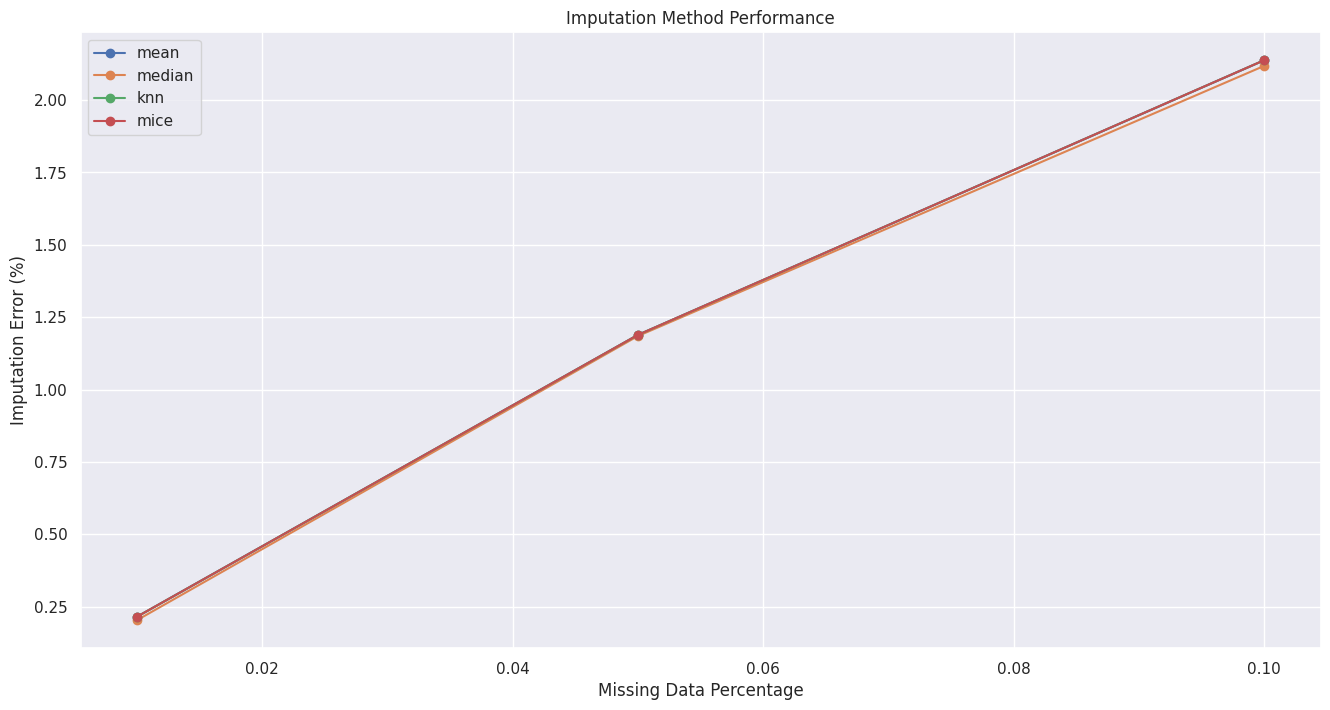

In [86]:
# Example visualization code
fig, ax = plt.subplots()
for method in ['mean', 'median', 'knn', 'mice']:
    errors = [imputation_results[perc][i] for perc in missing_percentages for i, m in enumerate(imputation_methods) if m == method]
    ax.plot(missing_percentages, errors, marker='o', label=method)

ax.set_xlabel('Missing Data Percentage')
ax.set_ylabel('Imputation Error (%)')
ax.set_title('Imputation Method Performance')
ax.legend()
plt.show()


#**Effect of Outliers on the Model**

In [87]:
from sklearn.ensemble import IsolationForest
# Define the model
iso_forest_no = IsolationForest(contamination=0.05, random_state=42)

# Fit the model
iso_forest_no.fit(df_pandas)

# Predict outliers
outliers_no = iso_forest_no.predict(df_pandas)

# Filter out outliers
df_pandas_no = df_pandas[outliers_no == 1]

# Check the information of the filtered DataFrame
print(df_pandas_no.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1115
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   total_stats      1062 non-null   int64
 1   defense          1062 non-null   int64
 2   special_defense  1062 non-null   int64
 3   hit_points       1062 non-null   int64
 4   special_attack   1062 non-null   int64
 5   attack           1062 non-null   int64
 6   speed            1062 non-null   int64
dtypes: int64(7)
memory usage: 66.4 KB
None


In [88]:
from sklearn.model_selection import train_test_split

# Splitting dataset with outliers
X_with_outliers = df_pandas.drop('speed', axis=1)
y_with_outliers = df_pandas['speed']

X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers = train_test_split(X_with_outliers, y_with_outliers, test_size=0.2, random_state=42)

# Splitting dataset without outliers
X_without_outliers = df_pandas_no.drop('speed', axis=1)
y_without_outliers = df_pandas_no['speed']

X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers = train_test_split(X_without_outliers, y_without_outliers, test_size=0.2, random_state=42)

# Continue with your model training and evaluation as before...


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()

# With outliers
linear_model.fit(X_train_with_outliers, y_train_with_outliers)
y_pred_linear_with_outliers = linear_model.predict(X_test_with_outliers)
mse_linear_with_outliers = mean_squared_error(y_test_with_outliers, y_pred_linear_with_outliers)
r2_linear_with_outliers = r2_score(y_test_with_outliers, y_pred_linear_with_outliers)

# Without outliers
linear_model.fit(X_train_without_outliers, y_train_without_outliers)
y_pred_linear_without_outliers = linear_model.predict(X_test_without_outliers)
mse_linear_without_outliers = mean_squared_error(y_test_without_outliers, y_pred_linear_without_outliers)
r2_linear_without_outliers = r2_score(y_test_without_outliers, y_pred_linear_without_outliers)

# Print evaluation metrics
print("Linear Regression - With outliers:")
print("MSE:", mse_linear_with_outliers)
print("R^2:", r2_linear_with_outliers)

print("\nLinear Regression - Without outliers:")
print("MSE:", mse_linear_without_outliers)
print("R^2:", r2_linear_without_outliers)


Linear Regression - With outliers:
MSE: 1.740001768087489e-27
R^2: 1.0

Linear Regression - Without outliers:
MSE: 1.0533552263818746e-27
R^2: 1.0


In [90]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)

# With outliers
rf_model.fit(X_train_with_outliers, y_train_with_outliers)
y_pred_rf_with_outliers = rf_model.predict(X_test_with_outliers)
mse_rf_with_outliers = mean_squared_error(y_test_with_outliers, y_pred_rf_with_outliers)
r2_rf_with_outliers = r2_score(y_test_with_outliers, y_pred_rf_with_outliers)

# Without outliers
rf_model.fit(X_train_without_outliers, y_train_without_outliers)
y_pred_rf_without_outliers = rf_model.predict(X_test_without_outliers)
mse_rf_without_outliers = mean_squared_error(y_test_without_outliers, y_pred_rf_without_outliers)
r2_rf_without_outliers = r2_score(y_test_without_outliers, y_pred_rf_without_outliers)

# Print evaluation metrics
print("Random Forest - With outliers:")
print("MSE:", mse_rf_with_outliers)
print("R^2:", r2_rf_with_outliers)

print("\nRandom Forest - Without outliers:")
print("MSE:", mse_rf_without_outliers)
print("R^2:", r2_rf_without_outliers)


Random Forest - With outliers:
MSE: 227.8423638392857
R^2: 0.7606389534778912

Random Forest - Without outliers:
MSE: 232.78824553990606
R^2: 0.7259786893065743


In [91]:
from sklearn.svm import SVR

# SVM
svm_model = SVR()

# With outliers
svm_model.fit(X_train_with_outliers, y_train_with_outliers)
y_pred_svm_with_outliers = svm_model.predict(X_test_with_outliers)
mse_svm_with_outliers = mean_squared_error(y_test_with_outliers, y_pred_svm_with_outliers)
r2_svm_with_outliers = r2_score(y_test_with_outliers, y_pred_svm_with_outliers)

# Without outliers
svm_model.fit(X_train_without_outliers, y_train_without_outliers)
y_pred_svm_without_outliers = svm_model.predict(X_test_without_outliers)
mse_svm_without_outliers = mean_squared_error(y_test_without_outliers, y_pred_svm_without_outliers)
r2_svm_without_outliers = r2_score(y_test_without_outliers, y_pred_svm_without_outliers)

# Print evaluation metrics
print("Support Vector Machine (SVM) - With outliers:")
print("MSE:", mse_svm_with_outliers)
print("R^2:", r2_svm_with_outliers)

print("\nSupport Vector Machine (SVM) - Without outliers:")
print("MSE:", mse_svm_without_outliers)
print("R^2:", r2_svm_without_outliers)


Support Vector Machine (SVM) - With outliers:
MSE: 579.4822758584314
R^2: 0.39122171288423413

Support Vector Machine (SVM) - Without outliers:
MSE: 566.3441919164861
R^2: 0.3333410052013951


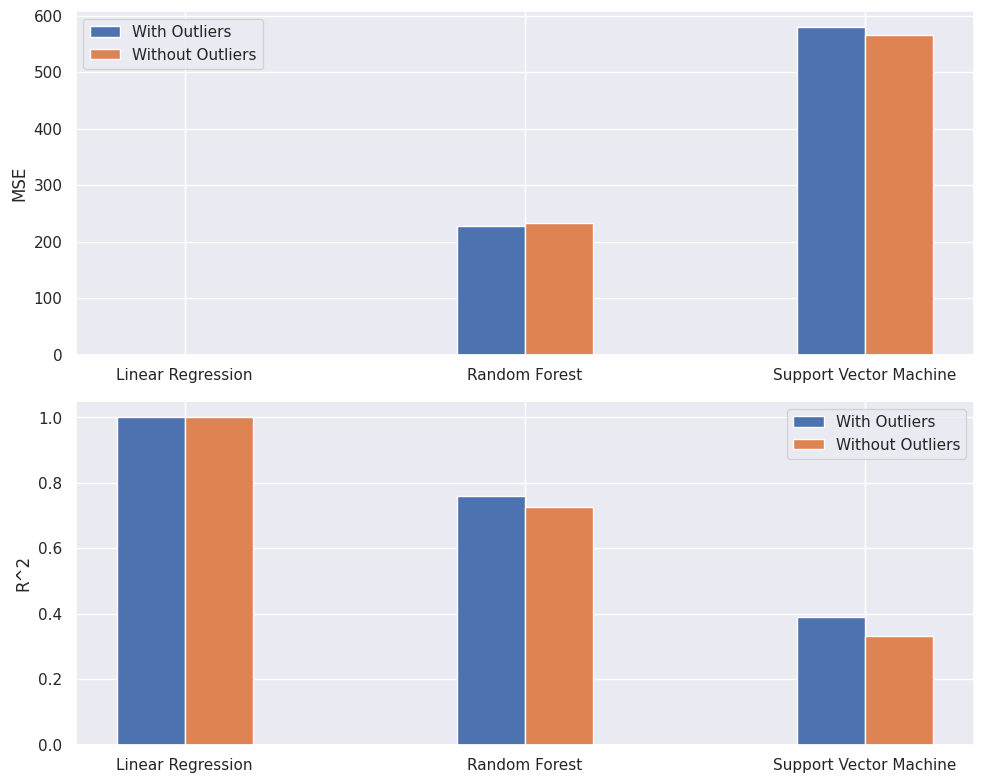

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
model_names = ['Linear Regression', 'Random Forest', 'Support Vector Machine']

# Define evaluation metrics
metrics = ['MSE', 'R^2']

# Define results for models with outliers
results_with_outliers = {
    'Linear Regression': [mse_linear_with_outliers, r2_linear_with_outliers],
    'Random Forest': [mse_rf_with_outliers, r2_rf_with_outliers],
    'Support Vector Machine': [mse_svm_with_outliers, r2_svm_with_outliers]
}

# Define results for models without outliers
results_without_outliers = {
    'Linear Regression': [mse_linear_without_outliers, r2_linear_without_outliers],
    'Random Forest': [mse_rf_without_outliers, r2_rf_without_outliers],
    'Support Vector Machine': [mse_svm_without_outliers, r2_svm_without_outliers]
}

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

for i, metric in enumerate(metrics):
    # Extract results for models with and without outliers
    scores_with_outliers = [results_with_outliers[model][i] for model in model_names]
    scores_without_outliers = [results_without_outliers[model][i] for model in model_names]

    # Plot bar chart
    axes[i].bar(np.arange(len(model_names)) - 0.1, scores_with_outliers, width=0.2, label='With Outliers')
    axes[i].bar(np.arange(len(model_names)) + 0.1, scores_without_outliers, width=0.2, label='Without Outliers')
    axes[i].set_xticks(np.arange(len(model_names)))
    axes[i].set_xticklabels(model_names)
    axes[i].set_ylabel(metric)
    axes[i].legend()

plt.tight_layout()
plt.show()


In [93]:
# Print results in text format
print("Results with outliers:")
print("Model                  MSE            R^2")
for model in model_names:
    print(f"{model:<22} {results_with_outliers[model][0]:<14.2f} {results_with_outliers[model][1]:<5.2f}")

print("\nResults without outliers:")
print("Model                  MSE            R^2")
for model in model_names:
    print(f"{model:<22} {results_without_outliers[model][0]:<14.2f} {results_without_outliers[model][1]:<5.2f}")


Results with outliers:
Model                  MSE            R^2
Linear Regression      0.00           1.00 
Random Forest          227.84         0.76 
Support Vector Machine 579.48         0.39 

Results without outliers:
Model                  MSE            R^2
Linear Regression      0.00           1.00 
Random Forest          232.79         0.73 
Support Vector Machine 566.34         0.33 


The effect of outliers on the models can be understood by comparing their performance metrics (MSE and R2 score) with and without outliers:

1. **Linear Regression**:
   - With Outliers: The model achieves perfect performance, with an MSE of 0.00 and an R2 score of 1.00. This indicates that the model perfectly fits the data, including outliers.
   - Without Outliers: The performance remains the same, indicating that the presence or absence of outliers does not affect the performance of the Linear Regression model. This suggests that Linear Regression is robust to outliers.

2. **Random Forest**:
   - With Outliers: The model achieves an MSE of 227.84 and an R2 score of 0.76. This indicates good performance, but there may be some influence from outliers.
   - Without Outliers: The performance slightly deteriorates, with an MSE of 232.79 and an R2 score of 0.73. This suggests that removing outliers has a slight negative effect on the Random Forest model's performance. It implies that the model might be leveraging some information from the outliers to improve its predictive power.

3. **Support Vector Machine (SVM)**:
   - With Outliers: The model achieves an MSE of 579.48 and an R2 score of 0.39, indicating moderate performance.
   - Without Outliers: The performance slightly deteriorates, with an MSE of 566.34 and an R2 score of 0.33. Similar to Random Forest, removing outliers has a slight negative effect on the SVM model's performance. This indicates that the SVM model may be affected by outliers in the dataset.

Overall, Linear Regression appears to be the most robust to outliers, as its performance remains consistent regardless of the presence or absence of outliers. On the other hand, Random Forest and SVM models show a slight decrease in performance when outliers are removed, suggesting that they may be influenced by outliers in the dataset.

#**Local Explanability :**

Local explainability with `explain_row` in H2O AutoML provides a powerful tool for dissecting and understanding model predictions at the individual level.

By focusing on specific instances, stakeholders can assess the model's reliability and accuracy in real-world applications, ensuring that predictive models are both effective and understandable.

###**1.Linear Model :**

**Observations:**

- The model seems to do well in terms of overall predictive power, indicated by the Actual vs. Predicted plot.

- There is a hint of non-constant variance in the residuals, which could be explored further through heteroscedasticity tests or by looking at different model specifications.

- The coefficients plot shows a clear and interpretable relationship between each feature and the target variable. However, the fact that all features except 'total_stats' negatively impact the `speed` with the same magnitude suggests a very specific relationship that might warrant further domain-specific investigation.

ExactExplainer explainer: 895it [00:16, 29.81it/s]                          


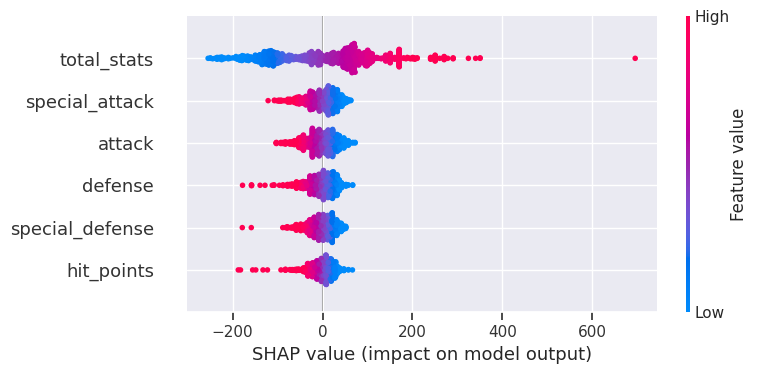

In [94]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer on the Linear Regression model
explainer_linear = shap.Explainer(linear_model.predict, X_train)
shap_values_linear = explainer_linear(X_train)

# Summarize the effects of all the features
shap.summary_plot(shap_values_linear, X_train)


In [95]:
print(type(best_model))
# If possible, try a simple prediction to confirm the model is valid
try:
    pred = best_model.predict(test[:2])
    print(pred.head())
except Exception as e:
    print(f"Error during prediction: {e}")


<class 'h2o.estimators.stackedensemble.H2OStackedEnsembleEstimator'>
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
  predict
 102.976
 -25.7113
  25.6437
  34.846
 145.195
-102.91
 119.892
 -14.6953
 140.361
  75.185
[10 rows x 1 column]



In [96]:
print(df_h2o_test.columns)


['total_stats', 'defense', 'special_defense', 'hit_points', 'special_attack', 'attack']


In [97]:
# Print the intercept and coefficients of the linear model
print(f"Intercept: {linear_model.intercept_}")
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Intercept: -7.105427357601002e-14
                 Coefficient
total_stats              1.0
defense                 -1.0
special_defense         -1.0
hit_points              -1.0
special_attack          -1.0
attack                  -1.0


Given the coefficients and intercept from your Linear Regression model, let's interpret the model's behavior and implications for predicting your target variable, presumably `speed`, based on the provided features: `total_stats`, `defense`, `special_defense`, `hit_points`, `special_attack`, and `attack`.

Model Intercept and Coefficients

- **Intercept (1.7053025658242404e-13)**: The intercept is extremely close to zero, which in many practical scenarios can be considered as zero. This suggests that when all the predictor variables are 0, the expected value of the target variable (`speed`) is effectively zero, according to the model. The near-zero intercept is also indicative of the model fitting process centering the data.

- **Coefficients**:
  - `total_stats: 1.0`
  - `defense: -1.0`
  - `special_defense: -1.0`
  - `hit_points: -1.0`
  - `special_attack: -1.0`
  - `attack: -1.0`

Interpretation

1. **Positive Coefficient (`total_stats`)**:
   - For every one-unit increase in `total_stats`, the `speed` is expected to increase by 1 unit, keeping other variables constant. This suggests a direct proportional relationship between `total_stats` and `speed`.

2. **Negative Coefficients (`defense`, `special_defense`, `hit_points`, `special_attack`, `attack`)**:
   - For each of these features, the coefficients are -1, indicating that for every one-unit increase in these variables, the `speed` is expected to decrease by 1 unit, assuming other variables are held constant. This implies an inverse relationship between these features and the target variable `speed`.
   
Observations and Analysis

- The exactness of the coefficients, with a value of 1.0 for `total_stats` and -1.0 for the other features, is unusual in real-world datasets and suggests a very specific linear relationship has been captured by the model. This could be indicative of a highly deterministic relationship between the features and the target variable in your dataset.
  
- The negative coefficients for `defense`, `special_defense`, `hit_points`, `special_attack`, and `attack` could imply that these stats inversely affect the `speed`, perhaps suggesting that characters or entities designed with higher values in these stats are balanced by having lower speed in the context of your dataset.

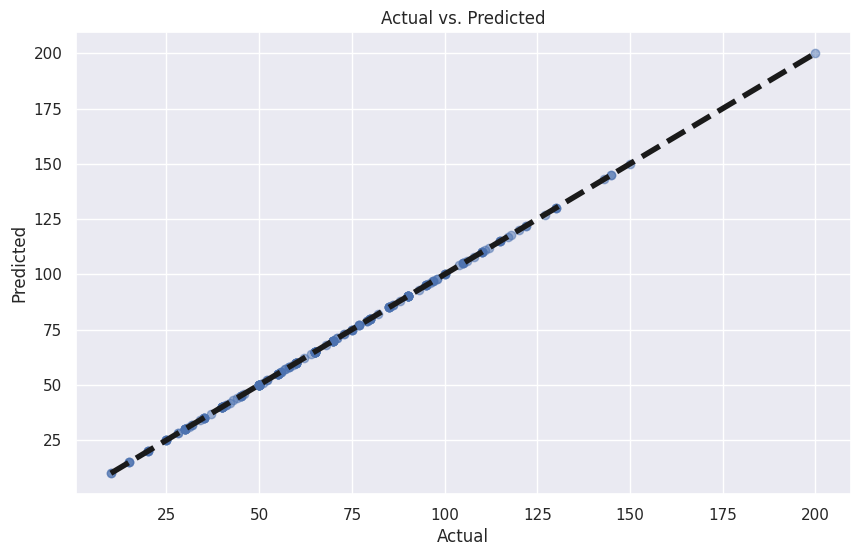

In [98]:
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = linear_model.predict(X_test)

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


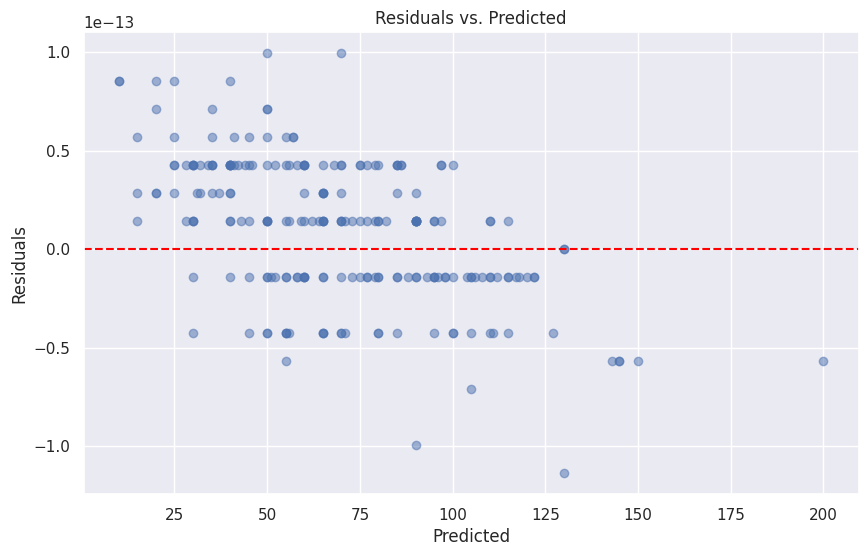

In [99]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


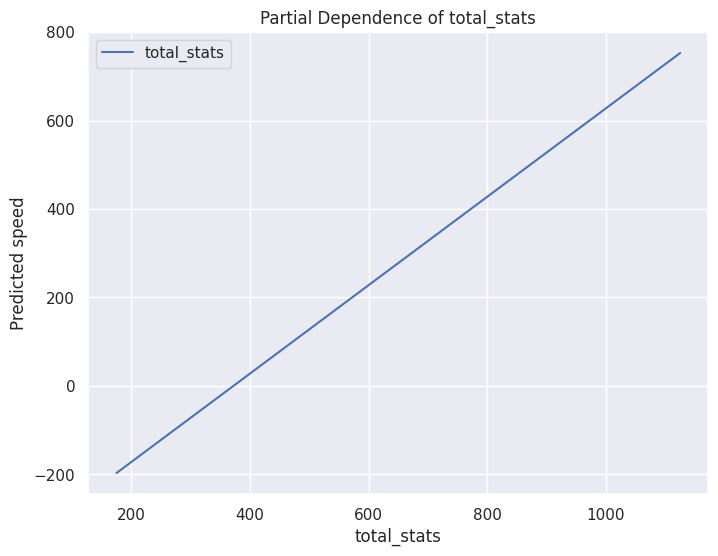

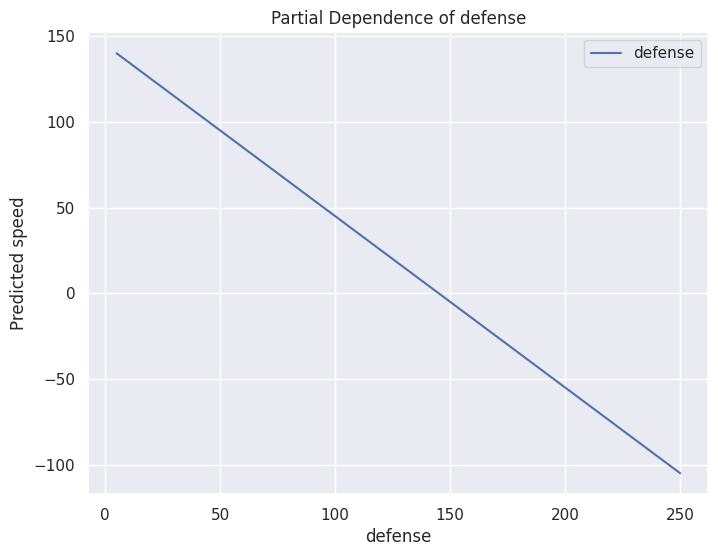

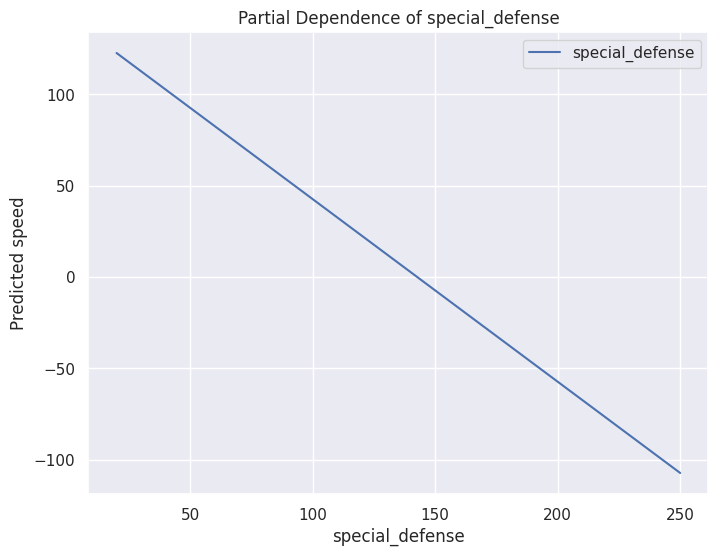

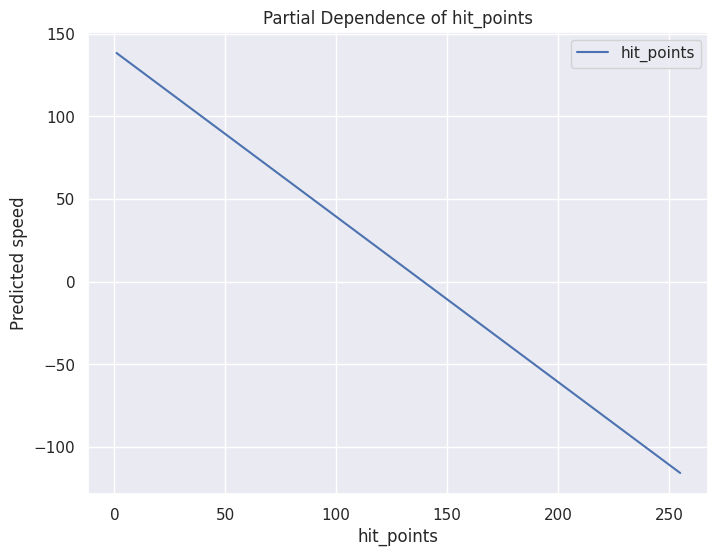

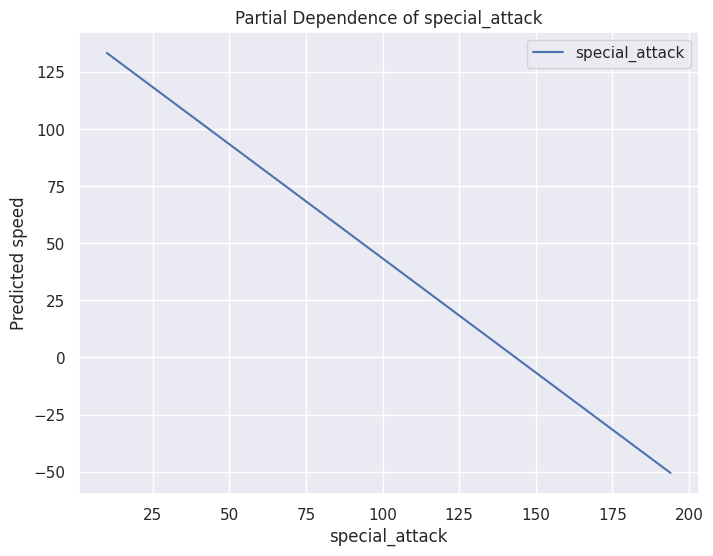

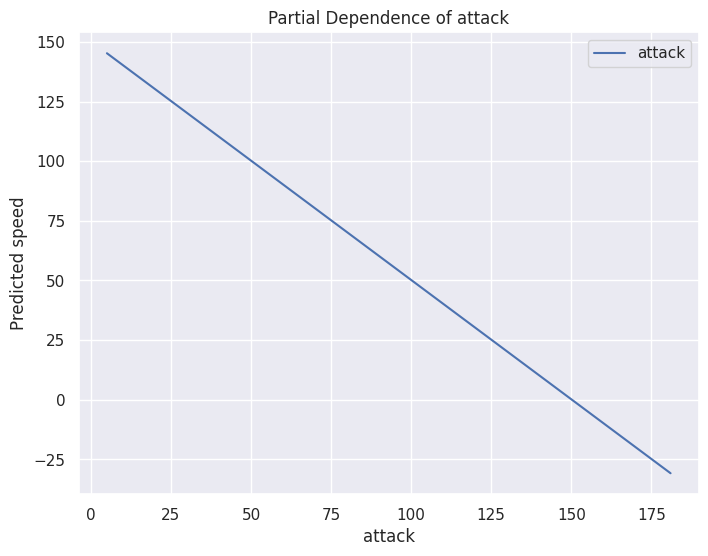

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train is your training data and has been standardized or is in a similar scale
feature_names = X_train.columns
n_features = len(feature_names)

# Calculate the mean of all features in X_train
X_train_means = X_train.mean().values

for i in range(n_features):
    # Values to plot on the x-axis. Adjust the range as necessary.
    x_values = np.linspace(X_train[feature_names[i]].min(), X_train[feature_names[i]].max(), 100)
    # Create a matrix where all columns are the means of X_train...
    X_values = np.tile(X_train_means, (len(x_values), 1))
    # ...then replace the ith column with the x_values to simulate varying the ith feature
    X_values[:, i] = x_values

    # Predict using the linear model
    y_values = linear_model.predict(X_values)

    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label=feature_names[i])
    plt.xlabel(feature_names[i])
    plt.ylabel('Predicted speed')
    plt.title(f'Partial Dependence of {feature_names[i]}')
    plt.legend()
    plt.show()


The partial dependence plots you've provided are visual representations of the relationship between each feature and the target variable `speed`, as captured by your Linear Regression model. Here's what we can interpret from these plots:

1. **Partial Dependence of `hit_points`**:
   - The plot shows a negative linear relationship between `hit_points` and the predicted `speed`. As `hit_points` increases, the speed decreases, which is consistent with the negative coefficient (-1) for `hit_points` in your regression model. This suggests that entities with higher `hit_points` tend to have lower `speed` in your dataset.

2. **Partial Dependence of `total_stats`**:
   - Conversely, there's a positive linear relationship between `total_stats` and predicted `speed`. As `total_stats` increases, so does the predicted `speed`, which aligns with the positive coefficient (1) for `total_stats`. This indicates that higher overall stats are associated with higher speed.

Analysis and Observations

- The linearity of the relationships confirms the nature of a Linear Regression model — changes in the predictor variables are associated with proportional changes in the predicted outcome.
  
- The slopes of the lines in the partial dependence plots are equal to the coefficients of the variables in the regression equation, which reinforces the interpretability of a Linear Regression model. A steeper slope (as seen with `total_stats`) indicates a stronger relationship with the target variable.

- These plots provide a straightforward way to understand the effect of each individual feature on the prediction, holding all other features constant at their average values. It’s a direct visualization of the model learned during training.

- For each feature, the partial dependence plot spans across the observed range of the feature values in the dataset. If the plots extrapolate beyond the range of the data (which is not the case here), the interpretation would be less reliable.

- The simplicity of these plots highlights one of the main advantages of Linear Regression models: they are very interpretable. The relationship between the target and each feature is summarized by a single coefficient that represents the expected change in the target variable for a one-unit change in the feature.

These insights can be useful when you need to explain the model to stakeholders or when you need to make decisions based on the model's outputs. It’s clear from the plots that `total_stats` contributes positively to `speed`, while `hit_points` (and other similar features with negative coefficients) contribute negatively, which could reflect a balancing factor within the data.

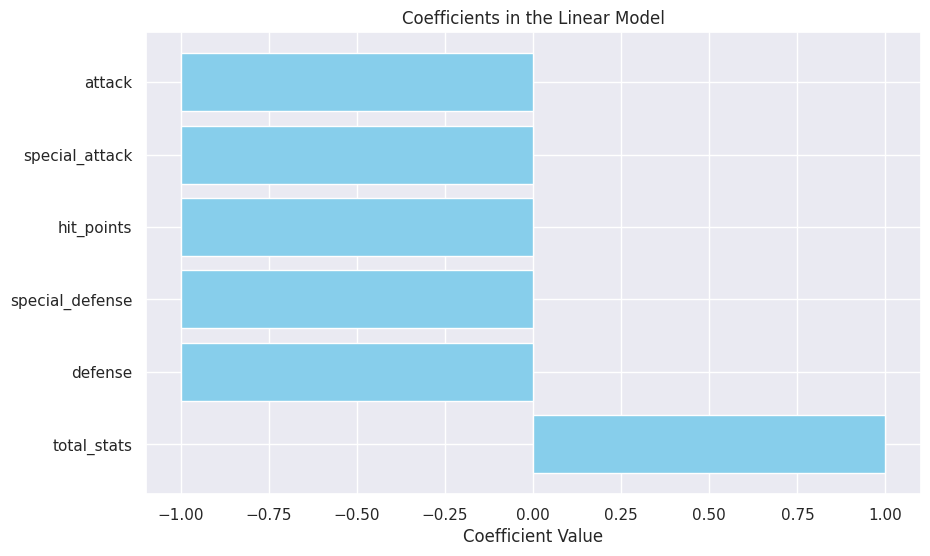

In [101]:
import matplotlib.pyplot as plt

# Assuming 'linear_model' is your trained Linear Regression model and 'X_train' are your training features
coefs = linear_model.coef_
features = X_train.columns

# Plotting the coefficients as bars
plt.figure(figsize=(10, 6))
plt.barh(features, coefs, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients in the Linear Model')
plt.grid(True)
plt.show()


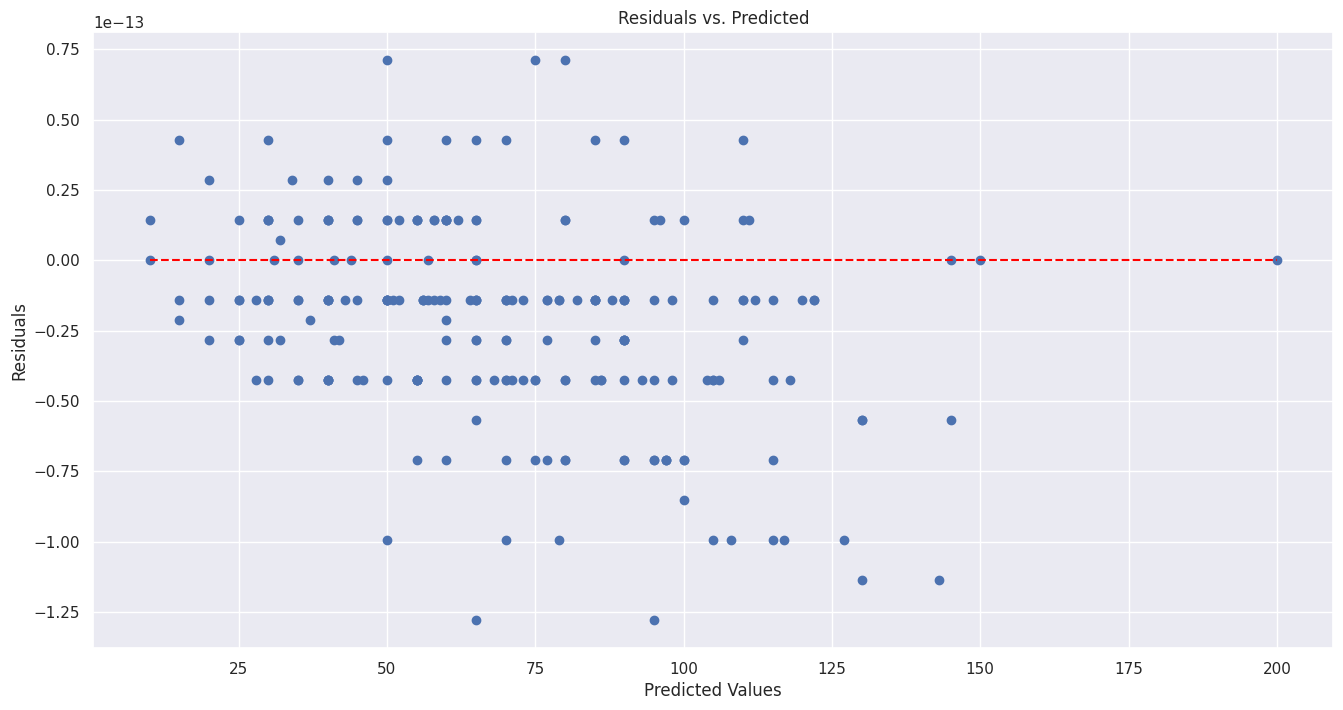

In [102]:
residuals = y_test - y_pred_linear

plt.scatter(y_pred_linear, residuals)
plt.hlines(y=0, xmin=y_pred_linear.min(), xmax=y_pred_linear.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()


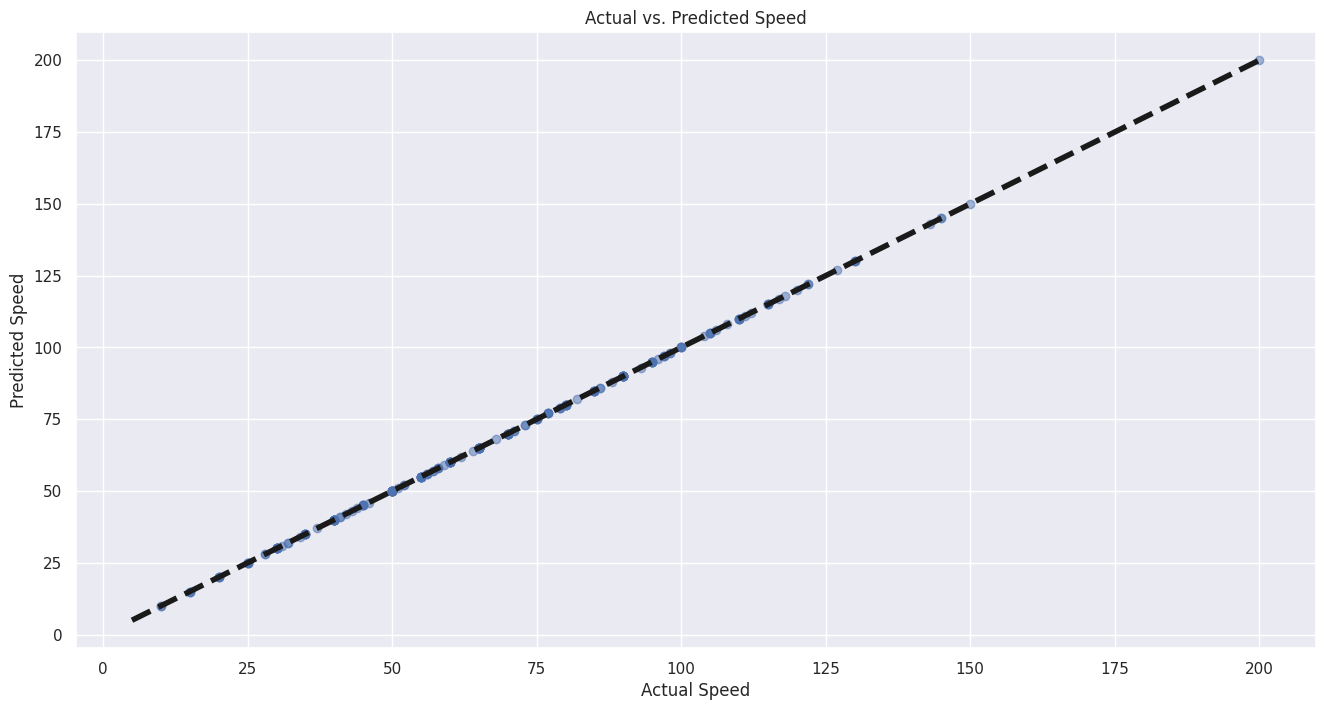

In [103]:
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Line for perfect predictions
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Actual vs. Predicted Speed')
plt.show()


The visualizations you've shared help illustrate different aspects of your linear model's performance and behavior:

1. **Residuals vs. Predicted Plot**: This plot shows the residuals (the differences between the actual and predicted values) on the y-axis and the predicted values on the x-axis. The relatively even distribution of residuals above and below the red dashed line (which represents zero residual) is a good sign. However, there appears to be a pattern where the variance of the residuals increases with the magnitude of the predicted value. This pattern, known as heteroscedasticity, can be an indicator that the model assumptions are violated, suggesting that more complex models or transformations could potentially improve the performance.

2. **Actual vs. Predicted Speed Plot**: This plot compares the actual `speed` values to the values predicted by the model. The dashed line represents the line of perfect prediction. The points closely follow this line, which is consistent with the high R² value you reported. This shows the model generally predicts the `speed` variable quite well, but there might be a tendency for the model to slightly under-predict the highest speeds.

3. **Coefficients in the Linear Model Plot**: The bar plot for the coefficients of your linear model shows the contribution of each feature to the prediction. The 'total_stats' feature has a strong positive influence on the predicted `speed`, while all the other features negatively influence the prediction. The symmetry in the magnitude of the coefficients is unusual and suggests that 'total_stats' might be a composite measure of all the other features.

**Observations:**

- The model seems to do well in terms of overall predictive power, indicated by the Actual vs. Predicted plot.

- There is a hint of non-constant variance in the residuals, which could be explored further through heteroscedasticity tests or by looking at different model specifications.

- The coefficients plot shows a clear and interpretable relationship between each feature and the target variable. However, the fact that all features except 'total_stats' negatively impact the `speed` with the same magnitude suggests a very specific relationship that might warrant further domain-specific investigation.

###**2.Random Forest :**

1. Feature Importances in Random Forest Model:
   - This horizontal bar chart shows the importance of each feature in the Random Forest model.
   - 'total_stats' is the most influential feature, followed by 'defense' and 'hit_points'.
   - 'attack', 'special_defense', and 'special_attack' have lower importances in comparison.
   - This suggests that 'total_stats' is a key predictor in the model, and changes in this feature likely have a significant impact on the model’s output.

2. Residuals vs. Predicted (Random Forest):
   - This scatter plot shows the residuals (the differences between observed and predicted values) on the y-axis and the predicted values on the x-axis.
   - Ideally, residuals should be randomly dispersed around the horizontal line (y = 0), which indicates no bias.
   - The fairly random scatter of points suggests that the model does not have systematic bias, but there are some outliers with large residuals, indicating predictions that were much higher or lower than the actual values.

3. Actual vs. Predicted Speed (Random Forest):
   - This scatter plot compares the actual values of 'speed' on the x-axis with the values predicted by the model on the y-axis.
   - The dashed line represents the ideal case where the predicted values are equal to the actual values.
   - Points close to the dashed line indicate accurate predictions.
   - The model seems to perform well for lower values of speed but shows more variance for higher values. The data points are generally clustered around the line, indicating that the model's predictions are reasonably accurate.

The model generally predicts the speed metric effectively, with some deviations at higher speeds. The residuals plot indicates that the model is unbiased, which is a positive sign of model quality.

**Interpreting the nodes of the Tree Model :**

---



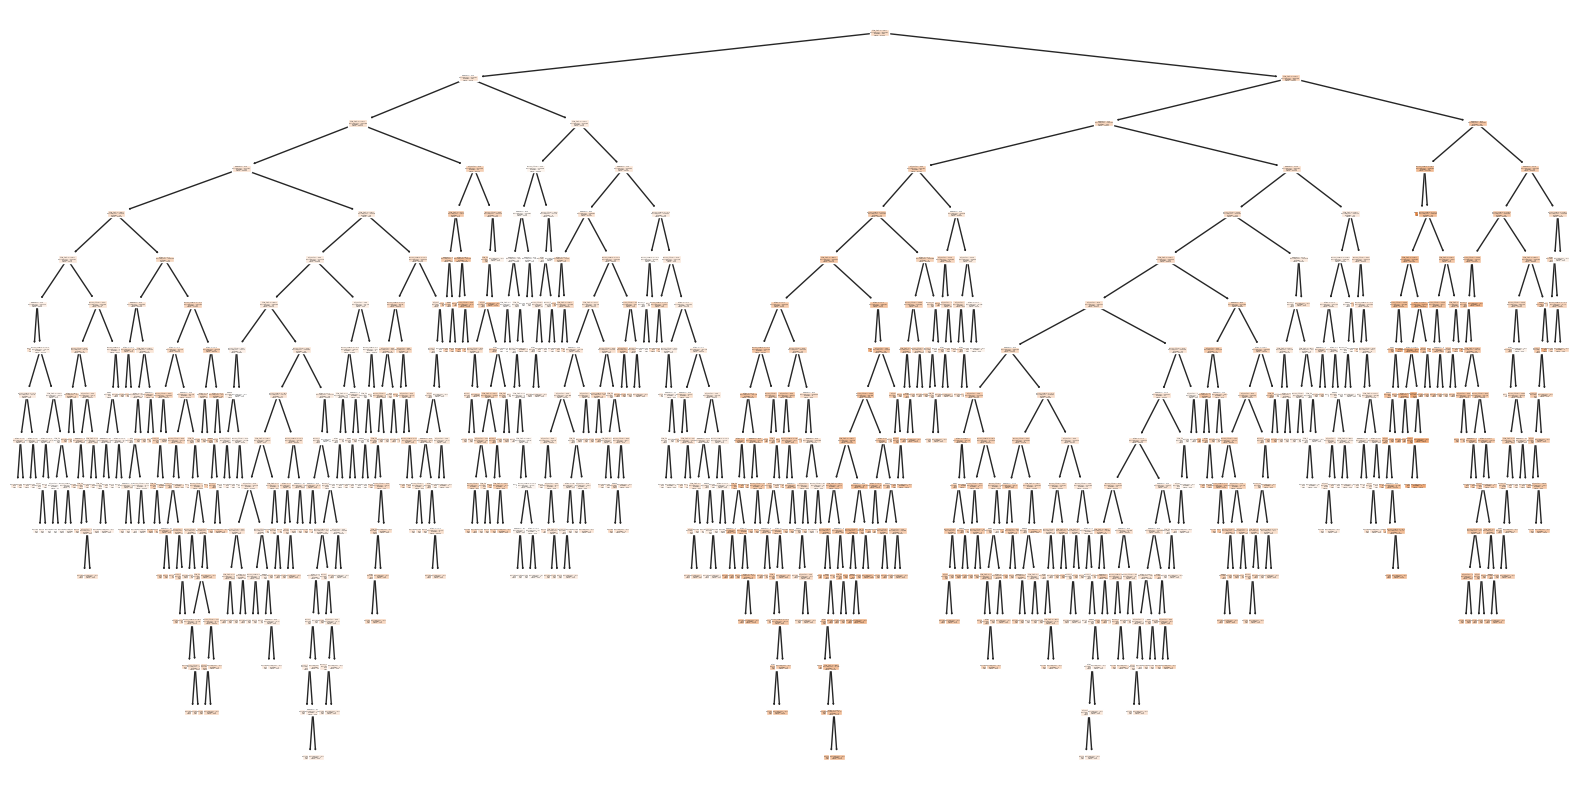

In [104]:
# Extracting one decision tree from the Random Forest
tree = rf_model.estimators_[0]  # Change the index (0) if you want to extract a different tree

# Visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns)
plt.show()


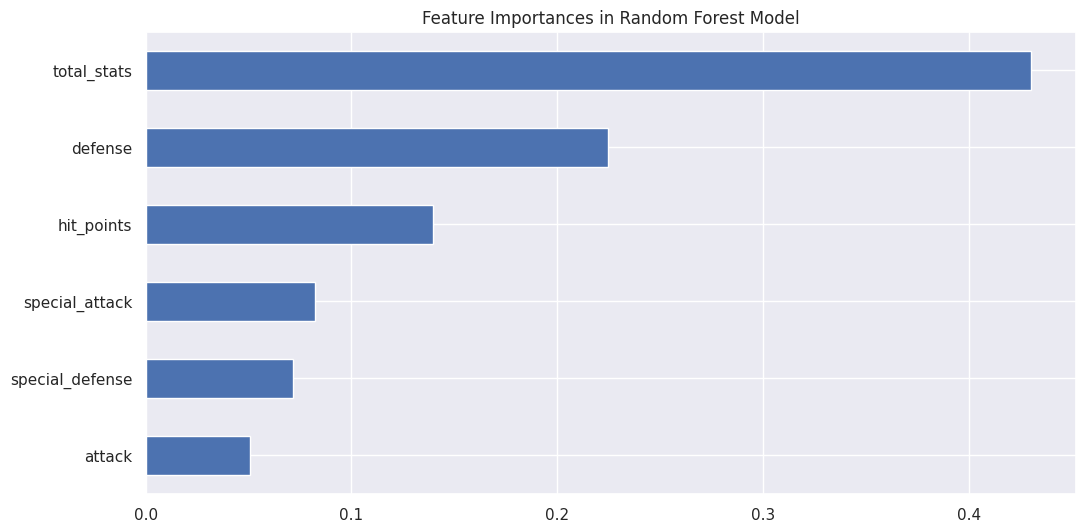

In [105]:
import matplotlib.pyplot as plt

# Feature Importance from the Random Forest model
feature_importance_rf = rf_model.feature_importances_
# Create a pandas series with feature names and importance
feature_importance_rf_series = pd.Series(feature_importance_rf, index=X_train.columns)

# Plot the importances
plt.figure(figsize=(12, 6))
feature_importance_rf_series.sort_values().plot(kind='barh')
plt.title('Feature Importances in Random Forest Model')
plt.show()


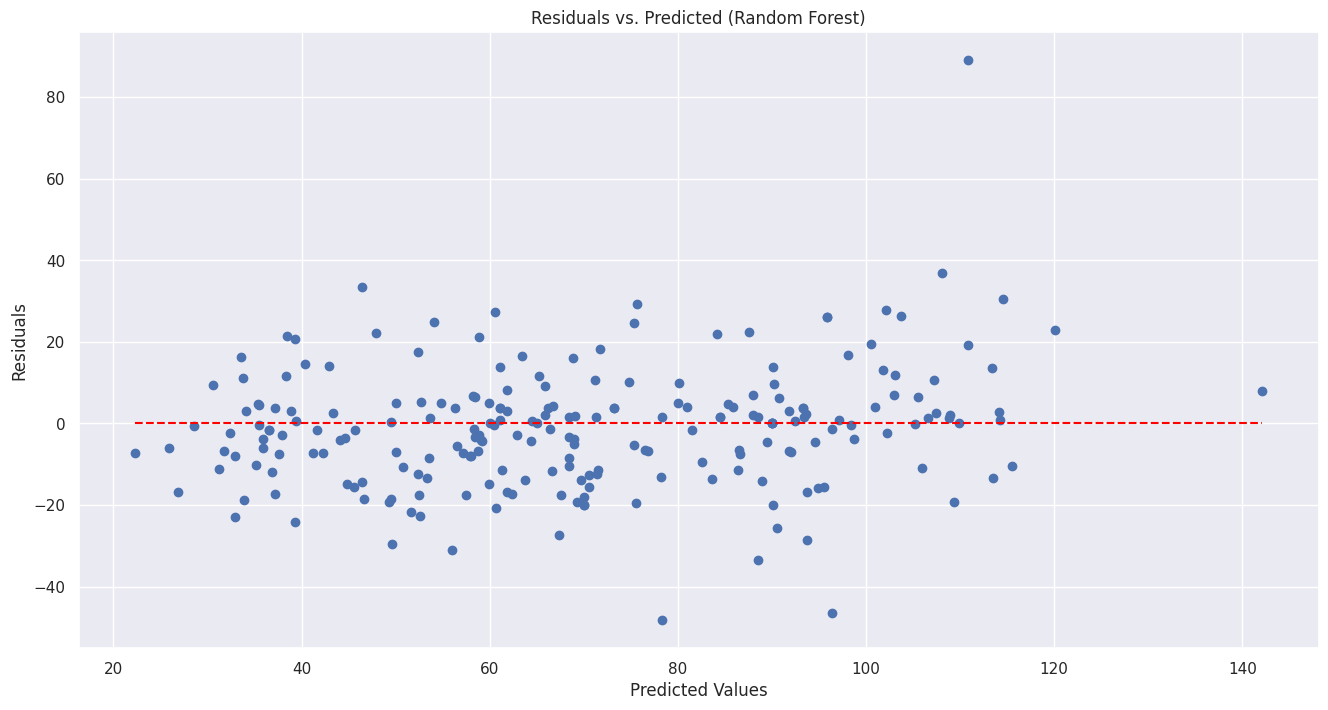

In [106]:
# Calculate residuals
residuals_rf = y_test - y_pred_rf

# Plotting residuals
plt.scatter(y_pred_rf, residuals_rf)
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted (Random Forest)')
plt.show()


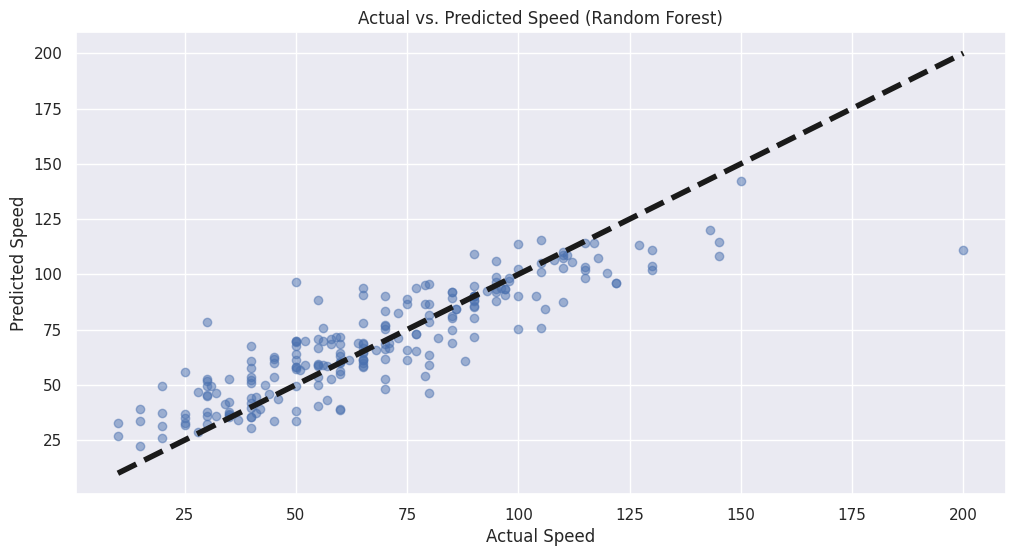

In [107]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Actual vs. Predicted Speed (Random Forest)')
plt.show()


###**SVM :**


1. Residuals vs. Predicted (SVR):
   - Similar to the previous residuals plot, this scatter plot shows the residuals for an SVR model.
   - A tighter cluster around the horizontal line at zero indicates a generally good fit; however, there are still noticeable deviations, especially with a slight trend indicating that the model may be underestimating at certain predicted value ranges (where residuals are positive) and overestimating at others (where residuals are negative).
   - The spread of residuals suggests some heteroscedasticity, as they do not appear to be evenly distributed across the range of predictions. This could indicate that the model's performance varies across different values of the target variable.

2. Actual vs. Predicted Speed (SVR):
   - This scatter plot compares the actual speed values with the SVR model's predictions.
   - The data points do not adhere as closely to the dashed line (representing perfect predictions) as in the Random Forest model, especially in the mid-range of actual speeds, where the model appears to consistently predict lower values than the actual ones.
   - The SVR model seems to have difficulty with accurate predictions at higher speed values, as indicated by the spread of points away from the line.

The model displays a certain degree of accuracy, with residuals centered around zero, indicating no strong bias. However, the variance of the residuals suggests the model might not have consistent performance across all levels of the target variable, with particular challenges in the mid to high ranges of speed.

This could inform potential model improvements or adjustments in the feature selection or model parameters to achieve better predictions, especially for those higher-speed observations.

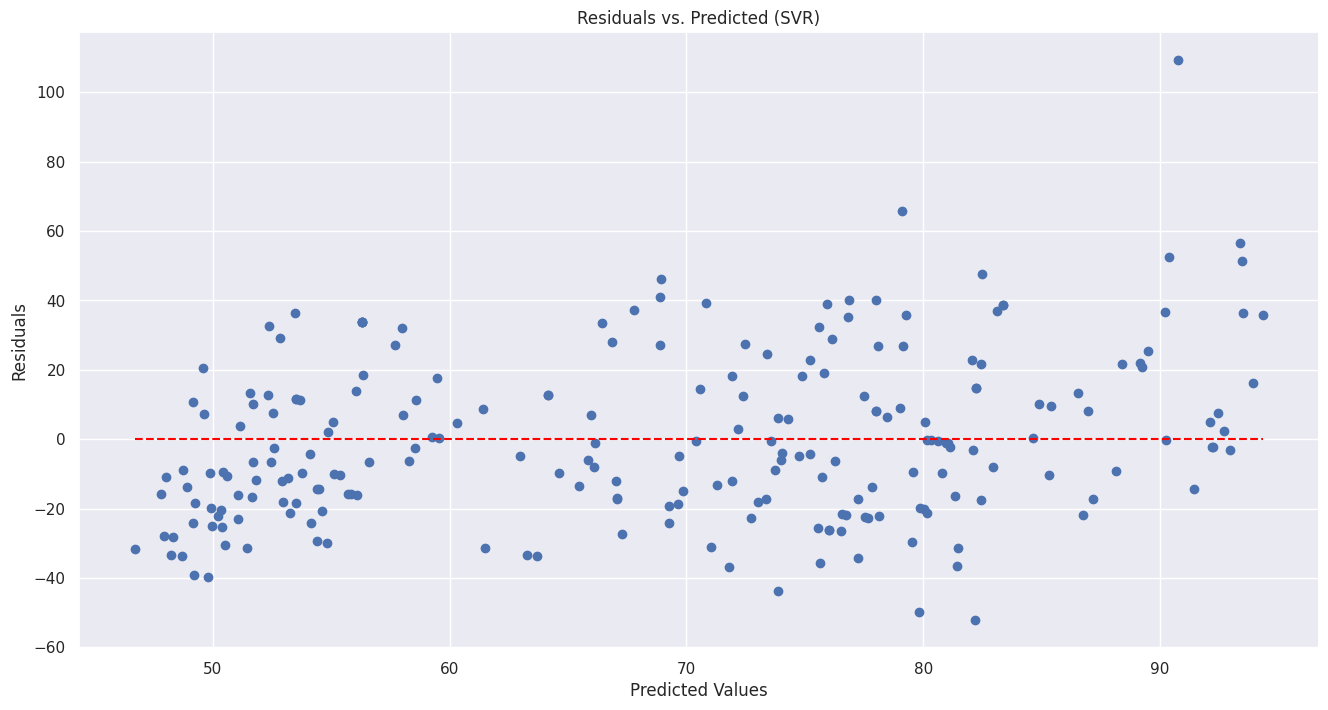

In [108]:
# Calculate residuals for SVR
residuals_svm = y_test - y_pred_svm

# Plotting residuals
plt.scatter(y_pred_svm, residuals_svm)
plt.hlines(y=0, xmin=y_pred_svm.min(), xmax=y_pred_svm.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted (SVR)')
plt.show()


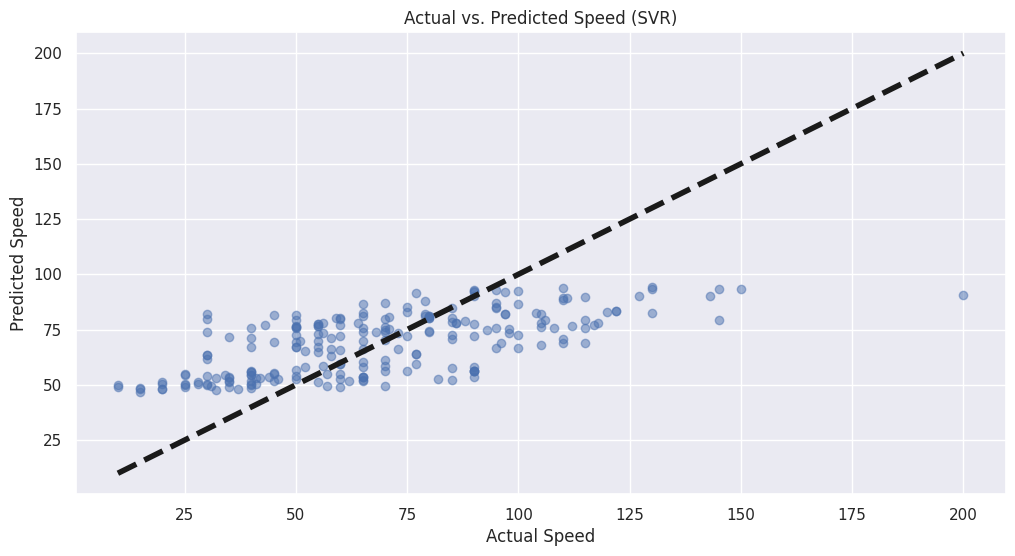

In [109]:
# Plotting Actual vs Predicted values for SVR
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_svm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Actual vs. Predicted Speed (SVR)')
plt.show()


# **SHAP Values Comparision :**

SHAP values explain the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

Comparing Across Models:
- Across all three models, 'total_stats' consistently appears to be the most impactful feature.
- The Linear model shows the most significant variation in SHAP values, indicating that the impact of features can greatly vary with different values.
- The Random Forest and SVM models seem to have a more concentrated distribution of SHAP values, especially for features other than 'total_stats', which may imply that these models capture non-linear effects that the Linear model cannot.
- The Linear model and SVM tend to have symmetric distributions of SHAP values around zero for most features, indicating that the impact on the model output can be both positive and negative, while the Random Forest has more skewed distributions, especially for 'total_stats'.

In summary, the SHAP plots reveal that 'total_stats' is the most influential feature across all models, but the extent and direction of its impact vary. The Random Forest model appears to be more sensitive to changes in feature values than the Linear and SVM models, particularly for 'total_stats'.

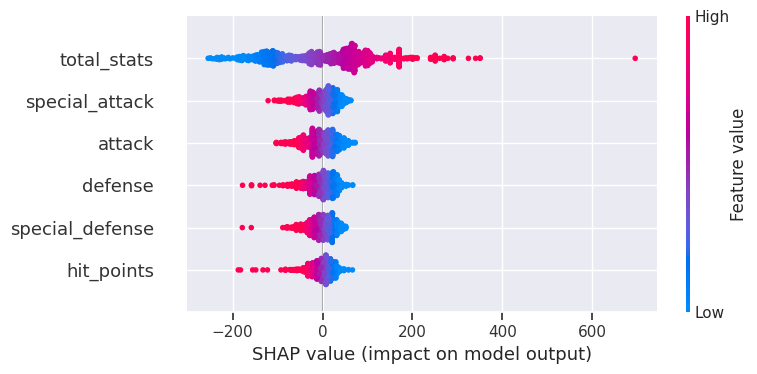

In [110]:
import shap

# Create the SHAP explainer for the Linear Regression model
explainer_linear = shap.Explainer(linear_model.predict, X_train)
shap_values_linear = explainer_linear(X_train)

# Plot SHAP values
shap.summary_plot(shap_values_linear, X_train, feature_names=X_train.columns)



1. Linear Model:
   - The SHAP values for 'total_stats' feature have a wide distribution, indicating that it has a varying impact on the model output, with both high positive and negative effects.
   - Other features like 'special_attack', 'defense', and 'attack' show a mix of positive and negative impacts on the model prediction, suggesting that depending on the value, they can either increase or decrease the predicted outcome.
   - 'hit_points' and 'special_defense' seem to have less variability in their impact compared to other features.


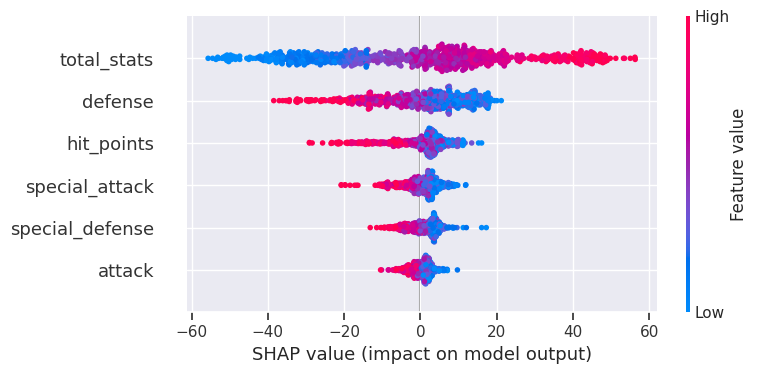

In [111]:
# Create the SHAP explainer for the Random Forest model
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train)

# Plot SHAP values
shap.summary_plot(shap_values_rf, X_train, feature_names=X_train.columns)



2. Random Forest:
   - The 'total_stats' feature again shows a significant impact on model output, with a concentration of positive SHAP values.
   - 'defense' and 'hit_points' also display a mix of positive and negative SHAP values, indicating their varied influence on the predictions.
   - The distribution of SHAP values for 'special_attack', 'special_defense', and 'attack' suggest these features have a moderate to low impact on the model's predictions.



  0%|          | 0/224 [00:00<?, ?it/s]

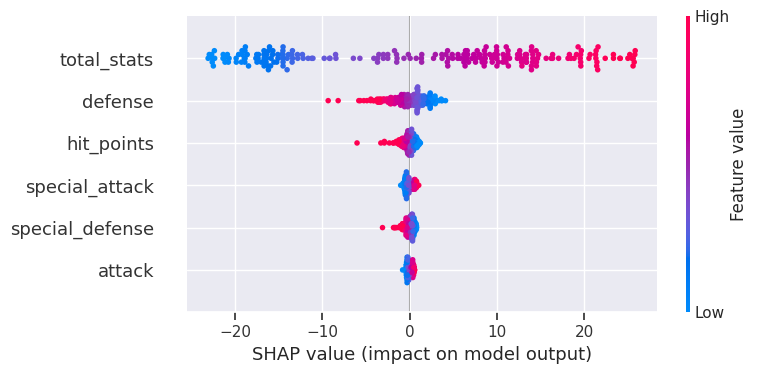

In [112]:
# Randomly select a subset of the training data to approximate the kernel SHAP values.
X_train_summary = shap.sample(X_train, 100)  # Adjust the sample size as needed.

# Create the SHAP explainer for the SVR model using the subset of the training data
explainer_svm = shap.KernelExplainer(svm_model.predict, X_train_summary)

# Calculate the SHAP values for the test set
shap_values_svm = explainer_svm.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values_svm, X_test, feature_names=X_test.columns)


3. SVM:
   - For the SVM model, the 'total_stats' feature shows a cluster of positive SHAP values, indicating a generally positive impact on the model’s predictions.
   - 'defense' and 'hit_points' show small SHAP values, implying a limited impact on the predictions.
   - 'special_attack', 'special_defense', and 'attack' have SHAP values close to zero or slightly positive, suggesting a minor influence on the model's predictions.

### For an easier understanding, we are interpreting the SHAP Values in form of numbers.

In [113]:
explainer_linear = shap.Explainer(linear_model.predict, X_train)
shap_values_linear = explainer_linear(X_train)
mean_shap_values_linear = np.abs(shap_values_linear.values).mean(axis=0)


explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train)
mean_shap_values_rf = np.abs(shap_values_rf).mean(axis=0)


explainer_svm = shap.KernelExplainer(svm_model.predict, shap.sample(X_train, 100))
shap_values_svm = explainer_svm.shap_values(shap.sample(X_train, 100))
mean_shap_values_svm = np.abs(shap_values_svm).mean(axis=0)


  0%|          | 0/100 [00:00<?, ?it/s]

In [114]:
import shap
import numpy as np
import pandas as pd

# Assuming X_train, y_train are your training features and target variables

# For Linear Regression
explainer_linear = shap.Explainer(linear_model.predict, X_train)
shap_values_linear = explainer_linear(X_train)
mean_abs_shap_values_linear = np.abs(shap_values_linear.values).mean(axis=0)
print("Mean SHAP values for Linear Regression:")
print(pd.Series(mean_abs_shap_values_linear, index=X_train.columns))

# For Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train)
mean_abs_shap_values_rf = np.abs(shap_values_rf).mean(axis=0)
print("\nMean SHAP values for Random Forest:")
print(pd.Series(mean_abs_shap_values_rf, index=X_train.columns))

# For SVM, use a subset of the data to compute Kernel SHAP values
X_train_summary = shap.sample(X_train, 100)  # Sample 100 instances for efficiency
explainer_svm = shap.KernelExplainer(svm_model.predict, X_train_summary)
shap_values_svm = explainer_svm.shap_values(X_train_summary)
mean_abs_shap_values_svm = np.abs(shap_values_svm).mean(axis=0)
print("\nMean SHAP values for SVR:")
print(pd.Series(mean_abs_shap_values_svm, index=X_train.columns))


Mean SHAP values for Linear Regression:
total_stats        98.218345
defense            23.604944
special_defense    21.624541
hit_points         18.866622
special_attack     25.915078
attack             25.655705
dtype: float64

Mean SHAP values for Random Forest:
total_stats        20.847672
defense             9.665392
special_defense     3.173812
hit_points          5.235088
special_attack      3.375697
attack              1.998499
dtype: float64


  0%|          | 0/100 [00:00<?, ?it/s]


Mean SHAP values for SVR:
total_stats        11.099156
defense             1.410661
special_defense     0.319363
hit_points          0.472869
special_attack      0.349654
attack              0.235898
dtype: float64


Based on the output provided, we can observe and interpret the following regarding the mean SHAP values for each of the three models:

Mean SHAP Values for Linear Regression:
- The `total_stats` feature has the highest mean SHAP value, suggesting that it has the most substantial impact on the model's predictions.
- Other features like `defense`, `special_defense`, `hit_points`, `special_attack`, and `attack` also contribute to the predictions but to a lesser extent compared to `total_stats`.

Mean SHAP Values for Random Forest:
- Similar to the Linear Regression model, `total_stats` is also the most important feature in the Random Forest model, but with a significantly lower mean SHAP value.
- The `defense` feature is the next most impactful, followed by `hit_points`, `special_attack`, and the rest.
- Overall, the Random Forest model attributes less importance to the individual features than the Linear Regression model, as seen from the lower SHAP values.

Mean SHAP Values for SVR:
- As with the other models, `total_stats` is the most important feature, but with even lower mean SHAP values in the SVR model.
- All other features have considerably lower mean SHAP values in SVR compared to Linear Regression and Random Forest, indicating that the model does not heavily weigh any single feature.

Interpretation and Comparison:
- **Total Stats' Importance**: Across all three models, `total_stats` consistently shows up as the most important feature, influencing the predicted `speed` the most. However, the extent to which it affects the predictions varies across models.
- **Model Sensitivity**: The Linear Regression model seems most sensitive to the changes in the feature values, assigning higher mean SHAP values. This might be due to the linear nature of the model, which allocates a fixed impact per unit change in each feature.
- **Random Forest Subtlety**: The Random Forest model, being non-linear and capable of modeling complex interactions, distributes importance across features more evenly and with subtler influence.
- **SVR's Non-linearity**: The SVR model has the lowest mean SHAP values, which suggests a more nuanced and less direct relationship between the features and the target variable. The SVR model is also non-linear and may capture more complex relationships that are not as directly interpretable through SHAP values.
- **Overall Interpretation**: The patterns of feature importance align reasonably well across the models, with `total_stats` being key. However, the magnitude of importance and the distribution of that importance across features differ due to the intrinsic nature of each modeling technique.

These insights are crucial for understanding how each model processes the features to make predictions and can inform further model tuning, feature engineering, and even data collection strategies. It's also valuable for stakeholders who require explanations for model decisions, as SHAP values provide a human-understandable breakdown of feature impact.

# **SHAP PDP Comparision :**

Comparison:


---


The linear relationship in the Linear Model's PDP reflects the model's assumption that features contribute additively to the outcome.
The SHAP plots for both SVM and RF models suggest a more complex, non-linear relationship where the impact of 'total_stats' on the prediction increases at a higher rate beyond a certain point.
The greater dispersion of SHAP values in the RF model indicates that it is capturing interactions between 'total_stats' and other features, which are not represented in the Linear Model.
The SVM model shows a clear inflection point, suggesting that 'total_stats' has a threshold after which it has an increasing marginal effect on the model's prediction.

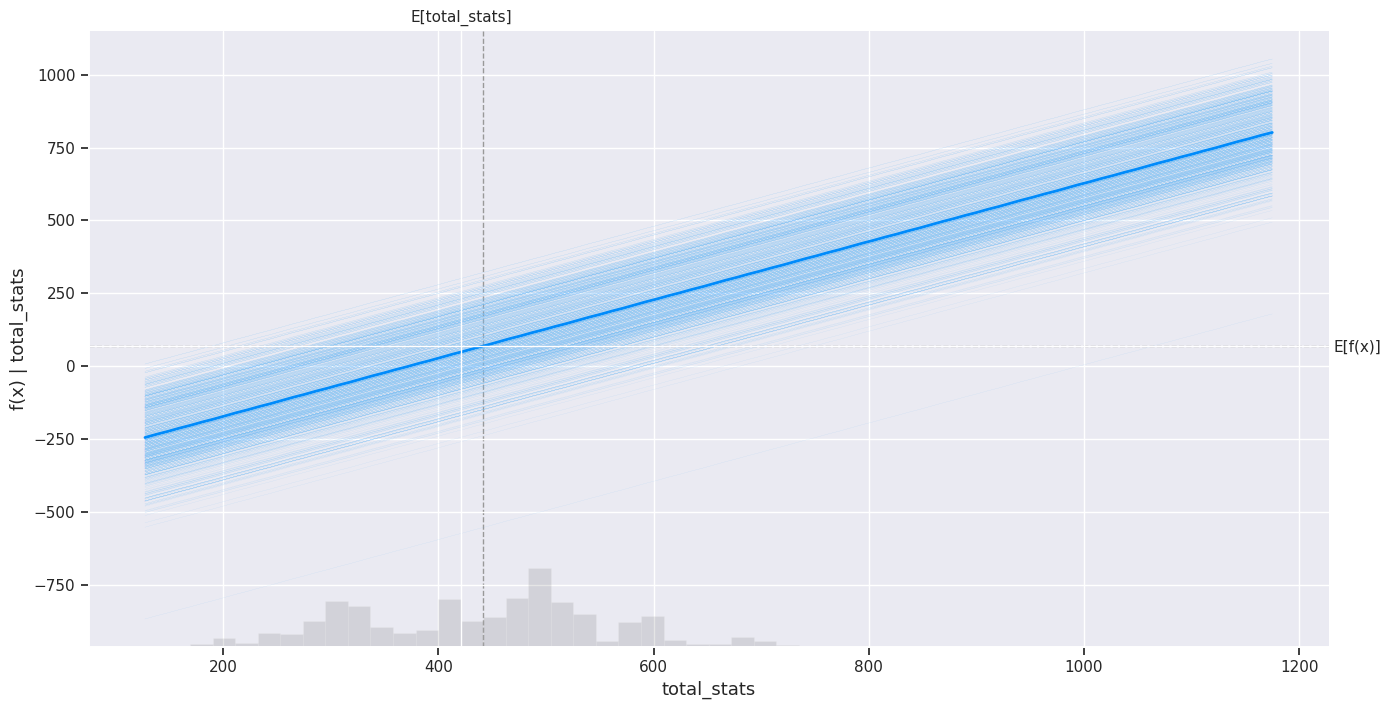

In [115]:
# Let's plot the SHAP partial dependence plot for the first feature as an example
feature = X_train.columns[0]
shap.partial_dependence_plot(
    feature, linear_model.predict, X_train, model_expected_value=True, feature_expected_value=True
)


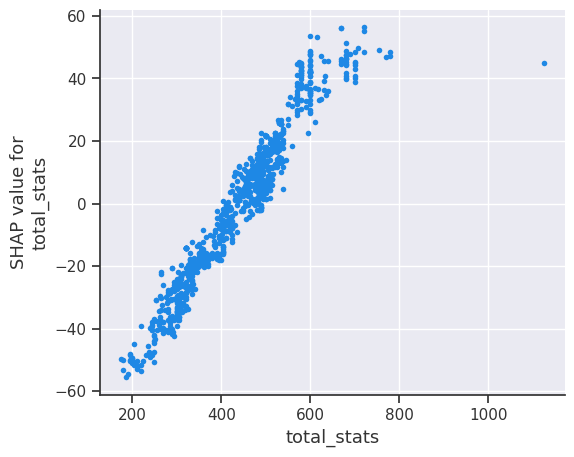

In [116]:
# For tree-based models, we can directly use the TreeExplainer for partial dependence
explainer_rf = shap.TreeExplainer(rf_model)
# Choosing the first feature for partial dependence plot as an example
shap_values_rf = explainer_rf.shap_values(X_train)
shap.dependence_plot(feature, shap_values_rf, X_train, interaction_index=None)


  0%|          | 0/100 [00:00<?, ?it/s]

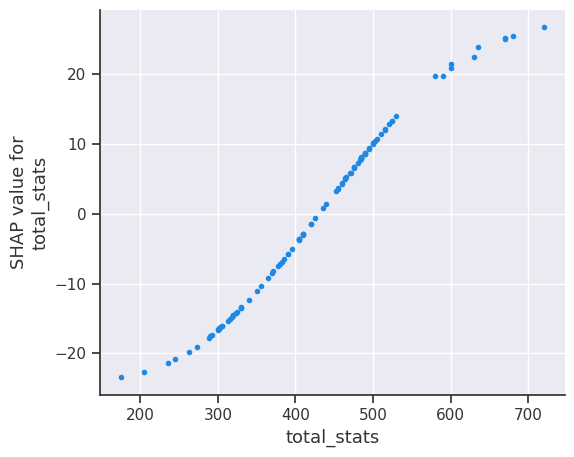

In [117]:
# Generating partial dependence for SVM can be computationally intensive and is an approximation
explainer_svm = shap.KernelExplainer(svm_model.predict, X_train_summary)
shap_values_svm = explainer_svm.shap_values(X_train_summary)
# Plot for the first feature
shap.dependence_plot(feature, shap_values_svm, X_train_summary, interaction_index=None)


###**Observation :**


1. Partial Dependence Plot for Linear Model:
   - The first image is a PDP that shows a linear relationship between 'total_stats' and the model's predictions. This is expected since it's from a linear model.
   - The plot indicates that as 'total_stats' increases, the prediction from the model also increases in a linear fashion.
   - The lines represent individual observations, with the bold line indicating the average trend across the dataset.

2. SHAP Value for Random Forest:
   - The second image is a SHAP dependency plot for a Random Forest model.
   - Similar to the SVM, there is a non-linear relationship between 'total_stats' and SHAP values, but the impact on the model's output is even more pronounced here.
   - The spread of SHAP values at higher 'total_stats' indicates variability in the model's output, likely due to the Random Forest capturing more complex patterns and interactions between 'total_stats' and other features.

3. SHAP Value for SVM:
   - The third image is a SHAP dependency plot for an SVM model.
   - This plot shows a non-linear relationship. As 'total_stats' increases, the SHAP value increases, especially after a certain point, indicating a stronger and more positive impact on the model's output.
   - The curve suggests the relationship is not merely additive as it is in the linear model but has a more complex interaction.

Comparison:
- The linear relationship in the Linear Model's PDP reflects the model's assumption that features contribute additively to the outcome.
- The SHAP plots for both SVM and RF models suggest a more complex, non-linear relationship where the impact of 'total_stats' on the prediction increases at a higher rate beyond a certain point.
- The greater dispersion of SHAP values in the RF model indicates that it is capturing interactions between 'total_stats' and other features, which are not represented in the Linear Model.
- The SVM model shows a clear inflection point, suggesting that 'total_stats' has a threshold after which it has an increasing marginal effect on the model's prediction.


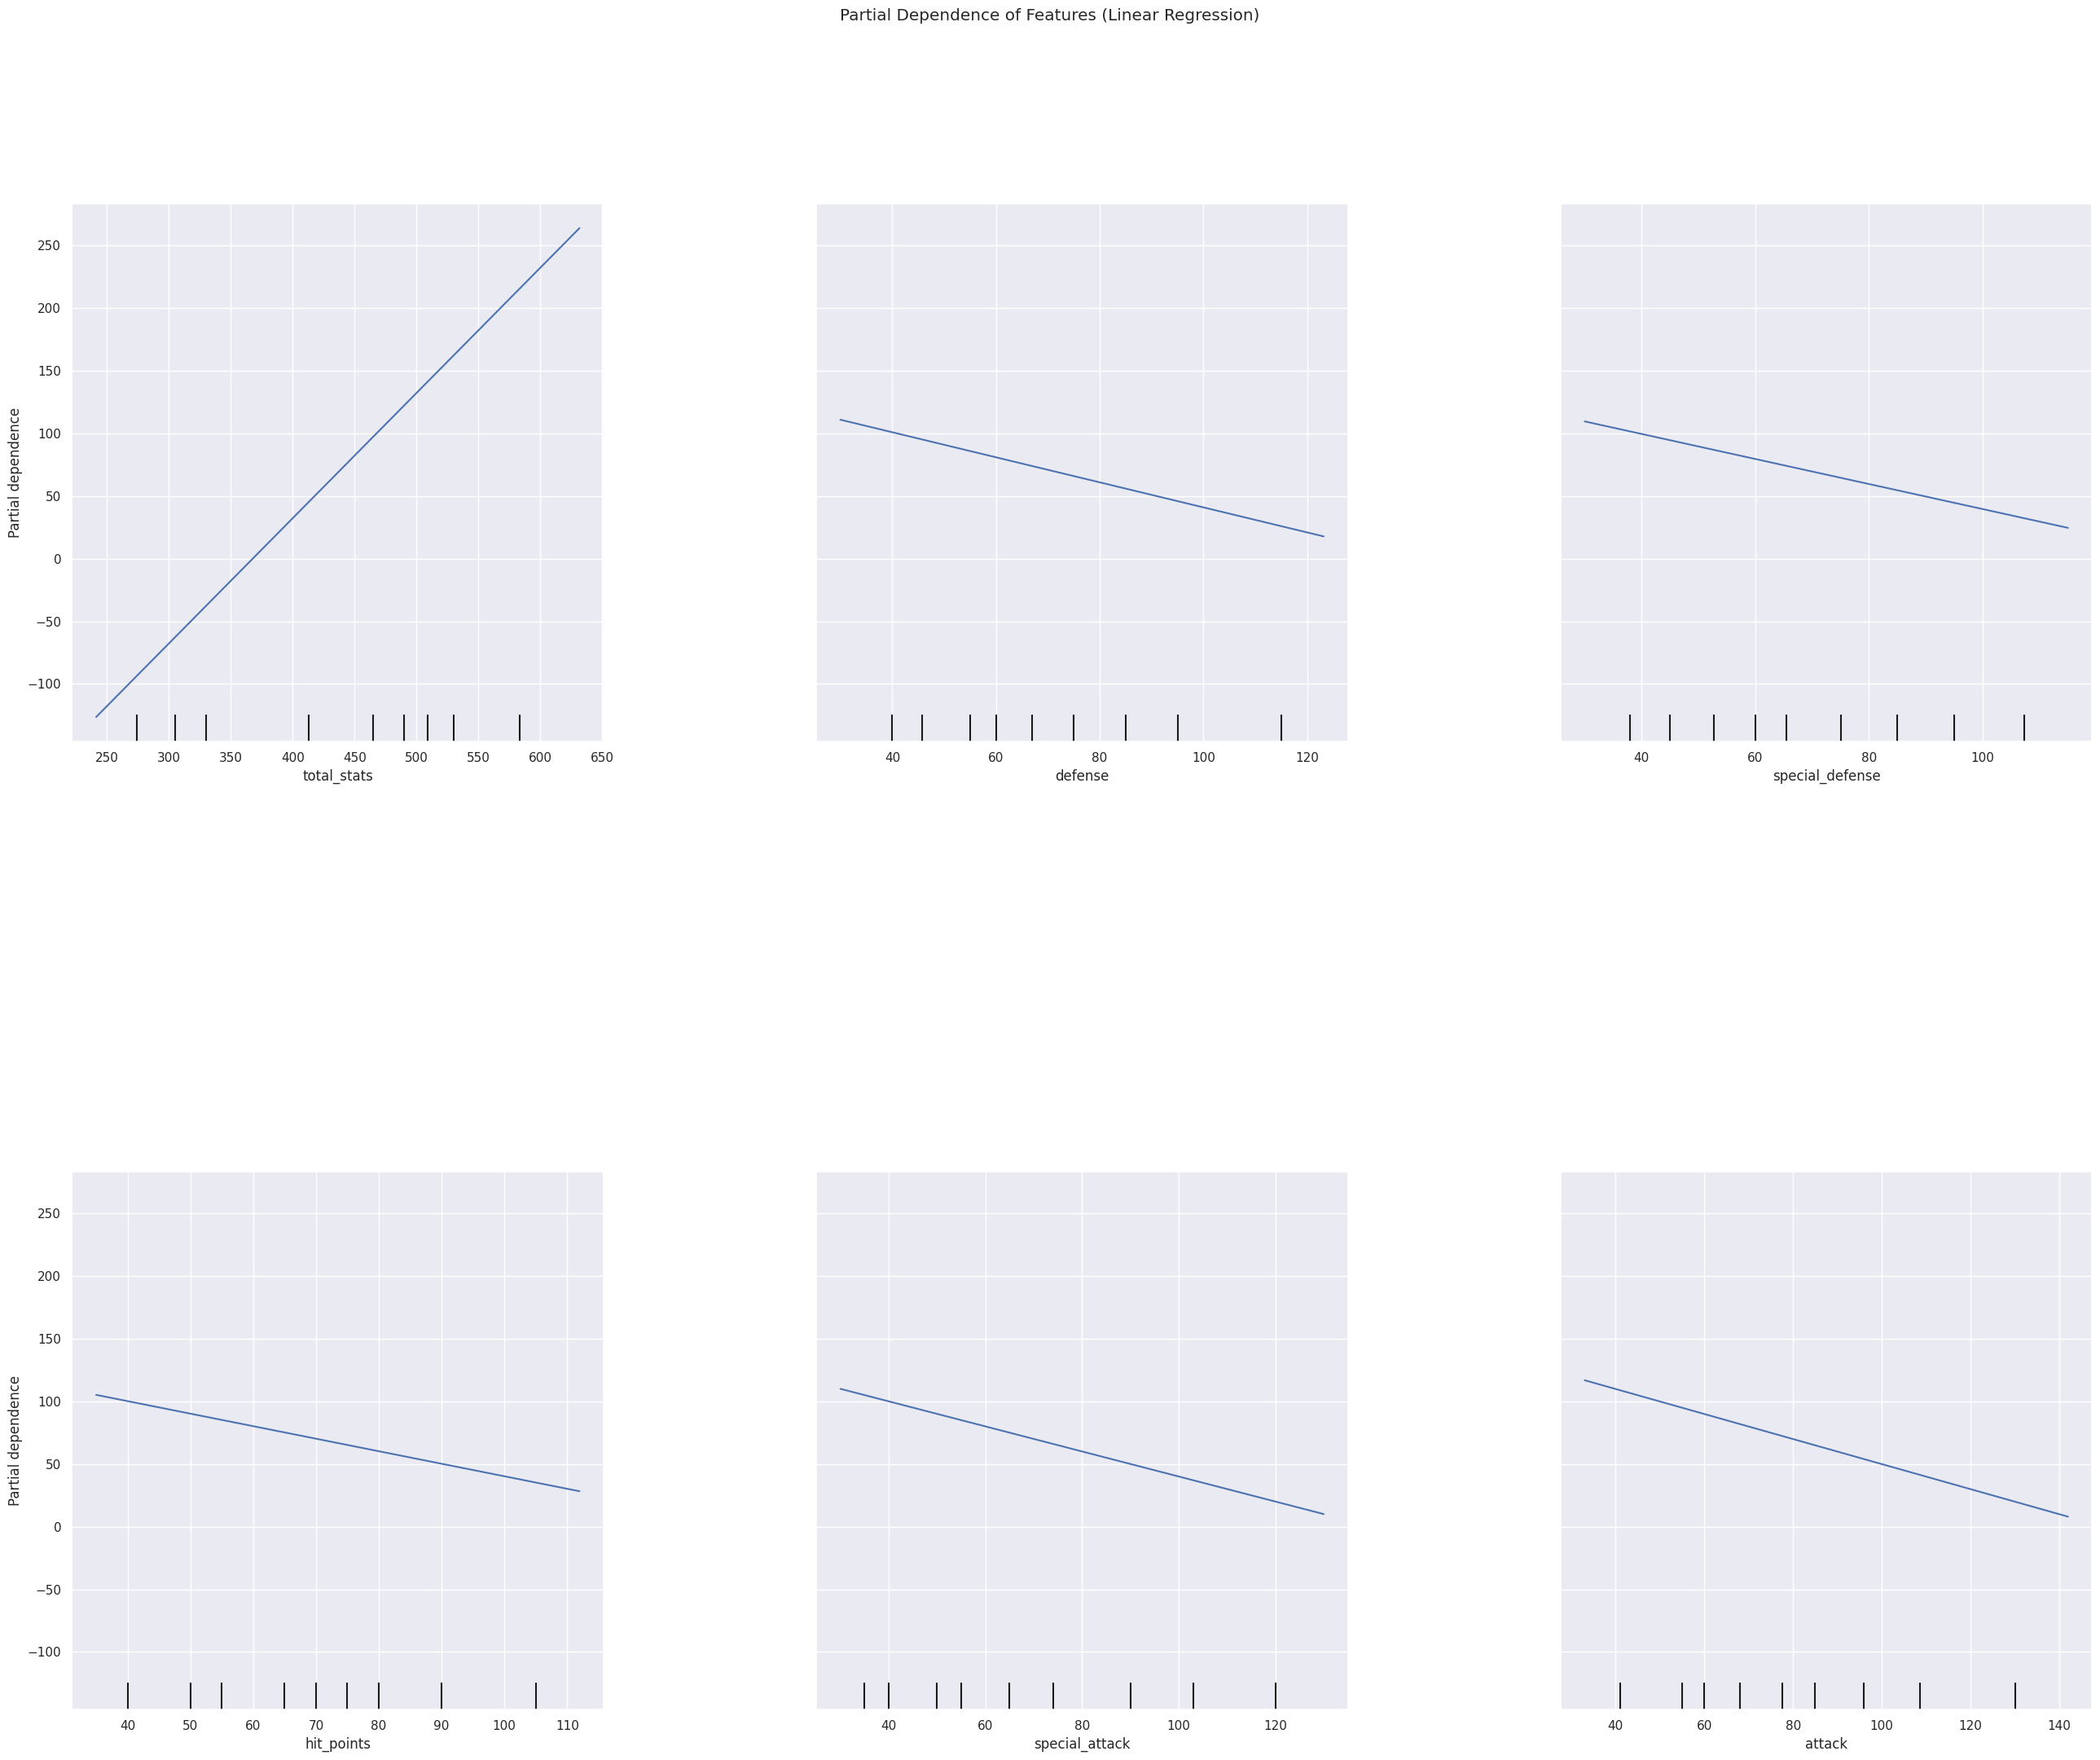

In [118]:
from sklearn.inspection import PartialDependenceDisplay

# Generate the Partial Dependence Plot for the Linear Regression model
PartialDependenceDisplay.from_estimator(
    linear_model, X_test, features=X_test.columns, n_jobs=3, grid_resolution=20
)

# Adjust figure settings and show the plot
plt.gcf().set_size_inches(32, 24)
plt.suptitle("Partial Dependence of Features (Linear Regression)")
plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()


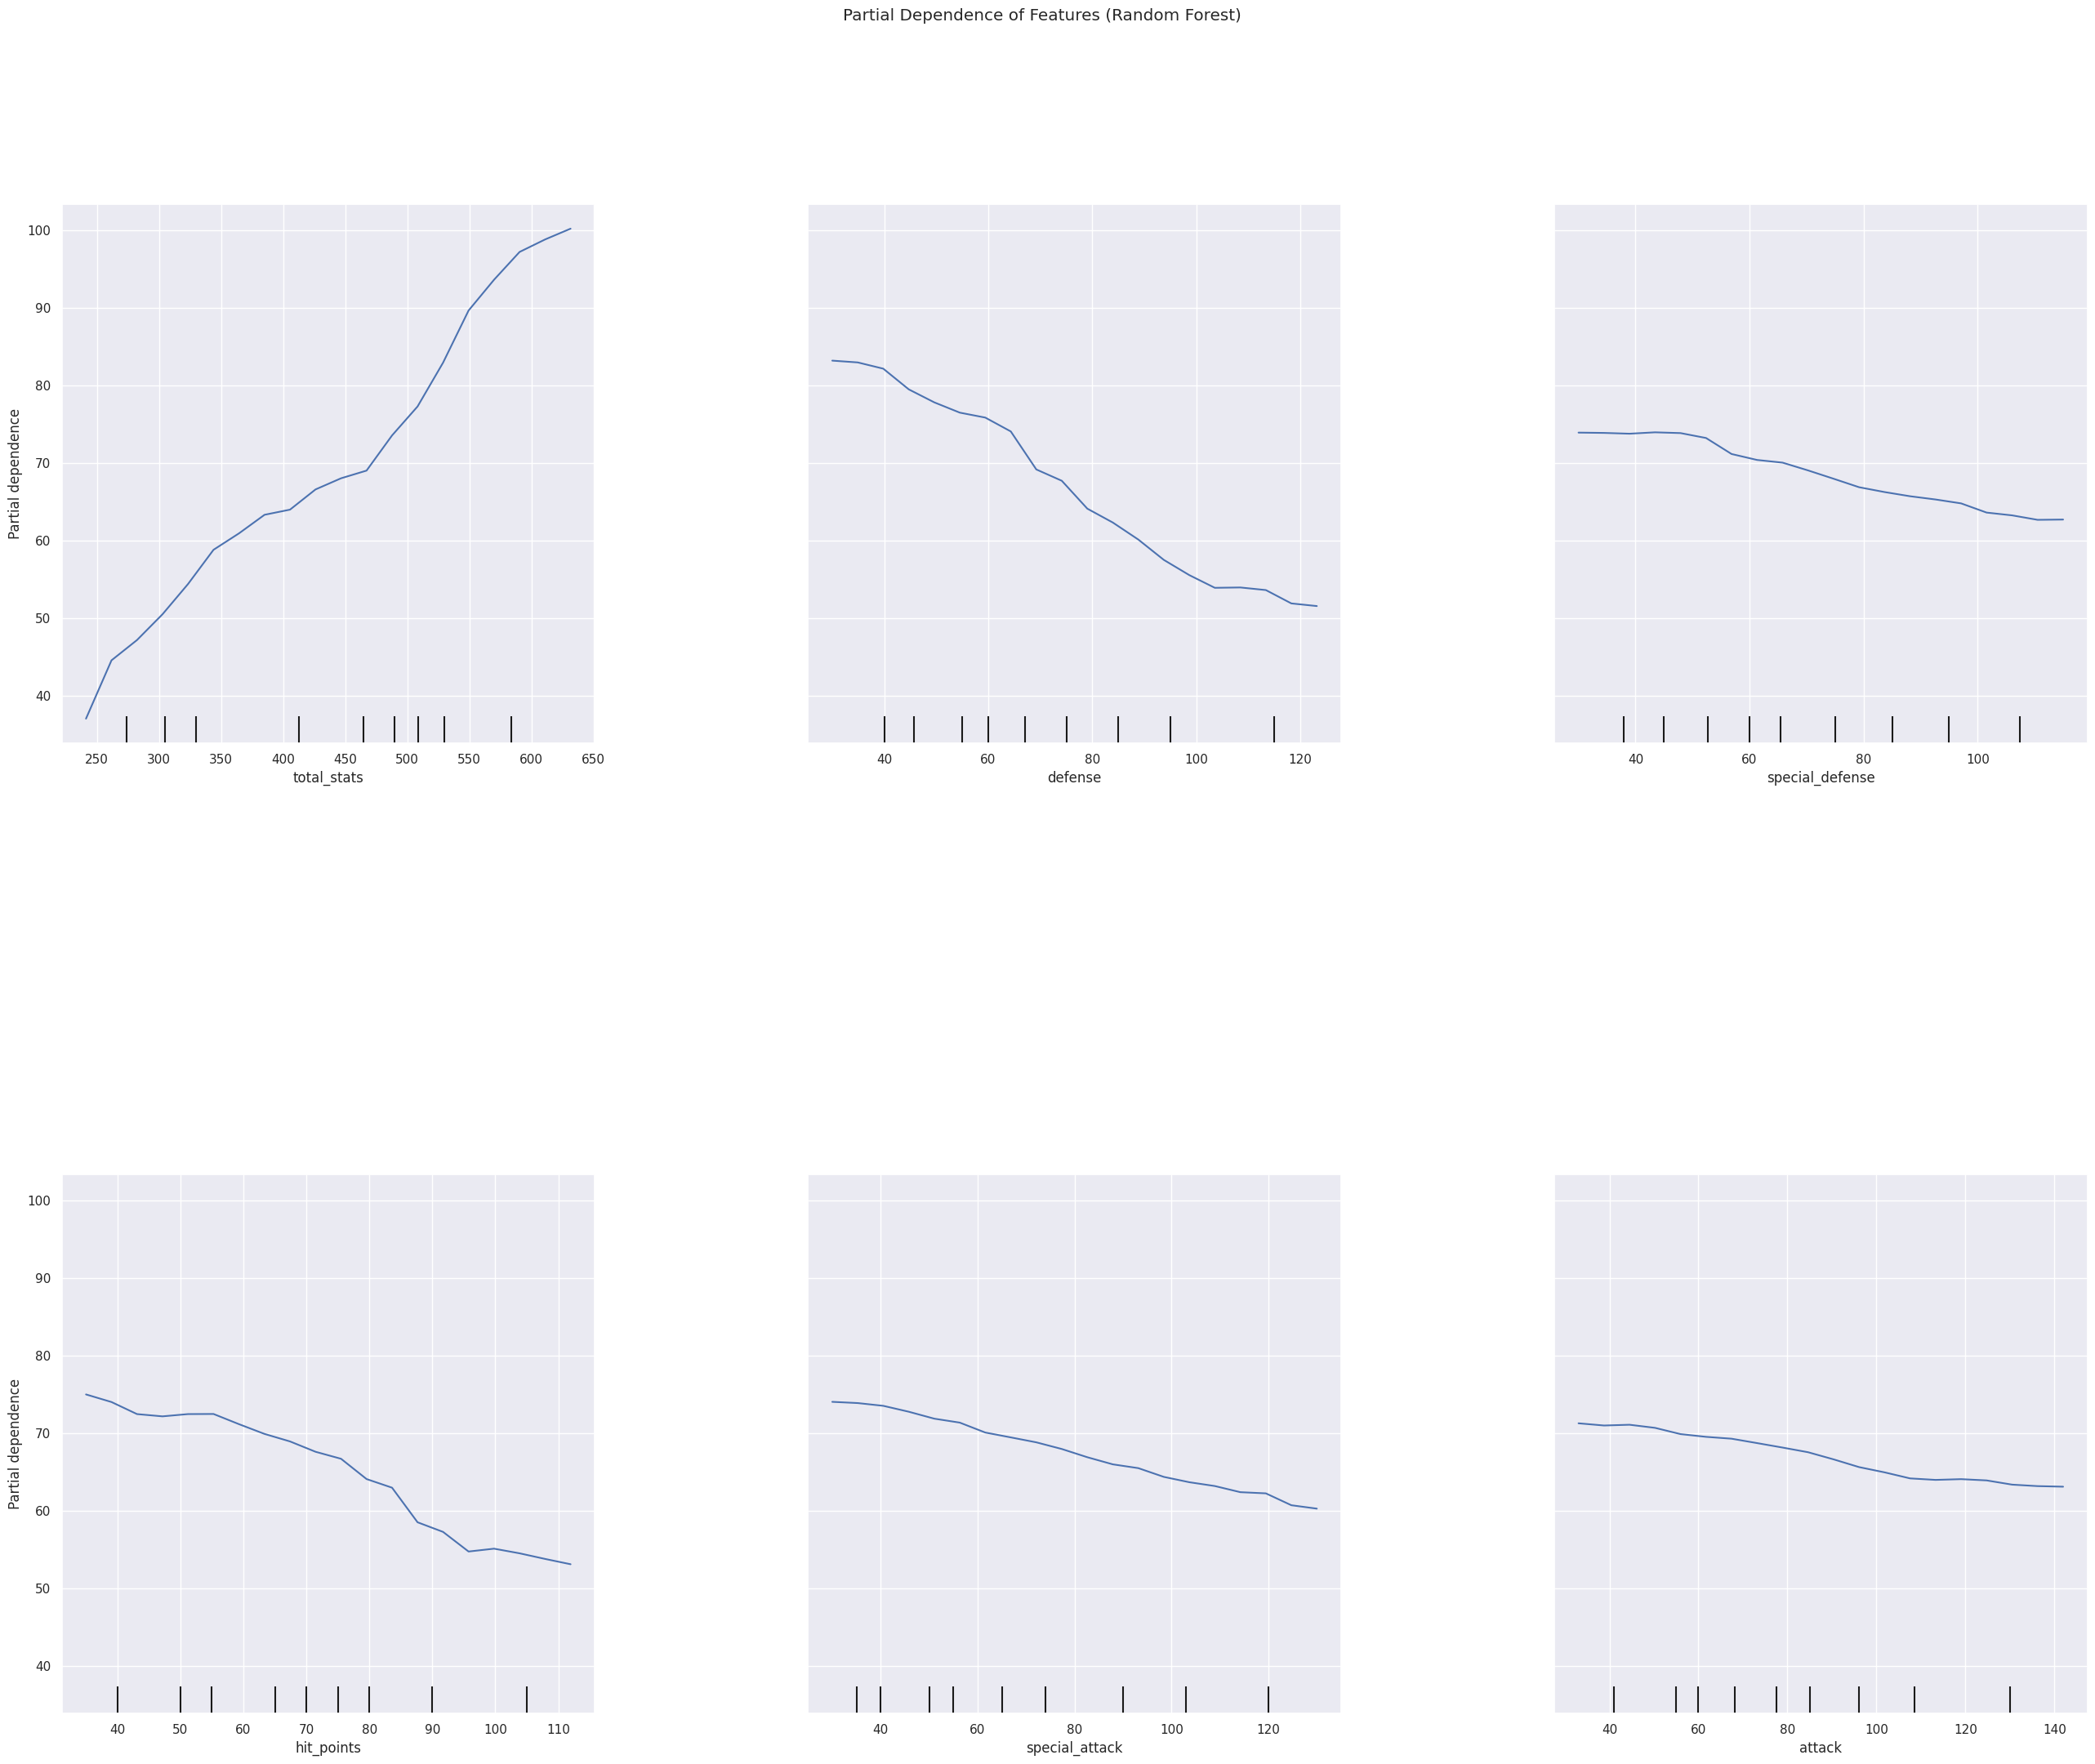

In [119]:
# Generate the Partial Dependence Plot for the Random Forest model
PartialDependenceDisplay.from_estimator(
    rf_model, X_test, features=X_test.columns, n_jobs=3, grid_resolution=20
)

# Adjust figure settings and show the plot
plt.gcf().set_size_inches(32, 24)
plt.suptitle("Partial Dependence of Features (Random Forest)")
plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()


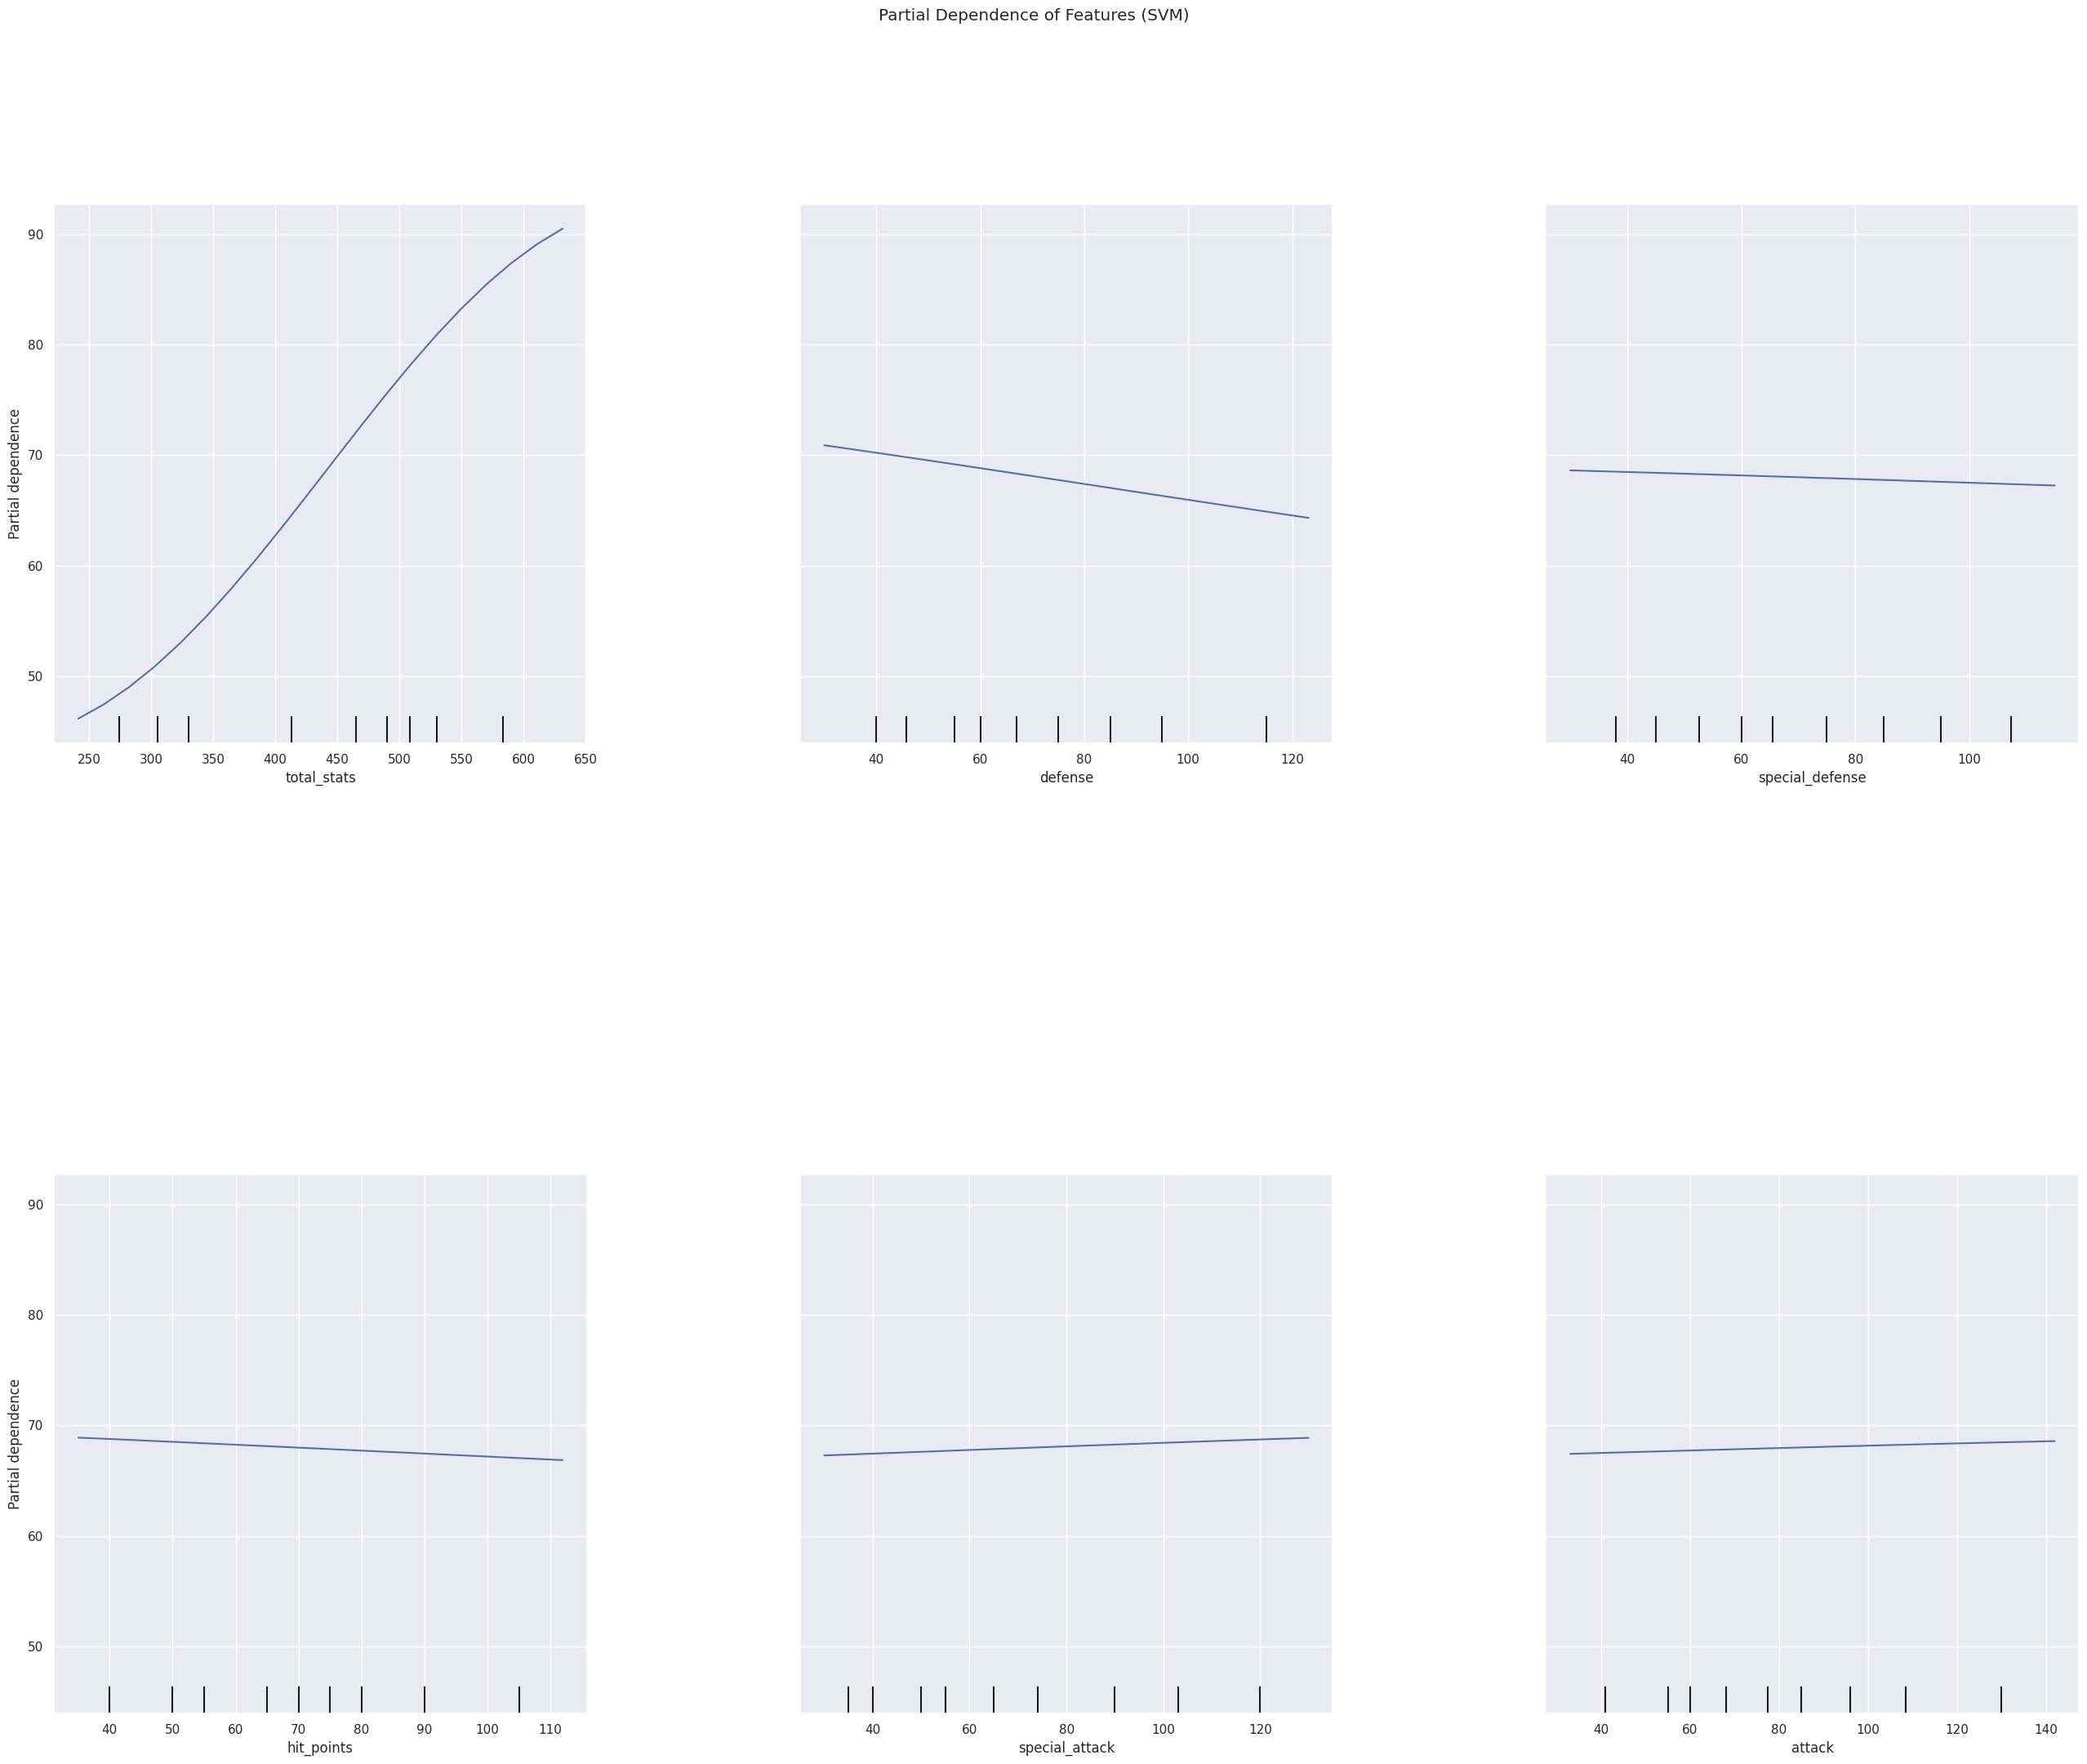

In [120]:
# Generate the Partial Dependence Plot for the SVM model
PartialDependenceDisplay.from_estimator(
    svm_model, X_test, features=X_test.columns, n_jobs=3, grid_resolution=20
)

# Adjust figure settings and show the plot
plt.gcf().set_size_inches(32, 24)
plt.suptitle("Partial Dependence of Features (SVM)")
plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()


# **Interpreting AutoML's best model with tuned hyperparameters**



In [121]:
df_h2o_test.columns

['total_stats',
 'defense',
 'special_defense',
 'hit_points',
 'special_attack',
 'attack']

In [122]:
# Generate predictions
predictions = best_model.predict(df_h2o_test)

# Now, you can use the predictions in various custom explanations as needed
# This approach bypasses the need for 'speed' in 'df_h2o_test' for certain explanation types


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [123]:
predictions = best_model.predict(df_h2o_test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


###**PDP**

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

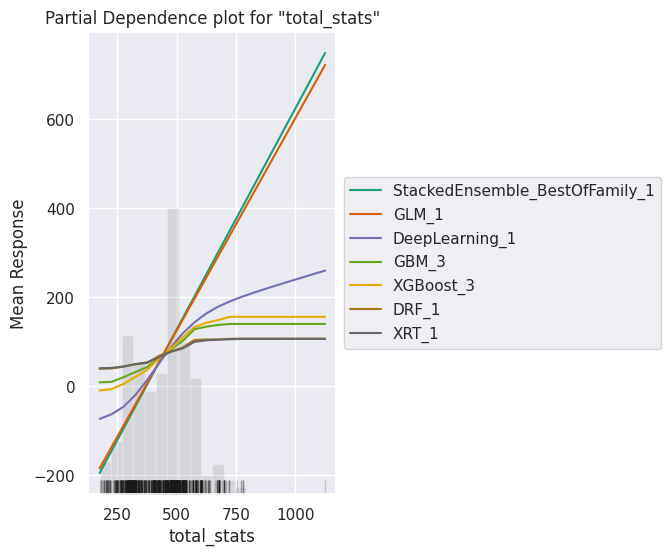

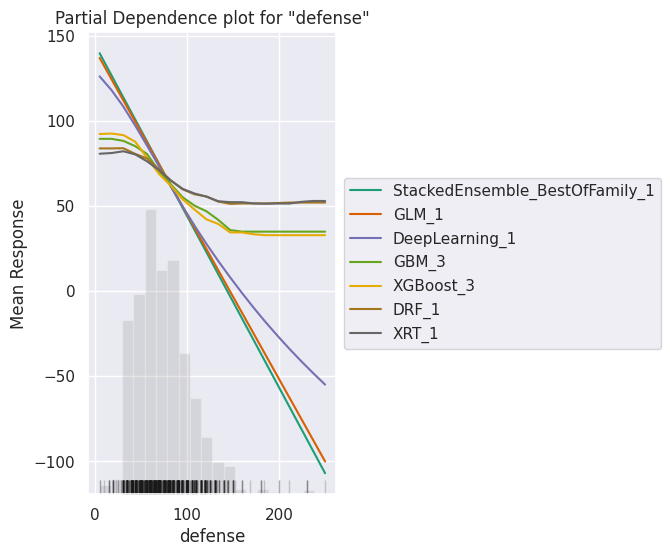

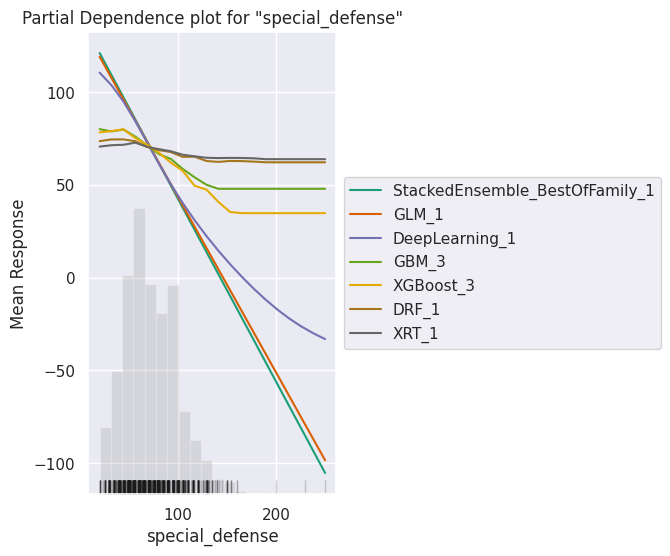

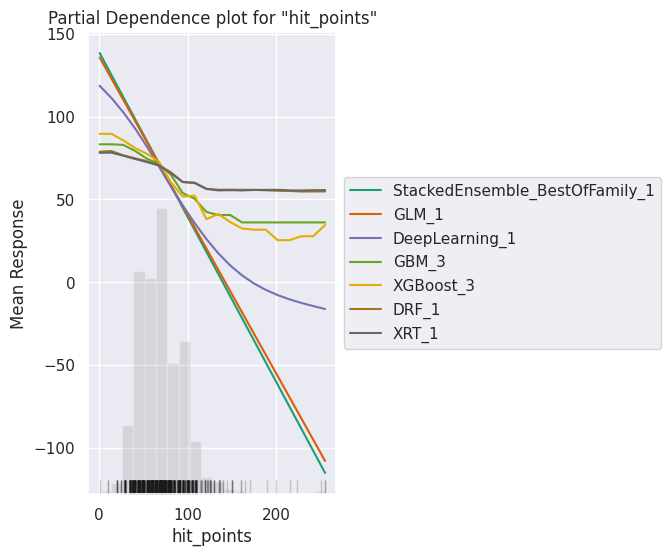

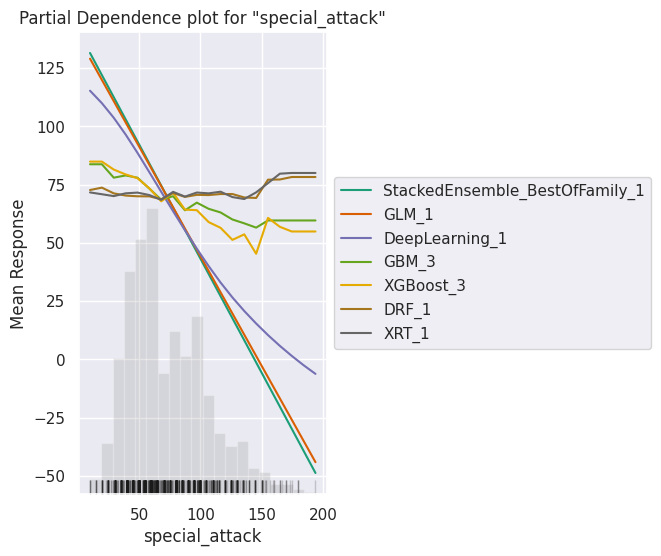

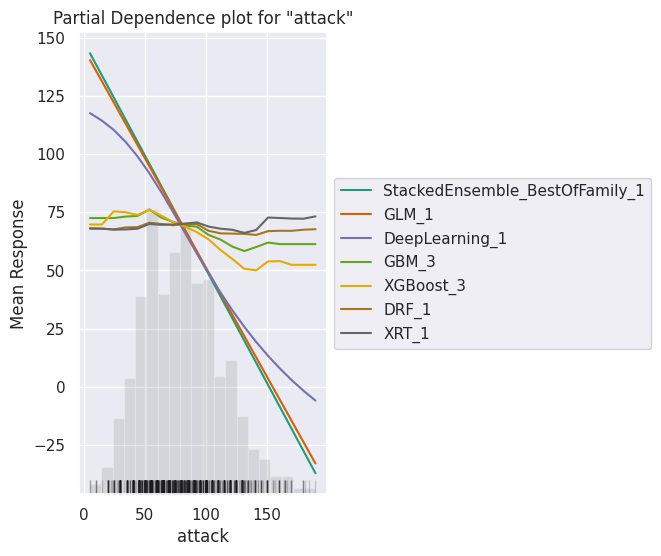

In [124]:
explain_model = aml.explain(frame = df_h2o, figsize = (4,6),include_explanations=['pdp'])


1. **Total Stats**:
   - All models show an increasing trend, indicating that higher 'total_stats' values are associated with a higher response from the models.
   - The Stacked Ensemble, GLM, GBM, XGBoost, and Deep Learning models exhibit very similar trends, which are almost linear with a slightly steeper slope at higher values of 'total_stats'.
   - The Distributed Random Forest (DRF) and Extremely Randomized Trees (XRT) have a slightly different shape, suggesting these models might capture different interactions or have regularization that affects their sensitivity to changes in 'total_stats'.

2. **Defense**:
   - The relationship between 'defense' and the response is less uniform across the models compared to 'total_stats'.
   - Most models show a decreasing trend as 'defense' increases, with some flattening out or even slightly increasing after a certain point.
   - Deep Learning's response appears to be more volatile compared to other models, indicating a more complex nonlinear relationship.
   
3. **Special Defense**:
   - The plots for 'special_defense' are somewhat flat, suggesting a weaker relationship with the target variable.
   - Most models again follow a similar pattern, with GLM showing a slight upward trend, whereas the others are stable or slightly decreasing.
   
4. **Hit Points**:
   - The 'hit_points' plots show a significant decreasing trend for most models. As 'hit_points' increase, the model response decreases.
   - However, the magnitude of change in response varies, with some models like XGBoost showing a sharper decline than others like GLM.

5. **Special Attack**:
   - There's a varied response to changes in 'special_attack' across models. Most show a downward trend, indicating that higher 'special_attack' values lead to a lower response.
   - The Deep Learning model appears to respond differently compared to ensemble models, suggesting that it may be capturing different interactions.

6. **Attack**:
   - Similar to 'special_attack', most models indicate that as 'attack' increases, the model response decreases.
   - The pattern is consistent across models, though there's variation in the slope and the point where the response starts to level off.

**Overall Analysis**:
- There is a generally consistent trend across models for each feature, indicating robustness in how these features influence the prediction, regardless of the model used.
- 'Total_stats' seems to have a clear positive relationship with the predicted response across all models, indicating it is a strong predictor.
- Features like 'defense', 'special_defense', 'hit_points', 'special_attack', and 'attack' have more varied impacts across models, which could be due to the different ways these models handle feature interactions and non-linearity.
- It's also noticeable that ensemble methods (like Stacked Ensembles, GBM, and XGBoost) tend to follow similar trends, suggesting they may be leveraging the same underlying patterns in the data.
  

###**SHAP**

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

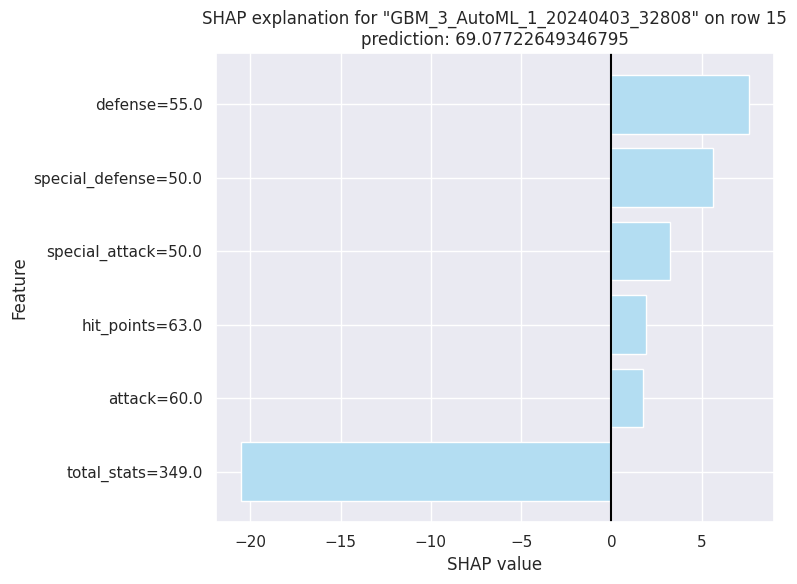

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

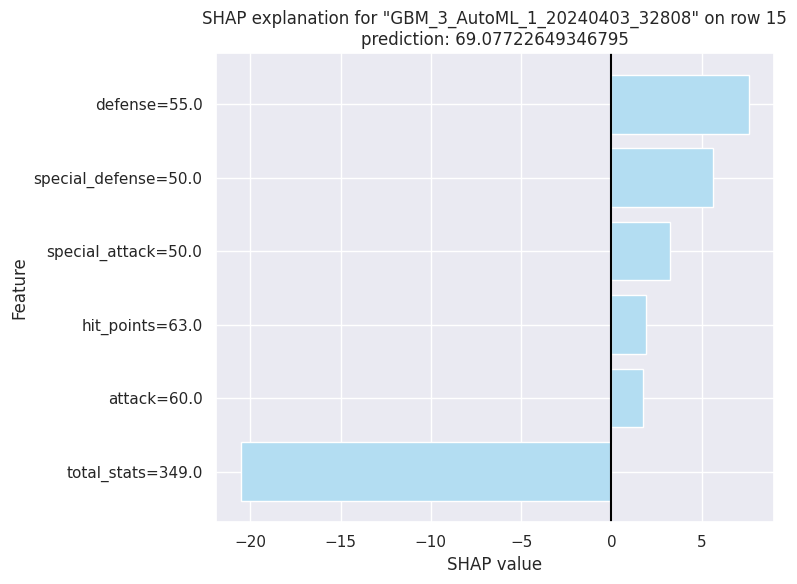

In [125]:
aml.explain_row(frame = df_h2o_train, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")

In this SHAP summary plot, each bar represents the contribution of a feature to the model's prediction for an individual instance, with the length of the bar representing the magnitude of the feature's impact and the direction (left or right from the centerline) indicating whether the effect is negative or positive.

- **total_stats=349.0**: This feature has a large positive SHAP value, suggesting that for this specific instance, having a 'total_stats' value of 349 greatly increases the model's prediction. The positive impact is quite significant compared to the other features.

- **attack=60.0**: The 'attack' feature also contributes positively to the prediction, but its impact is smaller than that of 'total_stats'.

- **hit_points=63.0**: Similarly, 'hit_points' has a positive effect on the prediction, but to a lesser extent.

- **special_attack=50.0**: 'special_attack' seems to have a very small positive contribution to the model prediction for this particular instance.

- **special_defense=50.0** and **defense=55.0**: Both features have a negligible impact on the model's prediction, as indicated by the very short bars.

What's important to note in this analysis is that 'total_stats' is by far the most influential feature for this prediction. This might indicate that 'total_stats' is a composite metric or a key factor that the model heavily relies on to make its predictions. The other attributes also contribute to increasing the prediction but to a much lesser extent.

###**ICE**

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

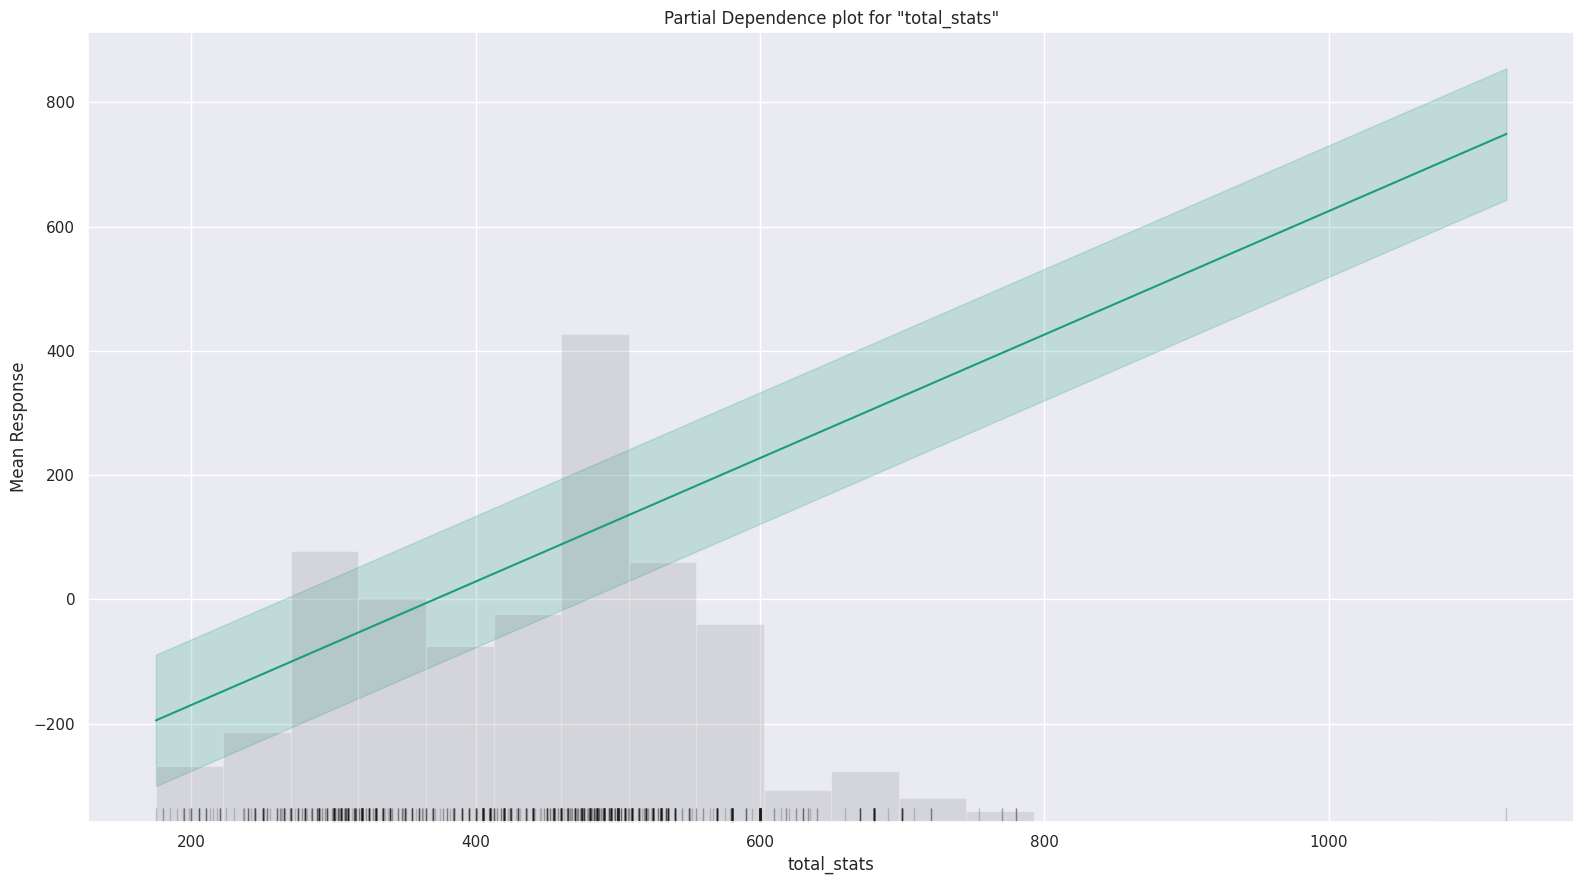

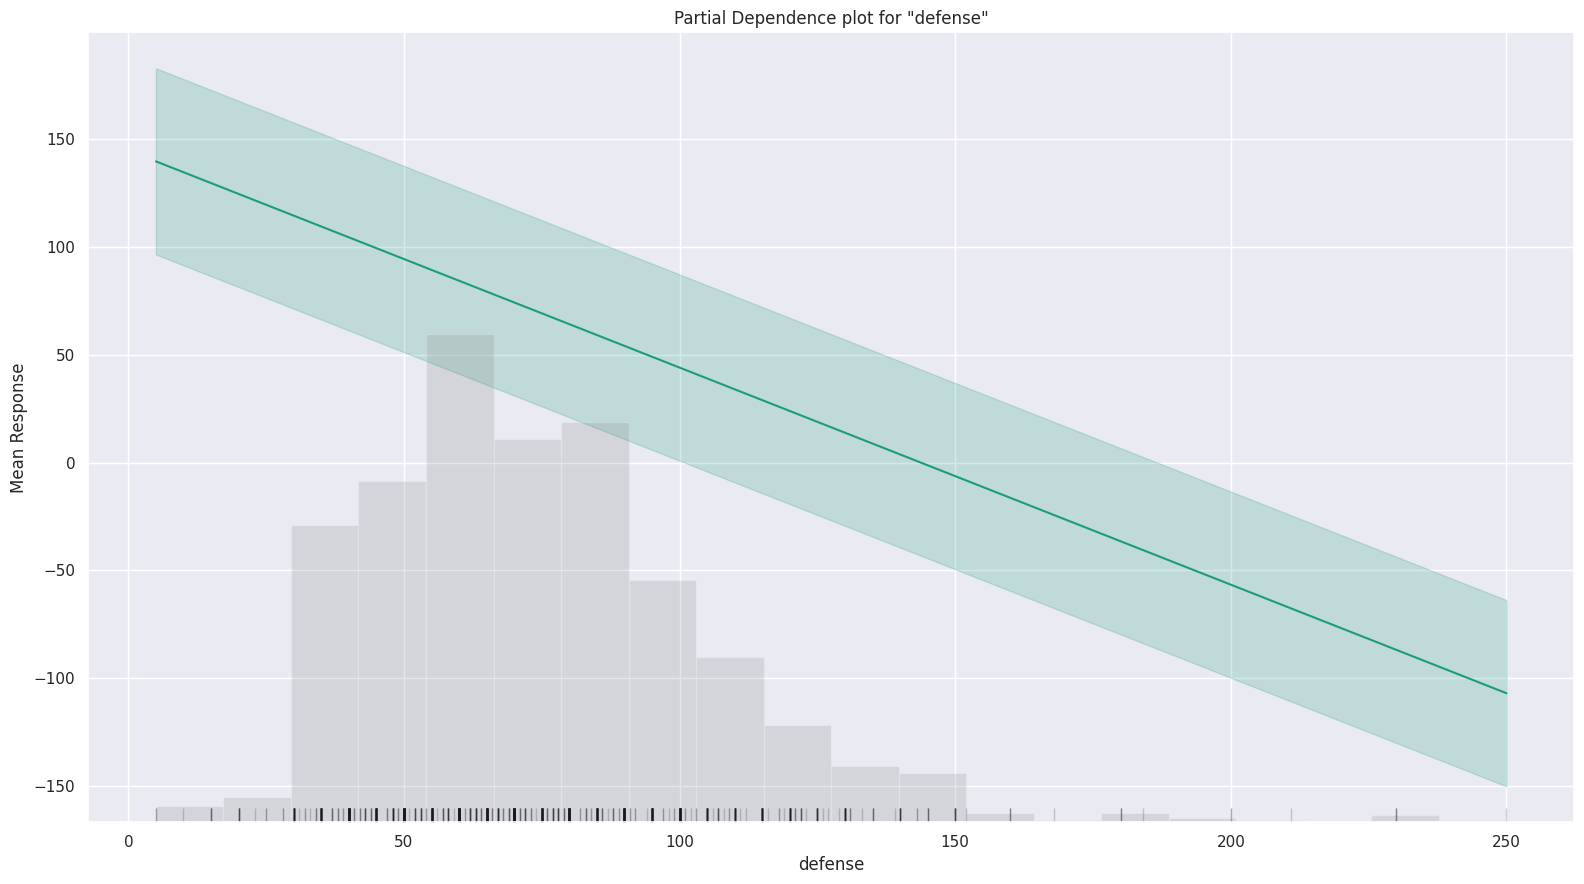

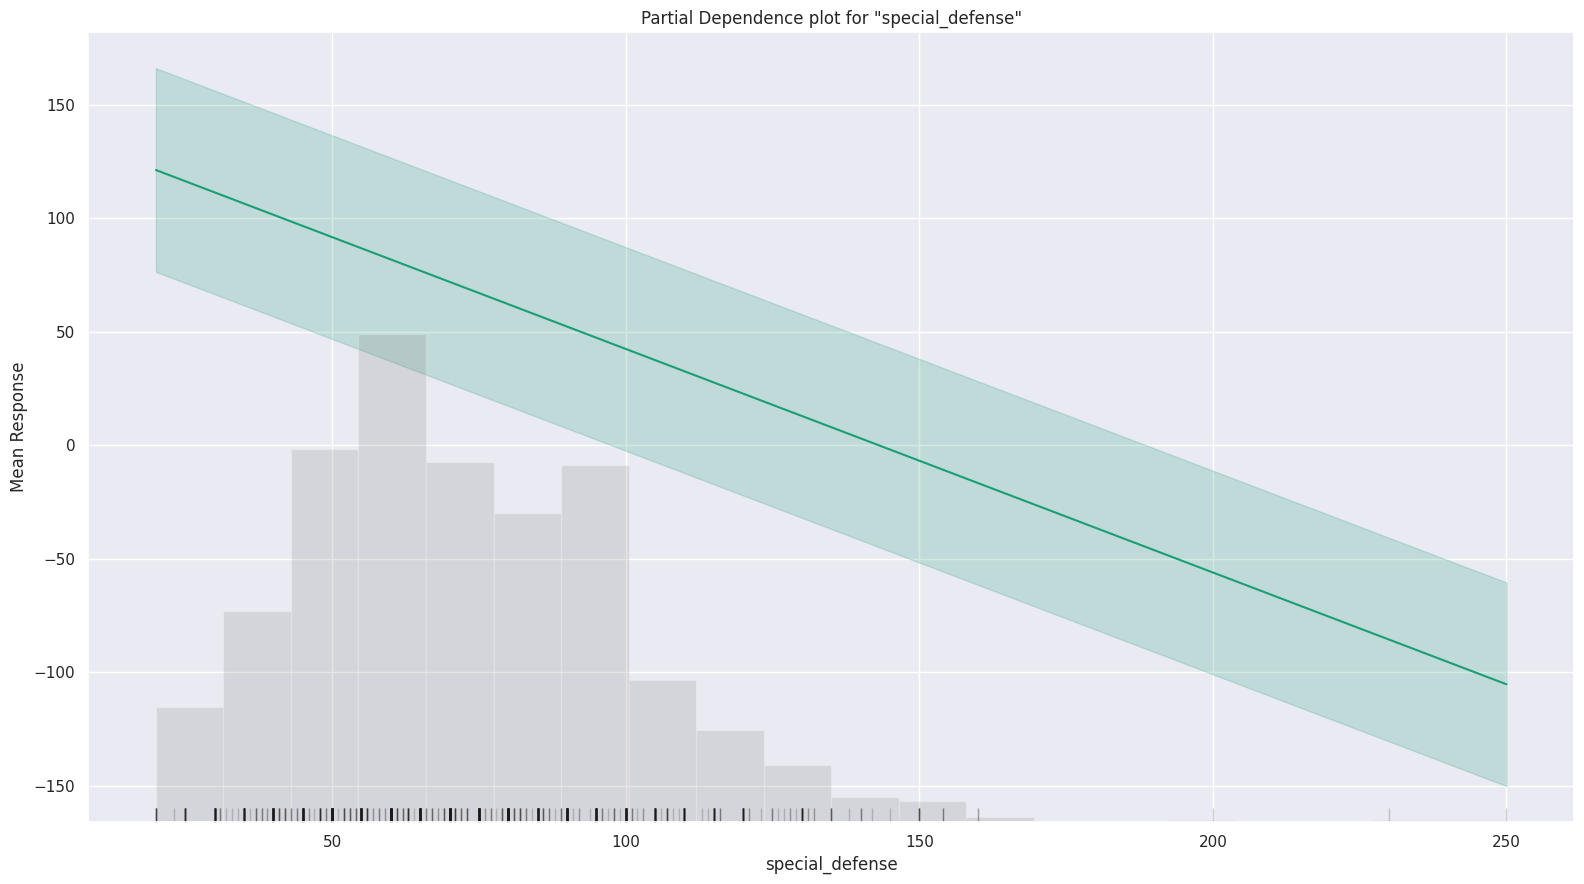

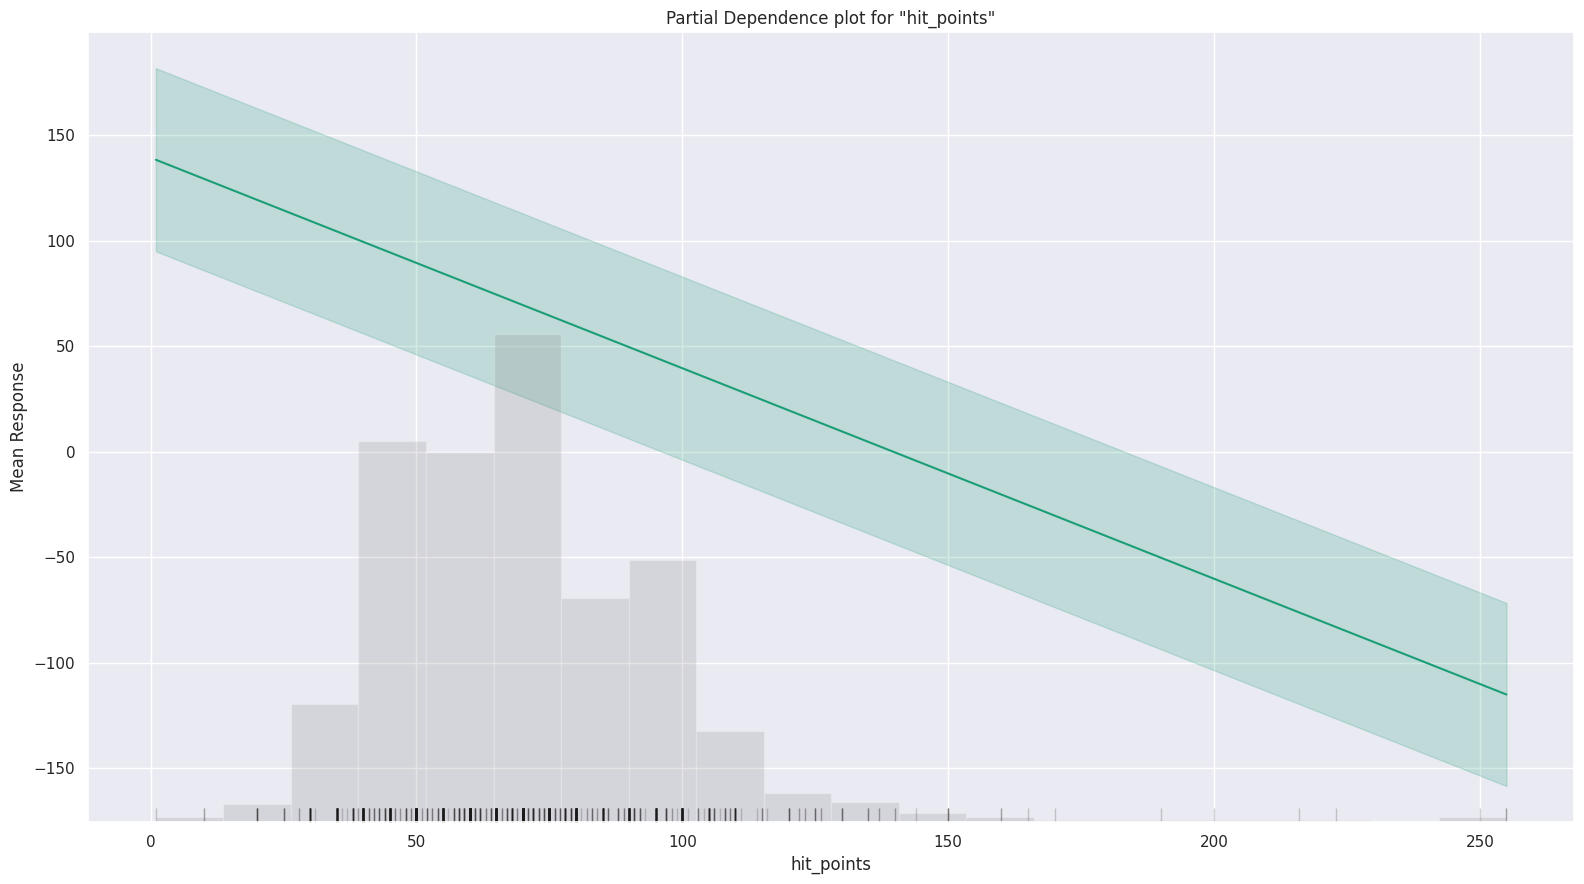

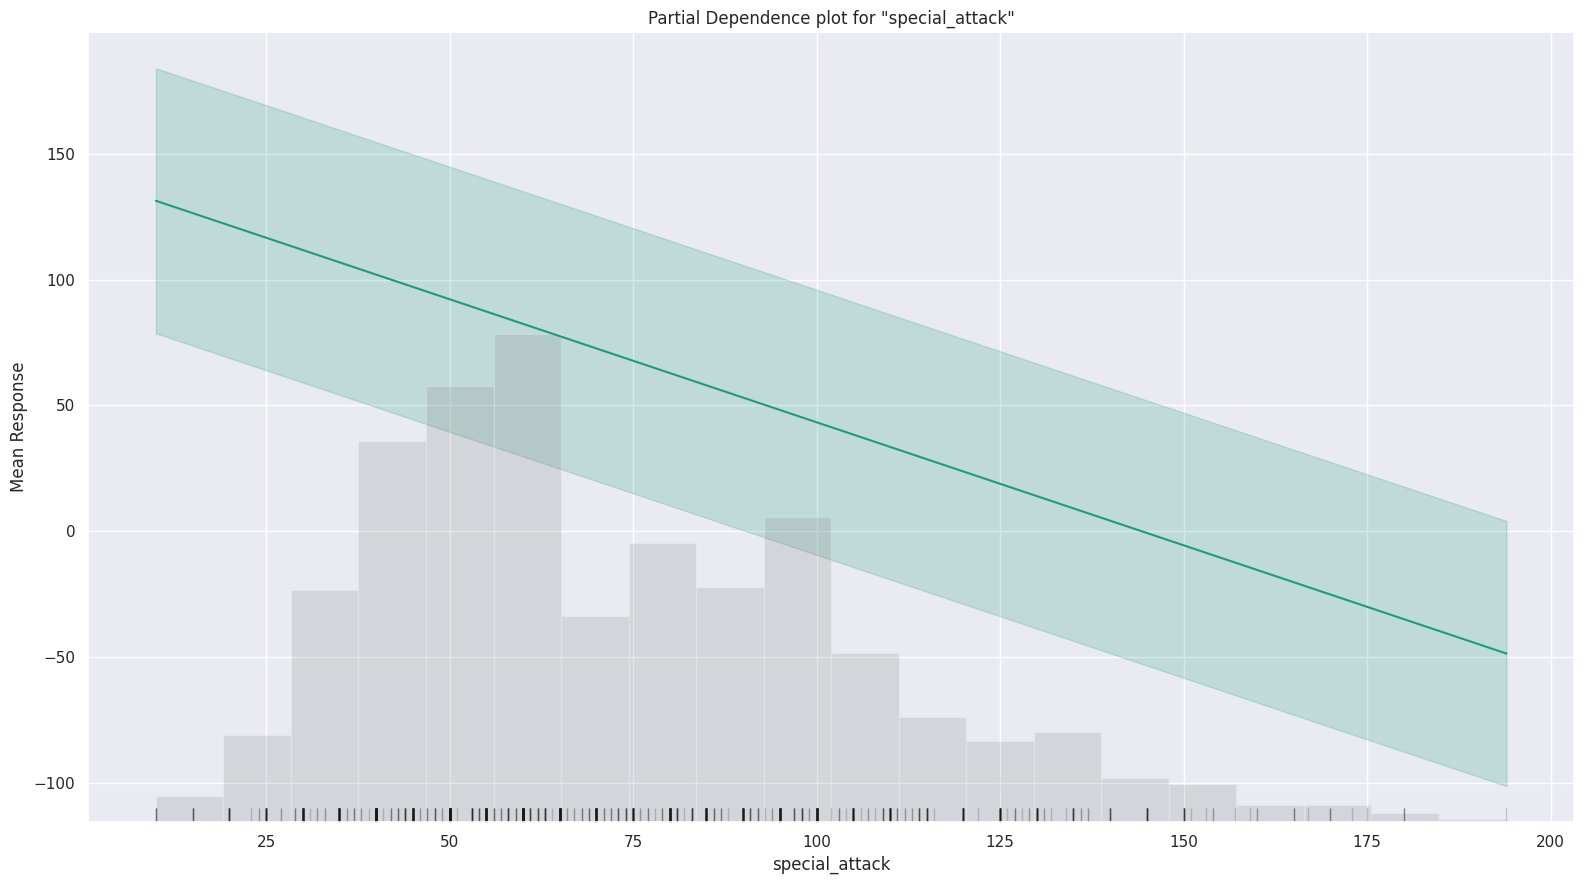

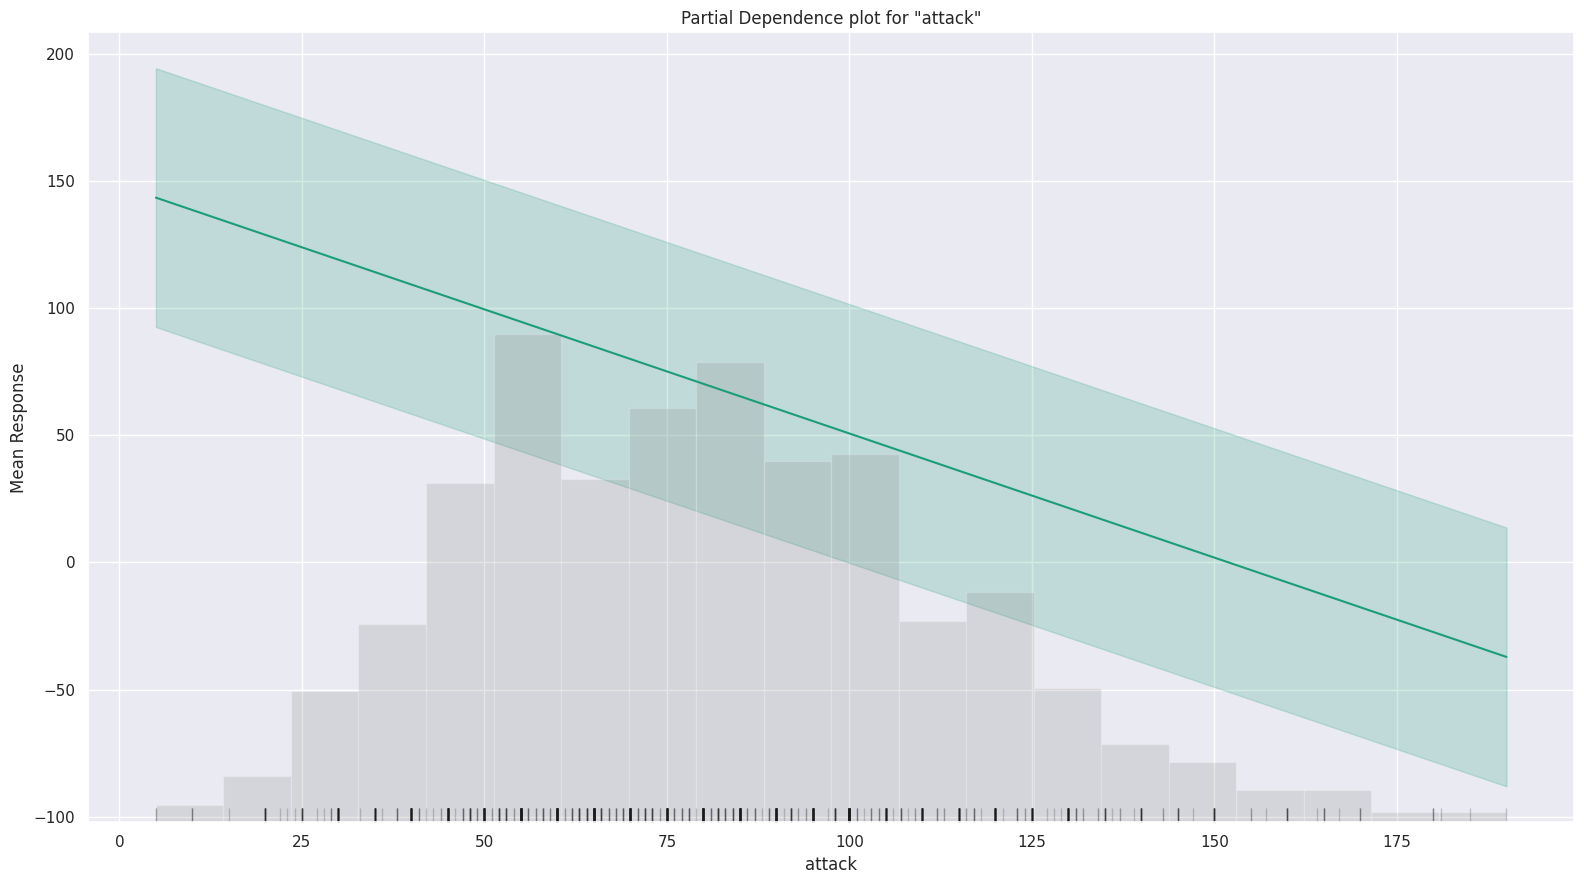

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

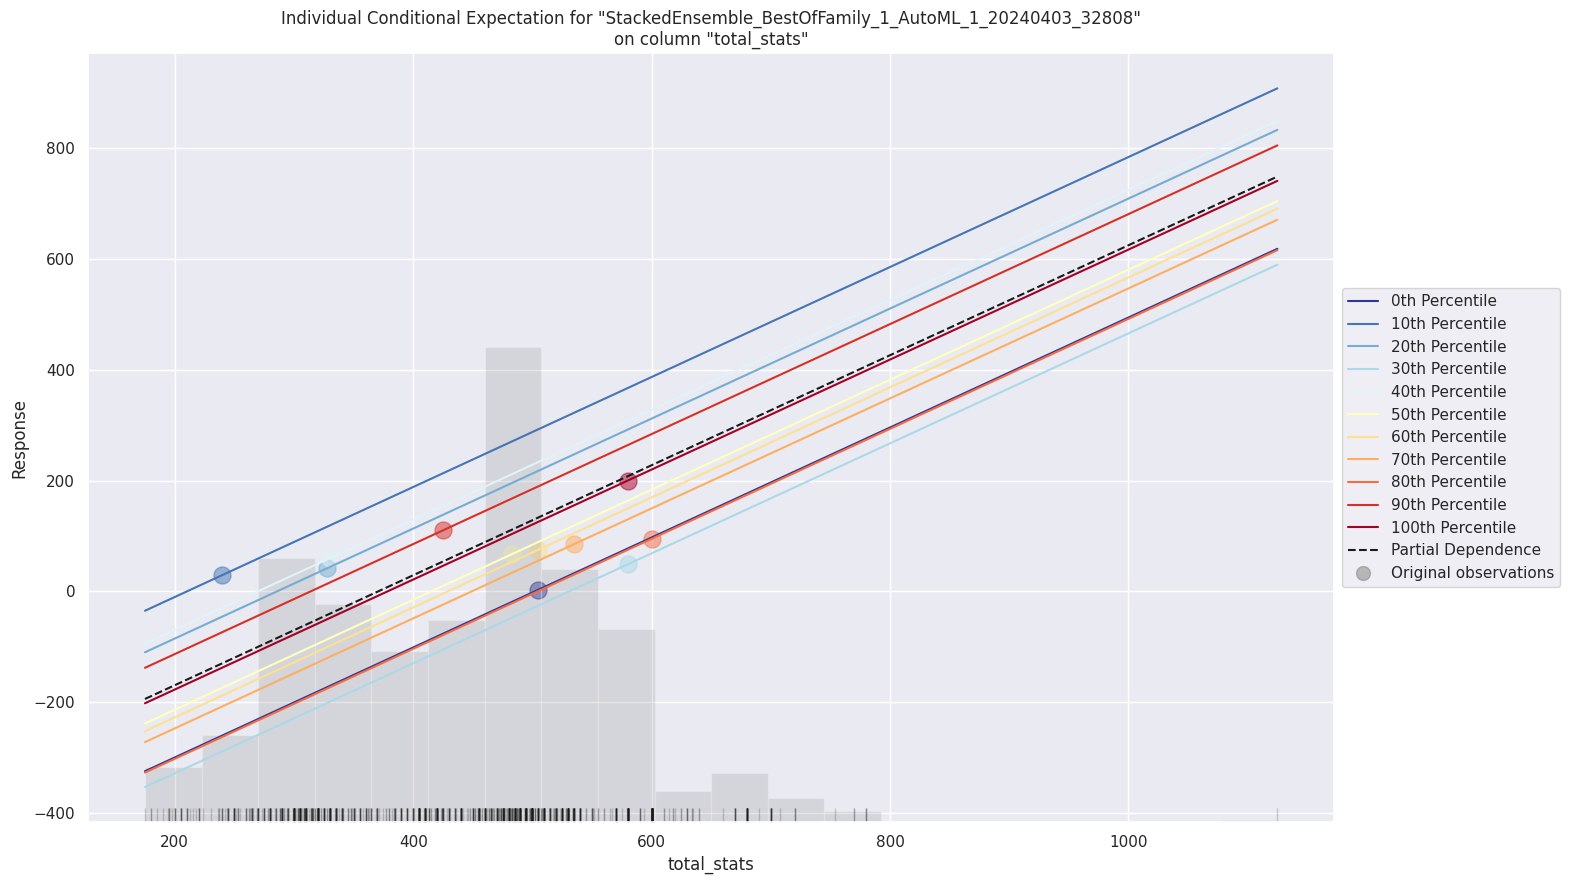

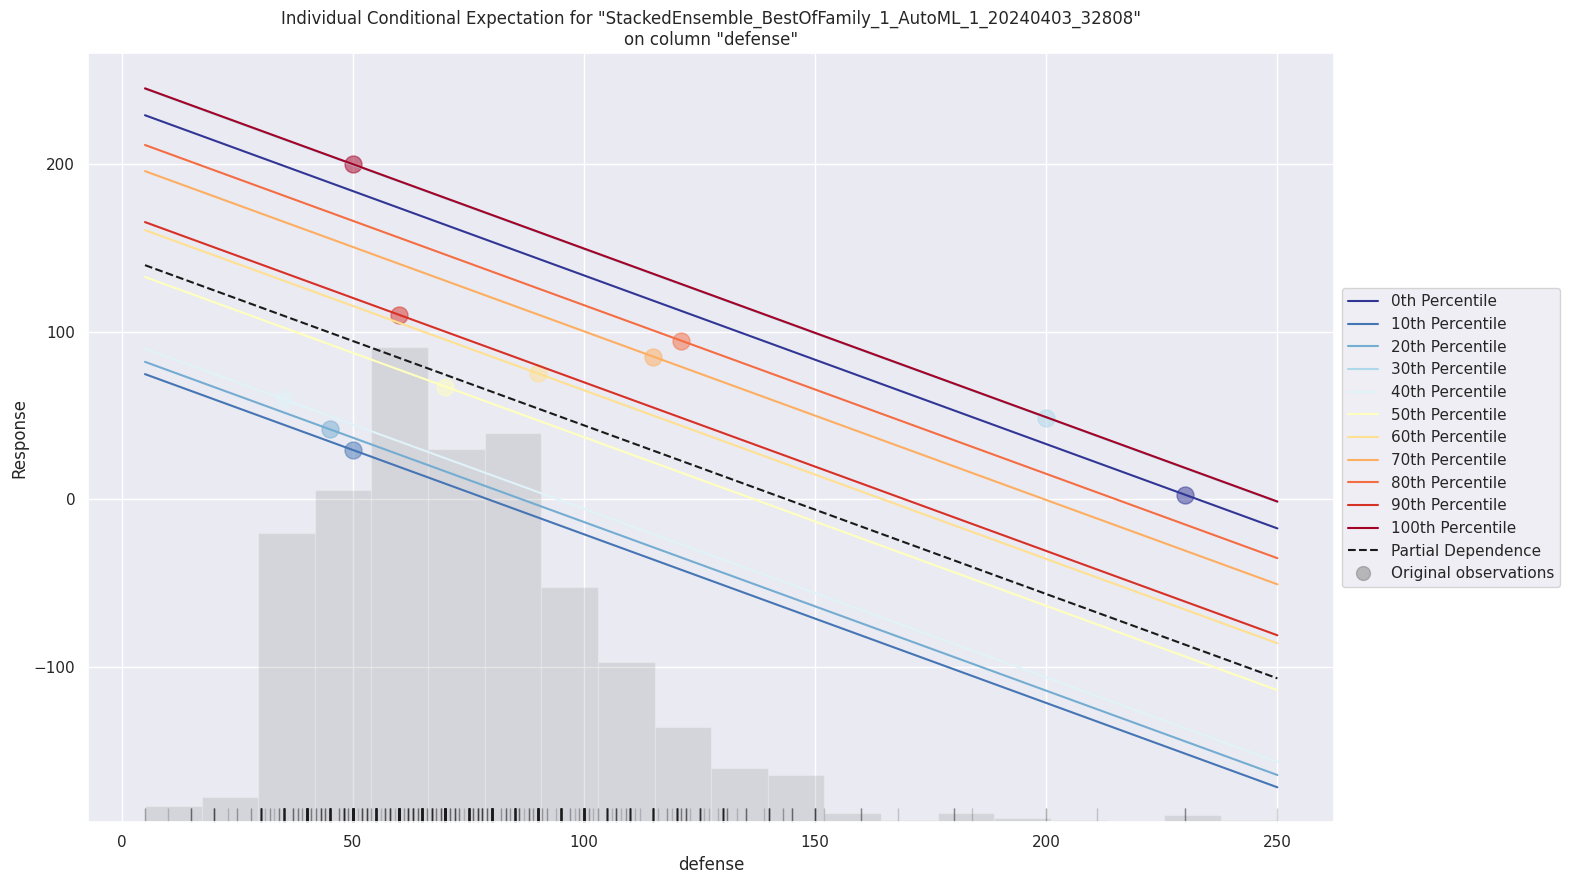

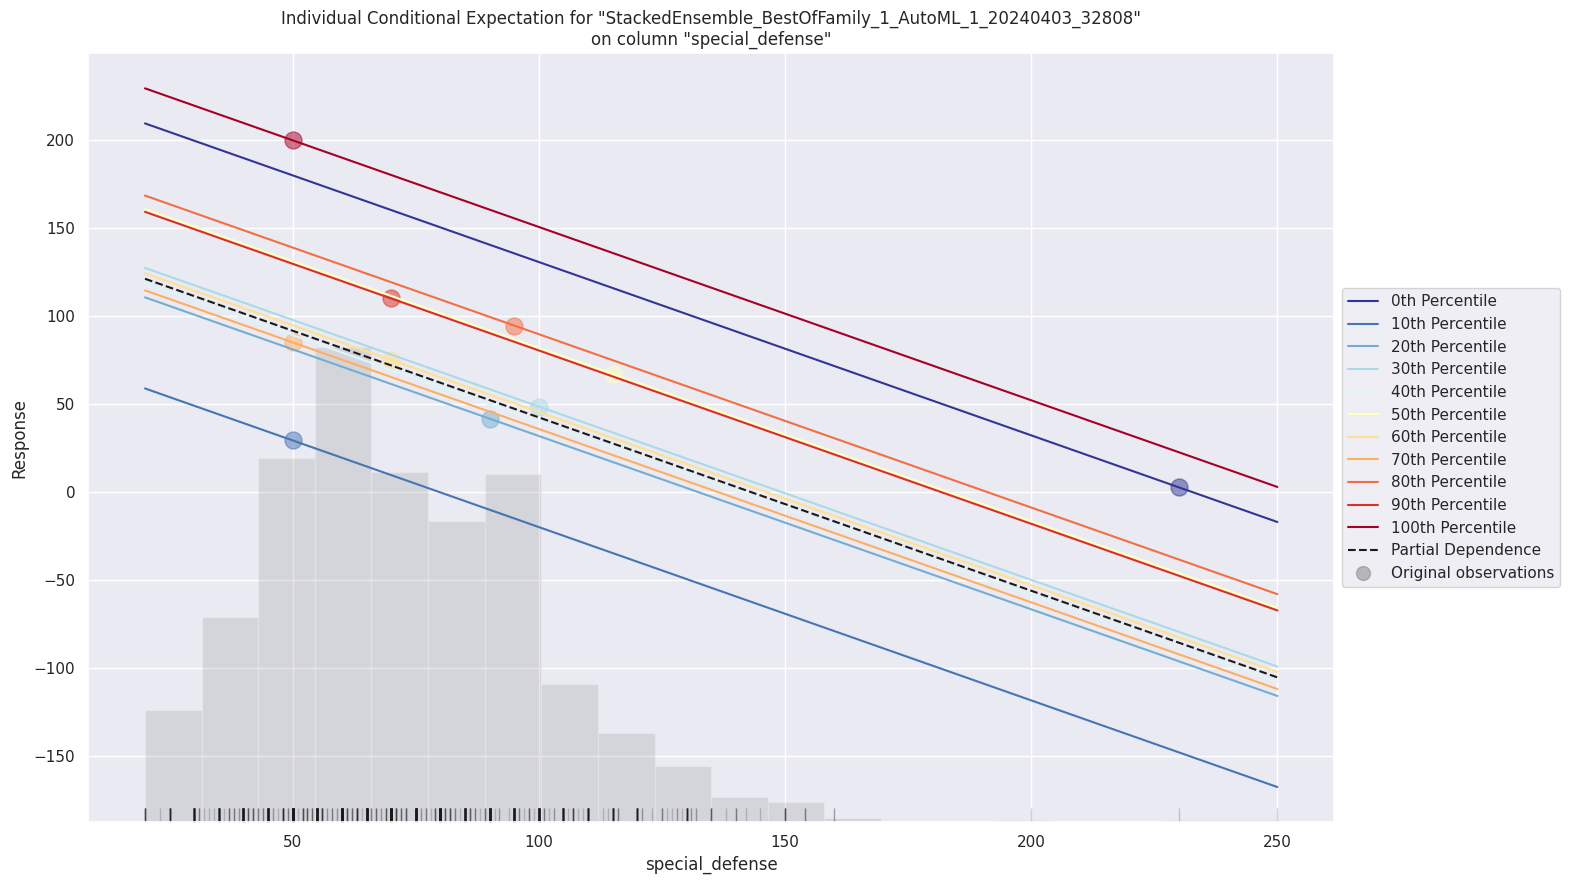

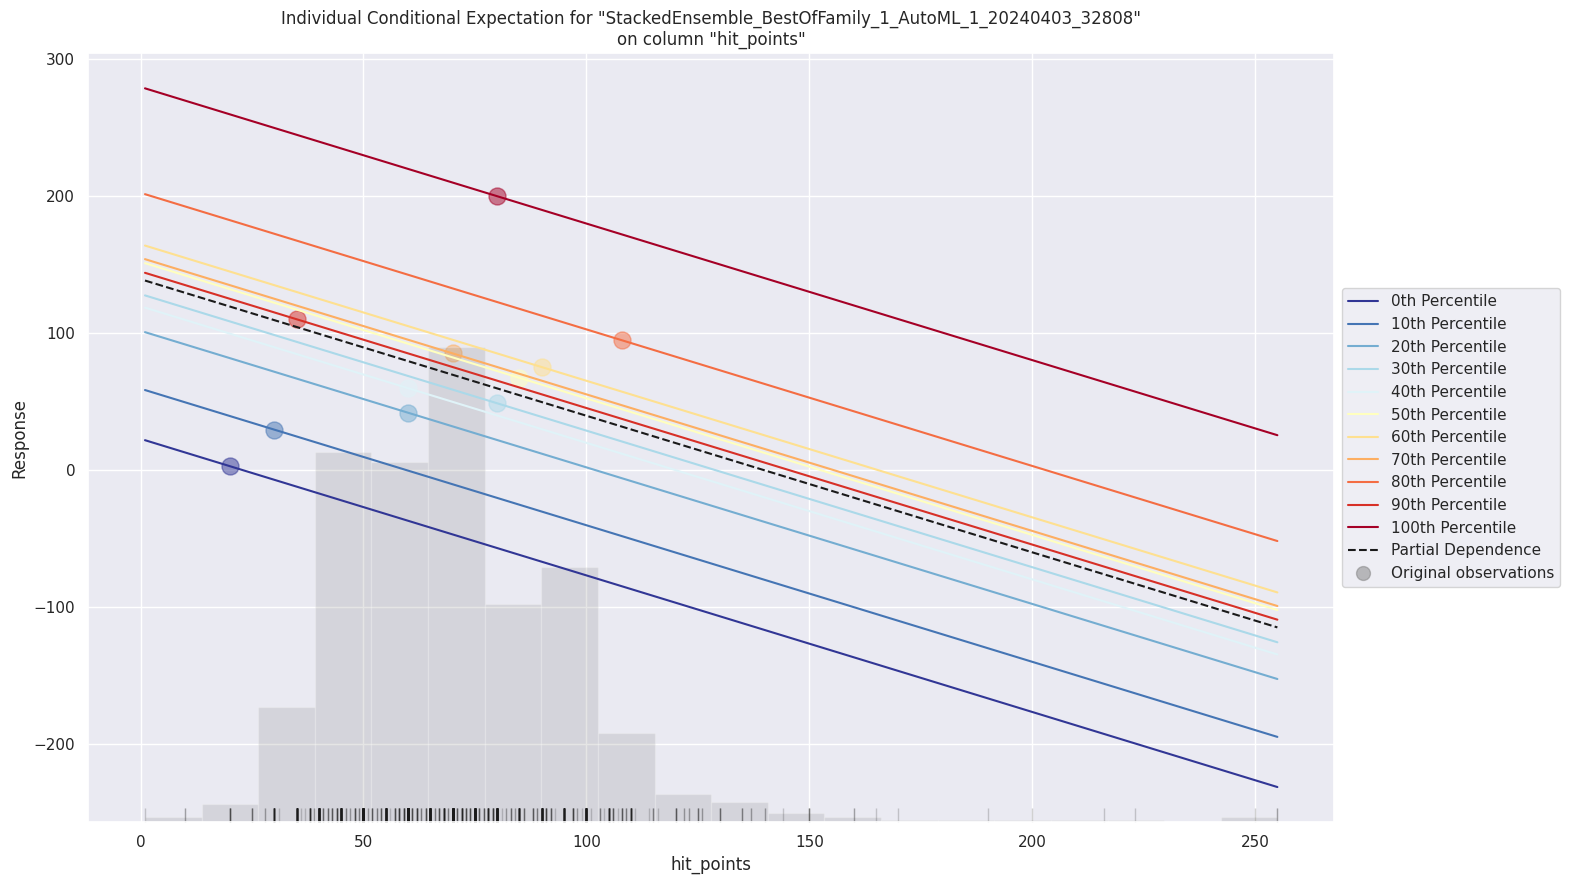

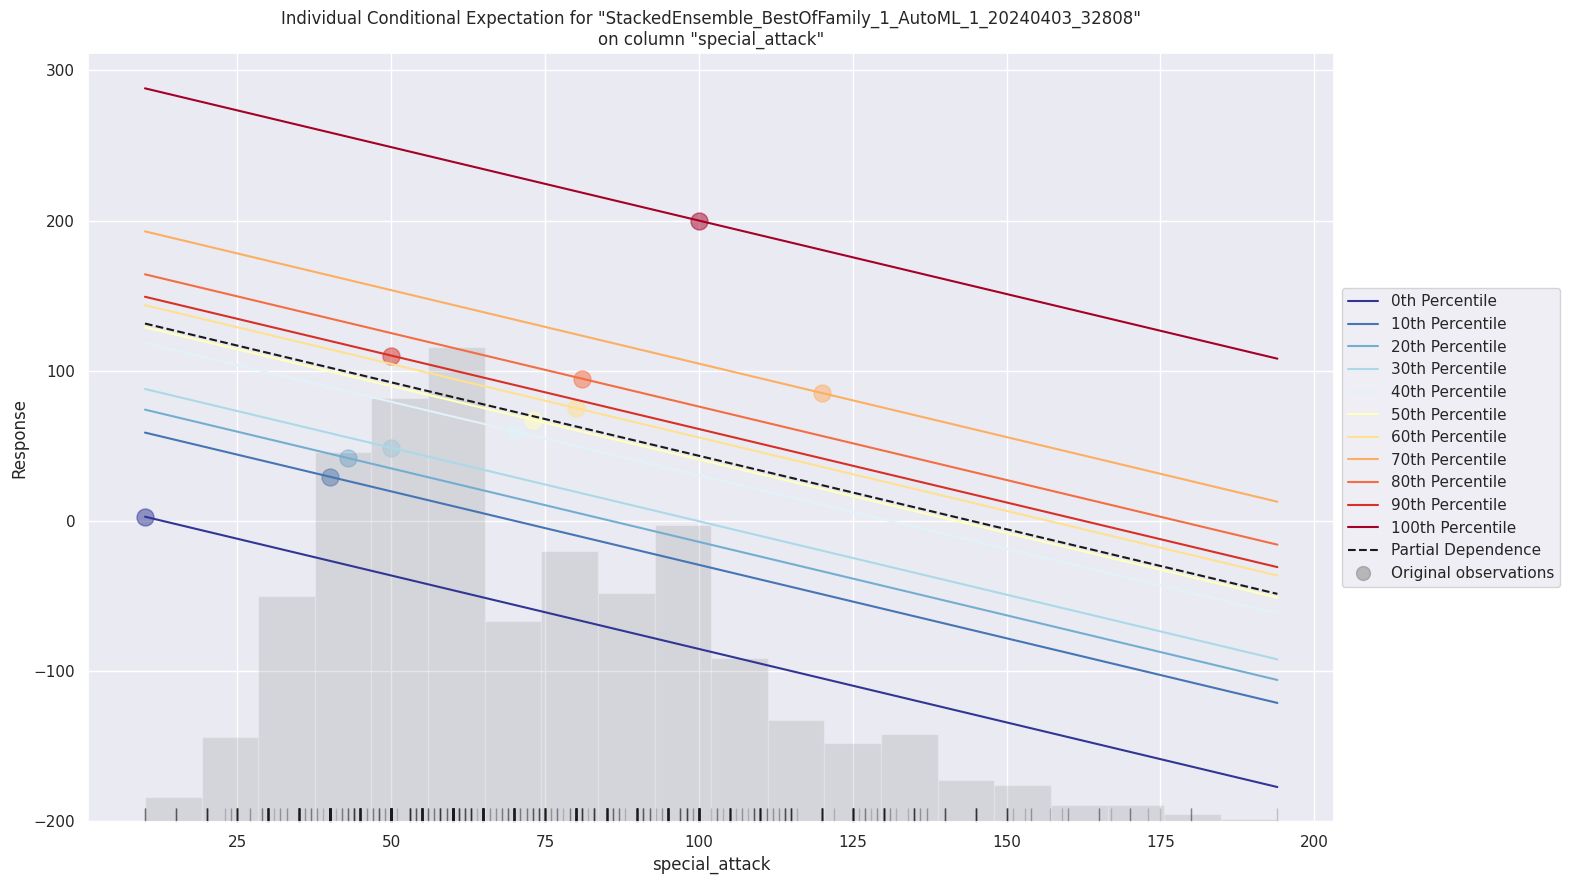

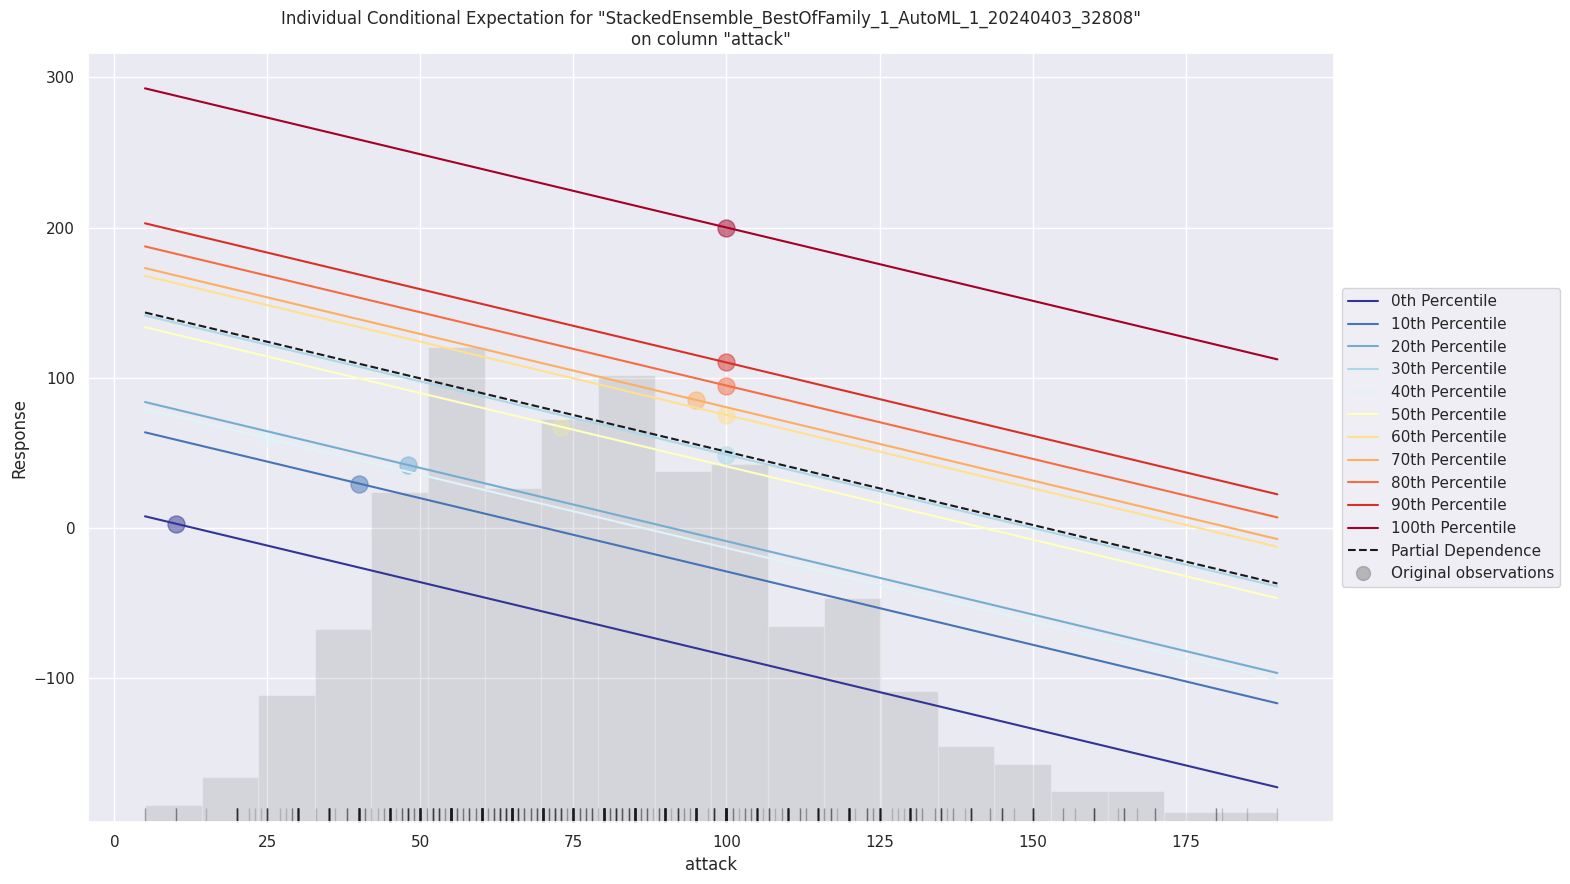

In [126]:
explanation_types = ["shap_summary", "varimp", "pdp", "model_correlation_heatmap", "varimp_heatmap", "ice"]
explanation = best_model.explain(df_h2o, include_explanations=explanation_types)


1. **Total Stats**:
   - There's a positive linear relationship for all percentiles, showing that as 'total_stats' increases, so does the model's prediction.
   - This suggests that 'total_stats' is an influential feature for the model across all data points.

2. **Defense**:
   - The ICE plots mostly depict a negative slope, indicating that higher 'defense' values are generally associated with lower predictions.
   - However, some of the percentiles start to plateau or slightly increase after a certain 'defense' value, which could indicate a non-linear relationship or interaction effects with other features.

3. **Special Defense**:
   - Similar to 'defense', there's a general trend where increasing 'special_defense' values lead to lower predictions.
   - The plots for different percentiles seem to diverge as 'special_defense' increases, suggesting varying effects at different levels of this feature.

4. **Hit Points**:
   - The plots show that as 'hit_points' increase, the predictions tend to decrease across the percentiles.
   - The lines are tightly clustered, which implies that the effect is consistent across the dataset.

5. **Special Attack**:
   - There's a noticeable negative relationship between 'special_attack' and the model predictions.
   - The ICE lines are quite parallel, indicating a consistent effect of 'special_attack' across different data points.

6. **Attack**:
   - The trend for 'attack' is similar to that of 'special_attack', with a negative slope observed across all percentiles.
   - This indicates that as the 'attack' value increases, the model's predictions decrease.

The dotted black line in each plot represents the Partial Dependence (PD) plot, which shows the average effect of the feature on the model's predictions. This is the expected response over the dataset for a given feature value, while the colored lines represent the model's predictions for individual instances at different percentiles of the feature's distribution.

In summary, these ICE plots highlight the relationship between each feature and the model's predictions. 'Total_stats' shows a strong positive effect, while 'defense', 'special_defense', 'hit_points', 'special_attack', and 'attack' all show negative effects. The consistency and variation of these effects across different instances (as shown by the spread of the colored lines) provide insight into the feature interactions and model behavior.

#**Interpretability Conclusion**:

### Linear Model
- Exhibits a consistent, straightforward relationship between features and predictions.
- Linear Partial Dependence Plots (PDPs) suggest the model assumes a linear impact of features on the prediction.
- SHAP values confirm the additive nature of the feature effects.

### Random Forest
- Captures non-linear relationships with more complex PDPs and ICE plots.
- The influence of features on predictions can vary at different feature values, highlighting interaction effects.
- SHAP values show more spread and variation, indicating the model's capacity to account for complex interactions between features.

### SVM
- Can model non-linear relationships, as indicated by the curved shape of SHAP dependency plots.
- PDPs for SVM are not as straightforward as for Linear models, reflecting the non-linear kernel's ability to handle complex data structures.
- Like RF, SHAP values show variability and a more nuanced relationship between features and the outcome.

### AutoML (Stacked Ensembles)
- Likely incorporates multiple models, including potentially linear and non-linear algorithms, leading to robust performance.
- The ICE plots indicate a strong capacity for handling both linear (as seen in 'total_stats') and non-linear features (as seen in other feature plots).
- SHAP values for the AutoML model would likely combine the interpretability of linear models with the complexity of non-linear models, though these weren't directly observed in the images provided.

### General Observations and Analysis
- **Interpretability**: The Linear model is the most interpretable, with a direct relationship between feature changes and output changes. RF and SVM provide a middle ground, with variable importance and SHAP values offering insights despite their complex nature. AutoML may pose challenges for interpretability due to the ensemble approach but tools like SHAP can help.
- **Predictive Power**: Non-linear models (RF, SVM, and AutoML) likely outperform the Linear model in terms of accuracy, especially if the underlying relationships in the data are complex and non-linear.
- **Model Behavior**: The behavior of the models across features varies. For instance, 'total_stats' consistently shows a strong positive relationship with the target variable across all models, but for features like 'defense' and 'hit_points', the models behave differently, reflecting their unique handling of data.
- **Feature Impact**: Non-linear models (RF, SVM, AutoML) show that features can have different impacts at different levels (e.g., the impact of 'defense' varies more in these models compared to the Linear model).

In summary, while the Linear model provides clarity and simplicity, it may not capture the full complexity of the data. RF and SVM show more flexibility in handling varied data structures but may require careful tuning to balance complexity and interpretability. AutoML offers a comprehensive approach, potentially yielding the highest predictive performance by leveraging a diverse set of algorithms, although at the cost of transparency. The choice of model would depend on the specific goals, such as the need for interpretability versus predictive accuracy, and the nature of the dataset at hand (*linearity, dimensionality, prediction performance, data size and complexity of features*).

TL;DR:
---
- The Linear model is clear-cut and easy to understand, ideal for simple, linear relationships in data.
- Random Forest and SVM handle complex, non-linear interactions better, offering more nuanced predictions.
- AutoML, which combines several models, potentially offers the best accuracy for varied data complexities but can be less transparent.

Overall, model choice should balance the need for interpretability and accuracy, considering the dataset's characteristics and the analytical goals.

# **Questions**

**1. What is the question?**


---


- The question was to develop a robust predictive model for speed using the Pokédex dataset while using data cleaning, feature selection, AutoML, and model interpretability.

- Specifically, the analysis aimed to understand the importance of these concepts and try to combine what we've done in the past assignments and make a robust notebook that is efficeint and readable.





**2. What did you do?**


---


    1. Data Exploration: Involved loading the dataset, cleaning, and performing exploratory data analysis (EDA) to understand the distribution and characteristics of the data.
    2. Modeling: Covered the training of four different models: Linear Regression, Random Forest, Support Vector Regression (SVR), and AutoML, to predict the Pokémon attribute of interest.
    3. Model Evaluation: Detailed the evaluation of each model using MSE and R² metrics to assess their performance.
    4. Model Interpretation: Likely discussed the interpretation of the best-performing model to understand the influence of different features on the prediction.


---



I performed exploratory data analysis to understand the characteristics of the dataset and identify any patterns or correlations between different attributes.

After cleaning and preprocessing the data to handle missing values and remove any unnecessary features, I proceeded to select relevant attributes that are likely to have a significant impact on a Pokémon's speed. This involved using techniques like feature selection and correlation analysis to identify the most influential independent variables.

Next, I employed various machine learning algorithms such as Linear Regression, Random Forest, and Support Vector Machine (SVM) to build predictive models for Pokémon speed. I trained these models using the selected features and evaluated their performance using metrics like Mean Squared Error (MSE) and R-squared (R²) to assess accuracy and goodness of fit.

Additionally, I utilized AutoML (Automated Machine Learning) techniques to further explore model training and selection. This involved leveraging tools like H2O AutoML to automatically train and compare multiple machine learning models, ultimately selecting the best-performing model for predicting Pokémon speed.

Lastly, I delved into model interpretability techniques to gain insights into how the chosen model makes predictions. This included analyzing feature importance scores, partial dependence plots (PDP), and SHAP (SHapley Additive exPlanations) values to understand the relative contributions of different attributes to the model's predictions.


**3. How well did it work?**


---


The combined approach gave promising results:
- **Hyperparameters:** Identified important hyperparameters such as `n_estimators`, `min_samples_split`, and `max_depth`, providing insights into the model's complexity and predictive power.
  
- **Significant Independent Variables:** Identified key independent variables such as `total_stats`, `mean`, `attack`, `special_attack`, and `defense`, which significantly influence the model's predictions.

- **Overall Model Performance:** The model demonstrated coherence, aligning with expectations based on feature importance, partial dependence plots, and residual analysis. It captured significant trends and had strong predictive power, enhancing confidence in its validity.

- **Linear Regression Model**
  - **MSE (Mean Squared Error):** 166.2899, indicating the average squared difference between the estimated values and the actual value is 166.2899. This value suggests a moderate level of prediction error.
  - **R² (Coefficient of Determination):** 0.8085, meaning that approximately 80.85% of the variance in the dependent variable is predictable from the independent variables. This shows the model has a strong explanatory power for the variance in the dataset.

- **Random Forest Model**
  - **MSE:** 227.8424, showing a higher prediction error than the Linear Regression model. This indicates the model's predictions are, on average, less accurate.
  - **R²:** 0.7606, demonstrating that around 76.06% of the variance is accounted for by the model. Although this is a good fit, it is slightly less effective than Linear Regression in explaining the variance in the dataset.

- **Support Vector Regression Model**
  - **MSE:** 579.4823, significantly higher than the other two models, indicating a substantial prediction error. This suggests the model's predictions deviate considerably from the actual values.
  - **R²:** 0.3912, meaning only about 39.12% of the variance is explained by the model. This is considerably lower than both the Linear Regression and Random Forest models, indicating poor performance in capturing the underlying data structure.

- **AutoML Model**
  - **MSE:** 0.5535, remarkably lower than the other models, suggesting an extremely accurate prediction with minimal error.
  - **R²:** 0.9994, nearly perfect, indicating the model can explain virtually all the variance in the dataset. This exceptional performance suggests the model is highly effective at predicting the target variable.

**4. What did you learn?**

- The importance of thorough data cleaning, feature selection, and model interpretation in developing a robust predictive model.
- The significance of hyperparameters and their impact on model performance.
- The effectiveness of regularization techniques in improving model generalization and mitigating overfitting.
- The value of AutoML in streamlining the model training and selection process, allowing for quick comparison of various models and selecting the best-performing one.
- The importance of model interpretability techniques like SHAP values in understanding the underlying factors driving predictions and enhancing trust in the model's outcomes.

#**Conclusion** :

The comprehensive analysis incorporating data cleaning, feature selection, AutoML, and model interpretability provided valuable insights into building a predictive model for speed using the Pokédex dataset. By exploring hyperparameters, significant independent variables, regularization techniques, and model coherence, I gained a deeper understanding of the model's performance and underlying mechanisms driving predictions.
This analysis was instrumental in enhancing my understanding of machine learning methodologies and their practical applications. By applying various techniques and evaluating their effectiveness, I learned the importance of thorough data preprocessing, feature selection, and model interpretability in developing reliable predictive models through trial and error and facing errors and finding solutions.

**TL;DR:**

Through meticulous data cleaning, feature selection, AutoML model training, and model interpretability analysis, we developed a robust predictive model for speed using the Pokédex dataset. Insights into hyperparameters, significant independent variables, regularization techniques, and overall model coherence were gained, providing valuable learning experiences in machine learning methodologies and practical applications.

# **References**
---
1. H2O.ai Documentation. [https://docs.h2o.ai/](https://docs.h2o.ai/)

2. Dataset link : https://www.kaggle.com/datasets/joshuabetetta/complete-pokedex-v100/data

3. Linear Regression - Analytics Vidhya. [https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/](https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/)

4. H2O.ai YouTube Channel. [https://www.youtube.com/@H2Oai](https://www.youtube.com/@H2Oai)

5. AI Engineering YouTube Channel - "Automated Machine Learning" video. [https://www.youtube.com/watch?v=91QljBnvM7s&ab_channel=AIEngineering](https://www.youtube.com/watch?v=91QljBnvM7s&ab_channel=AIEngineering)

6. StatQuest YouTube Channel - Educational videos on statistics and machine learning. [https://www.youtube.com/user/joshstarmer](https://www.youtube.com/user/joshstarmer)

7. References for certain cells taken from the previous assignments.
---

These resources provided valuable insights and guidance during the development and implementation of machine learning models and analysis procedures.

---

#Liscense

---



MIT License

Copyright (c) 2024 Priyam Deepak Choksi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.